<a href="https://colab.research.google.com/github/alexcrich/Spoon-Knife/blob/main/fall2023_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting the data and all that good stuff (need to do any time you want to edit/re-run)

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Access the shared folder
shared_folder_path = "/content/drive/My Drive/Levy Lab/Value updating project/behavioral pilot analysis/online fall 2023"

# List files in the shared folder
import os

# List files in the folder
files = os.listdir(shared_folder_path)
print("Files in the shared folder:")
for file in files:
    print(file)

Mounted at /content/drive
Files in the shared folder:
352_task.csv
353_task.csv
354_task.csv
356_task.csv
357_task.csv
359_task.csv
360_task.csv
361_task.csv
362_task.csv
363_task.csv
475_task.csv
476_task.csv
477_task.csv
478_task.csv
479_task.csv
480_task.csv
483_task.csv
484_task.csv
485_task.csv
analysis.ipynb


In [ ]:
import os
import pandas as pd

participant_data = {}

for file_name in os.listdir(shared_folder_path):
    if file_name.endswith('.csv'):
        participant_id = file_name.split('.')[0]  # Extract participant ID from file name
        file_path = os.path.join(shared_folder_path, file_name)
        # Read the CSV file into a DataFrame
        participant_dfs = pd.read_csv(file_path)
        # Store the DataFrame in the dictionary with participant ID as the key
        participant_data[participant_id] = participant_dfs

# Now participant_data contains data for all participants

#for participant_id, df in participant_data.items():
#    print(f"Participant ID: {participant_id}")
#    print(df)  # Print the current participant's DataFrame


# Avoids scroll-in-the-scroll in the entire Notebook
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)


# Within participants

**Includes:**

1.   Accuracy by Block
2.   Number of Trials in Each Block

1.   Accuracy by Trial with Probabilistic Event and Block Changes
2.   Accuracy by Trial Type (with t-test)

1.   Accuracy by Image Rating (with chi-squared)

## For one participant at a time (specify)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Processing data for participant 357_task
   Unnamed: 0        Image      Image Rating Expectation   Outcome  \
0           0       grapes     strongly_like    positive  negative   
1           1    mushrooms  strongly_dislike    positive  negative   
2           2  sweetpotato           dislike    negative  negative   
3           3        oreos              like    positive  positive   
4           4       grapes     strongly_like    negative  positive   

   Response Time    Jitter 1     Jitter 2  Correct  Correct (Theoretical)  \
0            629  804.418374  1571.682926    False                   True   
1           1905  734.538252  1539.726727    False                  False   
2            874  544.303337  1905.166601     True                   True   
3           1089  847.626584  1799.137161     True                   True   
4            810  618.997153  1289.378930    False                  False   

   Probabilistic event Trial type  
0                 True    aligned  
1  

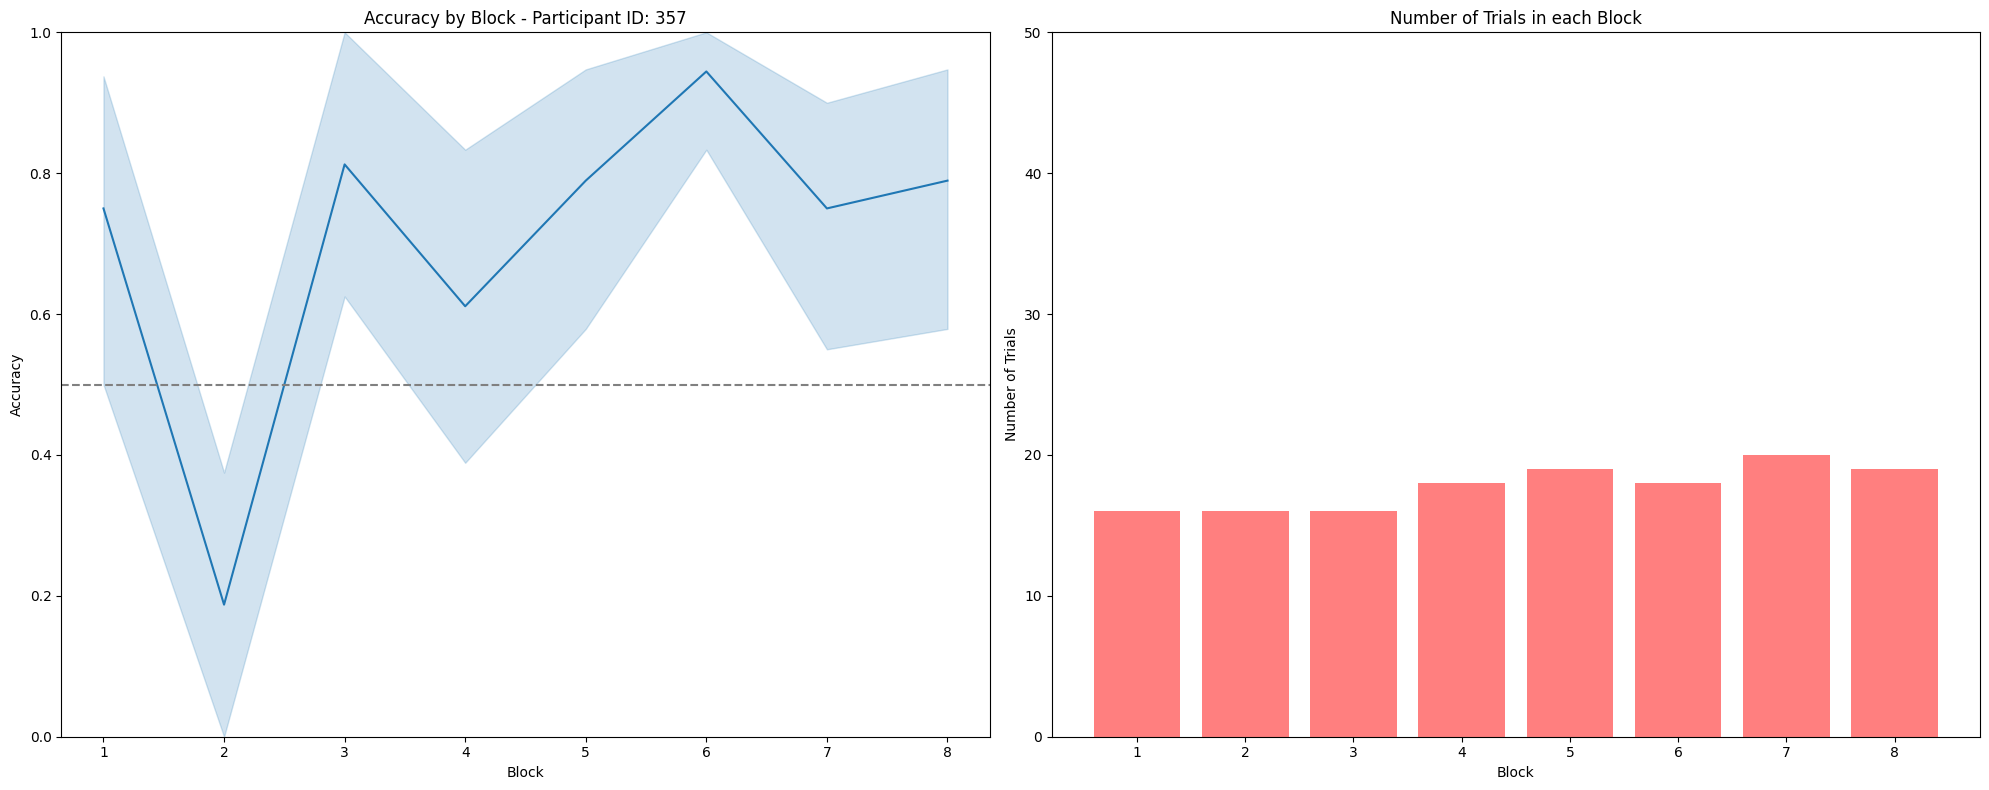

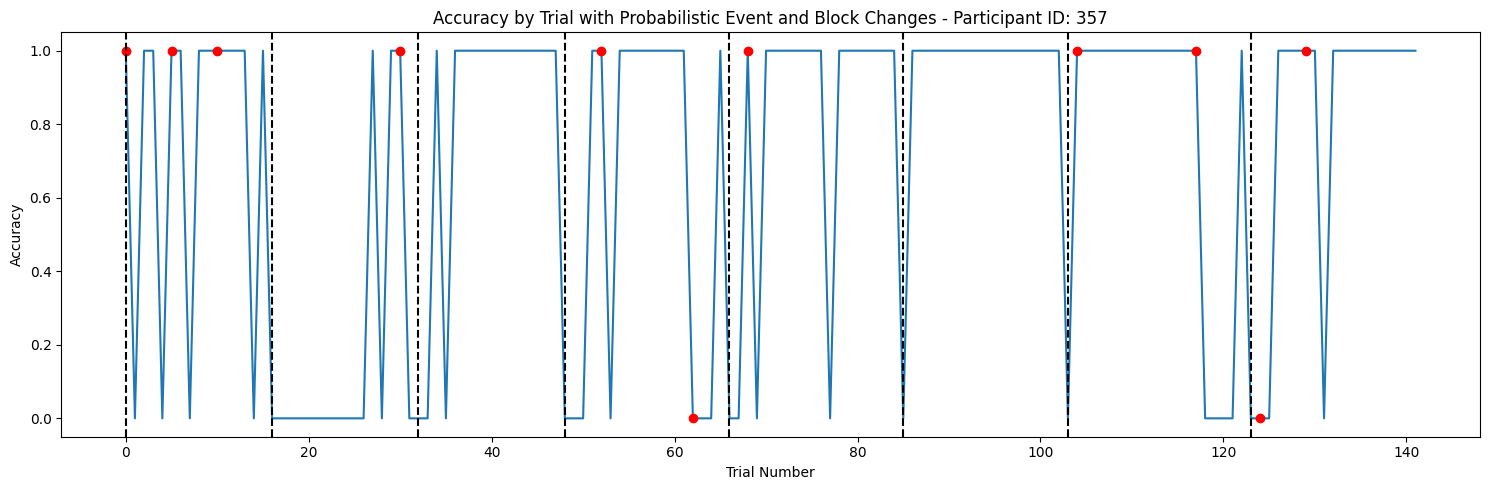

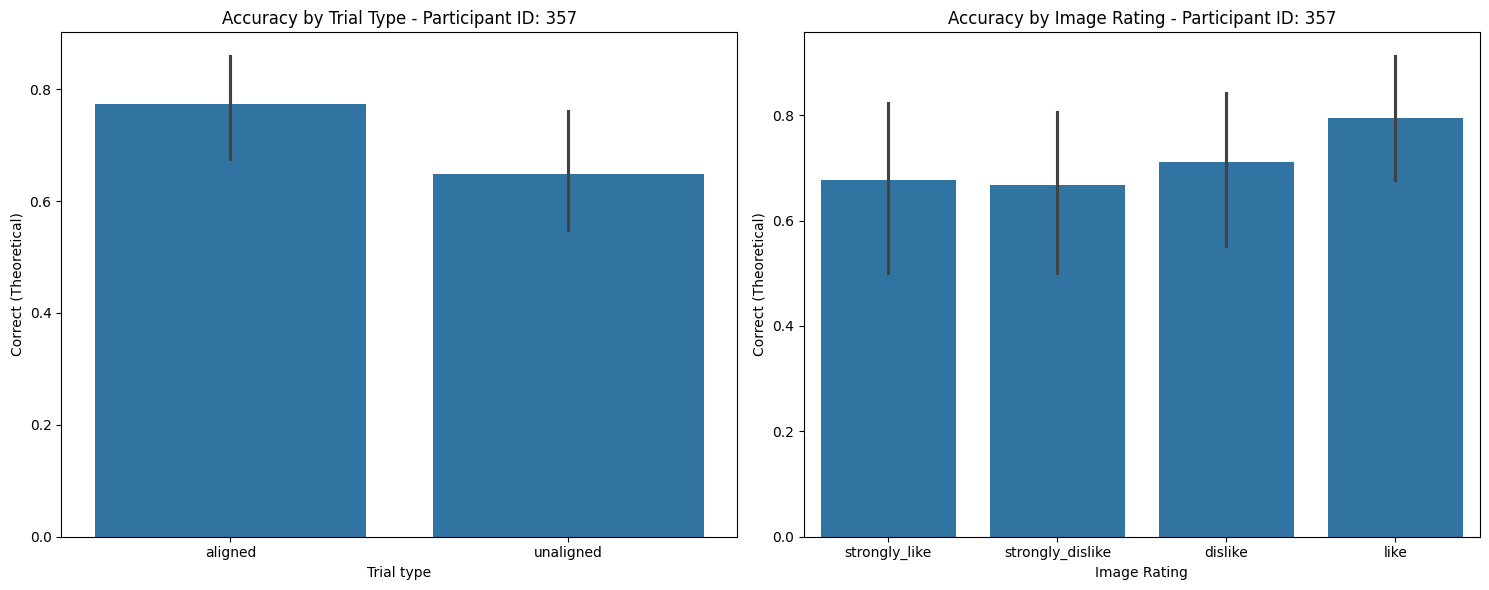

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# Define the participant ID you want to process
participant_id = '357_task'  # Replace with the actual participant ID

# Construct the file name for the specified participant
file_name = f'{participant_id}.csv'
file_path = os.path.join(shared_folder_path, file_name)

if os.path.isfile(file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Process the DataFrame as needed
    print(f'Processing data for participant {participant_id}')
    print(df.head())  # Example of processing - adjust as needed
else:
    print(f'File for participant {participant_id} does not exist in the folder.')

# Define blocks based on switches in 'Trial type'
df['Block'] = (df['Trial type'] != df['Trial type'].shift(1)).cumsum()

# Number of trials in each 'Block'
block_counts = df['Block'].value_counts()

# Accuracy in each 'Block'
block_accuracy = df.groupby('Block')['Correct (Theoretical)'].mean()

# Accuracy per 'Trial type' (aligned and unaligned)
trial_type_accuracy = df.groupby('Trial type')['Correct (Theoretical)'].mean()
ttest_p_value_tt = ttest_ind(df[df['Trial type'] == 'aligned']['Correct (Theoretical)'],
                            df[df['Trial type'] == 'unaligned']['Correct (Theoretical)'], nan_policy='omit').pvalue

# Accuracy over the whole task
df['Block Change'] = df['Block'].ne(df['Block'].shift())
df['All Trials'] = 'All Trials'
overall_accuracy = df.groupby(['All Trials', 'Block'])['Correct (Theoretical)'].mean()

# Accuracy as a function of 'Image Rating'
# Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
df['Correct (Binary)'] = df['Correct (Theoretical)'].astype(int)

# Create a contingency table
contingency_table = pd.crosstab(df['Image Rating'], df['Correct (Binary)'])

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output results
print(f"Participant ID: {participant_id.split('_')[0]}")
print("Number of trials in each 'Block':")
print(block_counts)
print("\nAccuracy in each 'Block':")
print(block_accuracy)
print("\nAccuracy per 'Trial type' (aligned and unaligned):")
print(trial_type_accuracy)
print(f"t-test p-value for 'Trial type': {ttest_p_value_tt}")
print("\nAccuracy over the whole task:")
print(overall_accuracy)
print("\nAccuracy as a function of 'Image Rating':")
print(df.groupby('Image Rating')['Correct (Binary)'].mean())
print(f"Chi-squared p-value for 'Image Rating': {p:.15f}")
print("Data for Chi-squared test:")
print(contingency_table)


# Visualization

# Create a 1x2 figure for Accuracy by Block and Number of trials in each Block
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Accuracy by Block
sns.lineplot(x='Block', y='Correct (Theoretical)', data=df, ax=axs[0])
axs[0].set_ylabel('Accuracy')
axs[0].axhline(y=0.5, color='gray', linestyle='--')  # Add a dotted line at y=0.5
axs[0].set_ylim(0, 1)  # Set y-axis limits to 0-1
axs[0].set_title(f"Accuracy by Block - Participant ID: {participant_id.split('_')[0]}")

# Number of trials in each Block
sorted_block_counts = block_counts.reindex(sorted(block_counts.index))
axs[1].bar(sorted_block_counts.index, sorted_block_counts, color='r', alpha=0.5)
axs[1].set_ylabel('Number of Trials')
axs[1].set_xlabel('Block')
axs[1].set_ylim(0, 50)  # Set y-axis limits to 0-50
axs[1].set_title('Number of Trials in each Block')

plt.tight_layout()
plt.show()

# Accuracy by Trial with Probabilistic Event and Block Changes
plt.figure(figsize=(15, 5))
sns.lineplot(x=df.index, y='Correct (Theoretical)', data=df)
for i, event in enumerate(df['Probabilistic event']):
    if event:
        plt.plot(i, df.loc[i, 'Correct (Theoretical)'], 'ro')
for i, change in enumerate(df['Block Change']):
    if change:
        plt.axvline(x=i, linestyle='--', color='k')
plt.title(f"Accuracy by Trial with Probabilistic Event and Block Changes - Participant ID: {participant_id.split('_')[0]}")
plt.ylabel('Accuracy')
plt.xlabel('Trial Number')
plt.tight_layout()
plt.show()

# Accuracy by Trial Type and Image Rating
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy by Trial Type
sns.barplot(x='Trial type', y='Correct (Theoretical)', data=df, ax=axs[0])
axs[0].set_title(f"Accuracy by Trial Type - Participant ID: {participant_id.split('_')[0]}")
if ttest_p_value_tt < 0.05:
    height = max(df.groupby('Trial type')['Correct (Theoretical)'].max()) + 0.05
    axs[0].plot([0, 1], [height, height], linewidth=1, color='k')
    axs[0].text(0.5, height + 0.01, f'p={ttest_p_value_tt:.3f}', ha='center', va='bottom')

# Accuracy by Image Rating
sns.barplot(x='Image Rating', y='Correct (Theoretical)', data=df, ax=axs[1])
axs[1].set_title(f"Accuracy by Image Rating - Participant ID: {participant_id.split('_')[0]}")
if p < 0.05:
    height = max(df.groupby('Image Rating')['Correct (Theoretical)'].max()) + 0.05
    axs[1].plot([0, 1, 2, 3], [height, height, height, height], linewidth=1, color='k')
    axs[1].text(1.5, height + 0.01, f'p={p:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## For all participants one by one

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

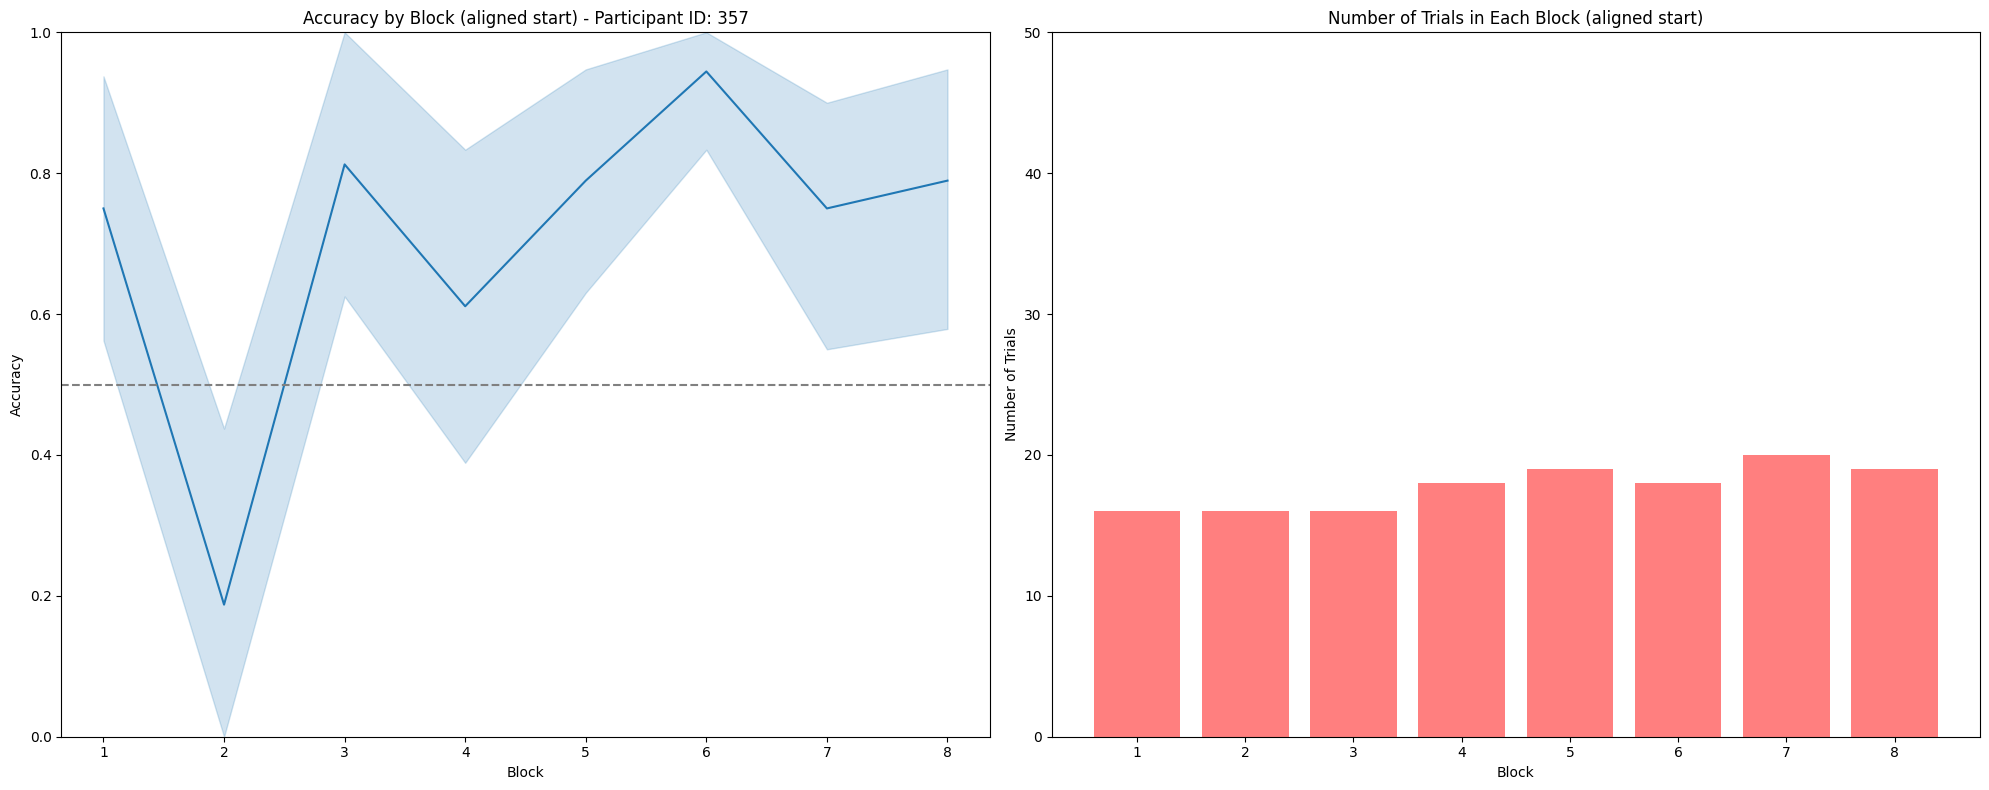

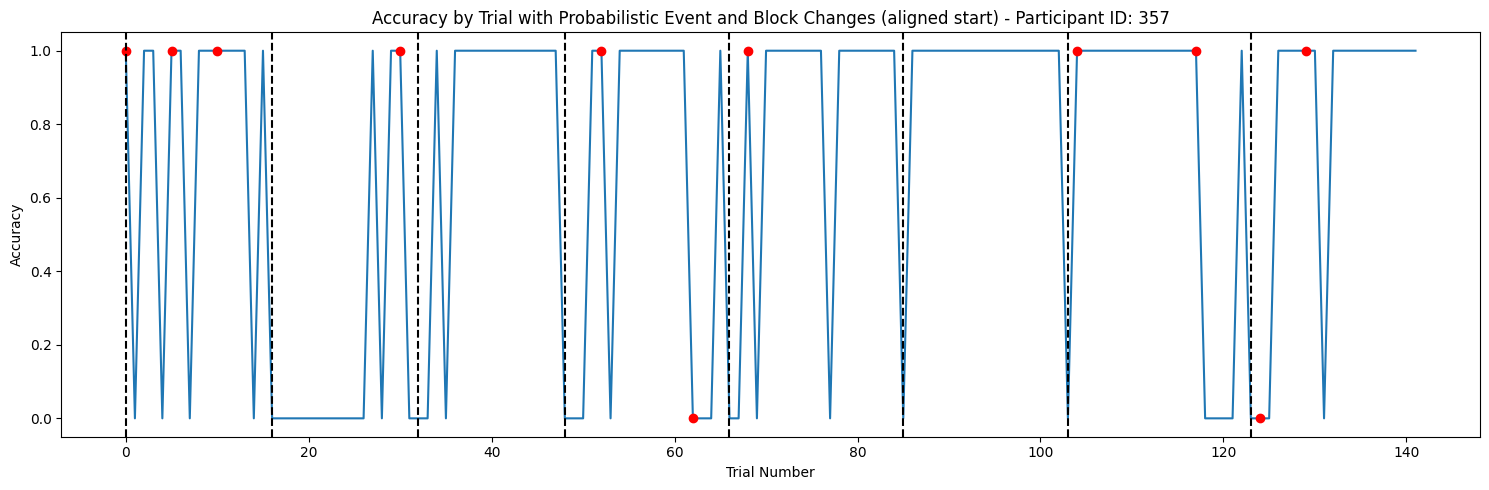

<Figure size 1200x800 with 0 Axes>

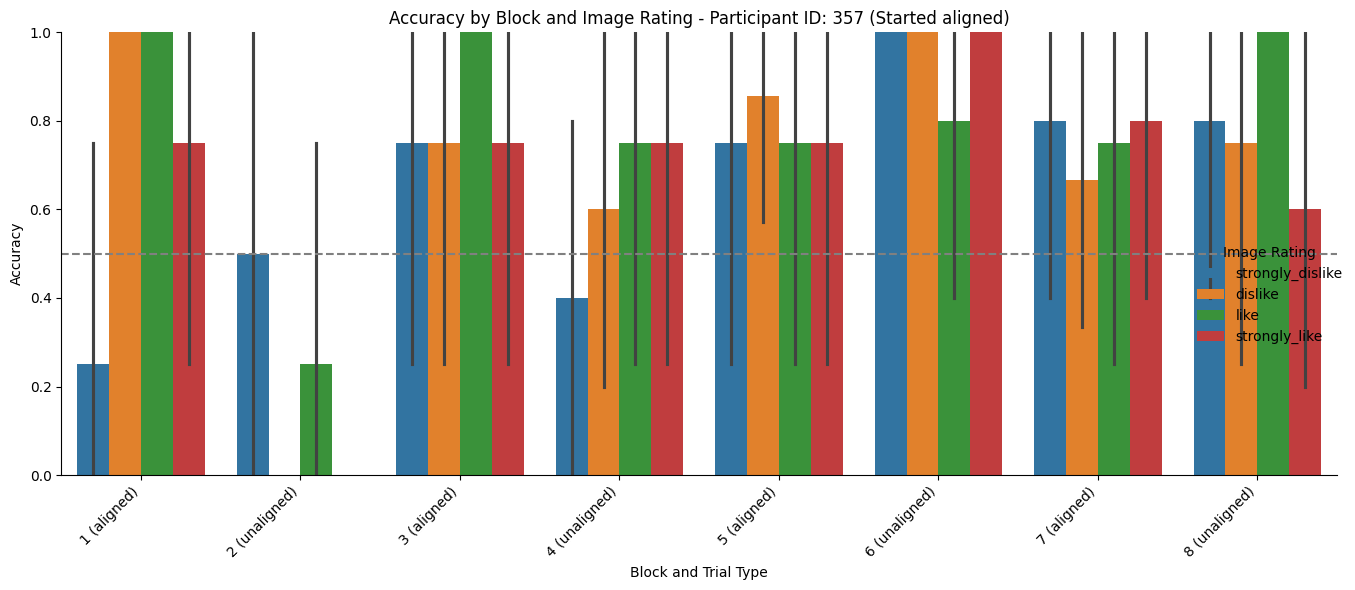

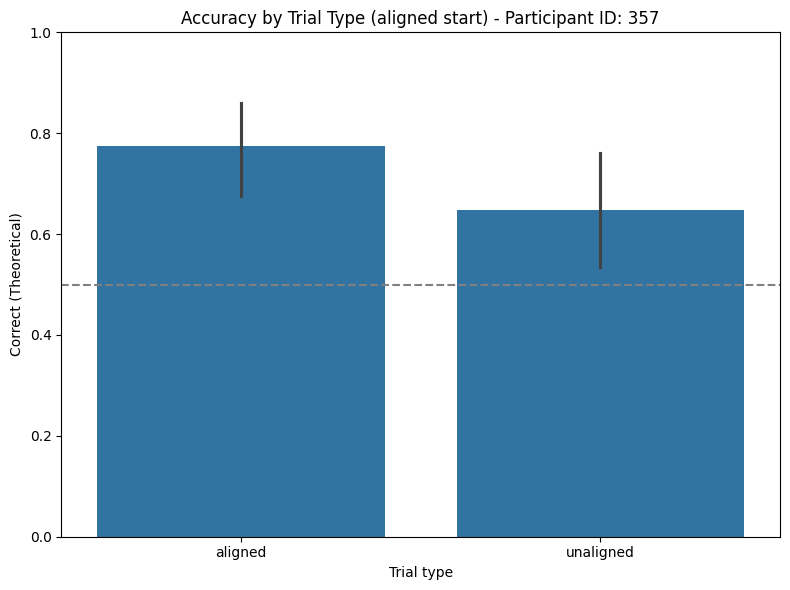

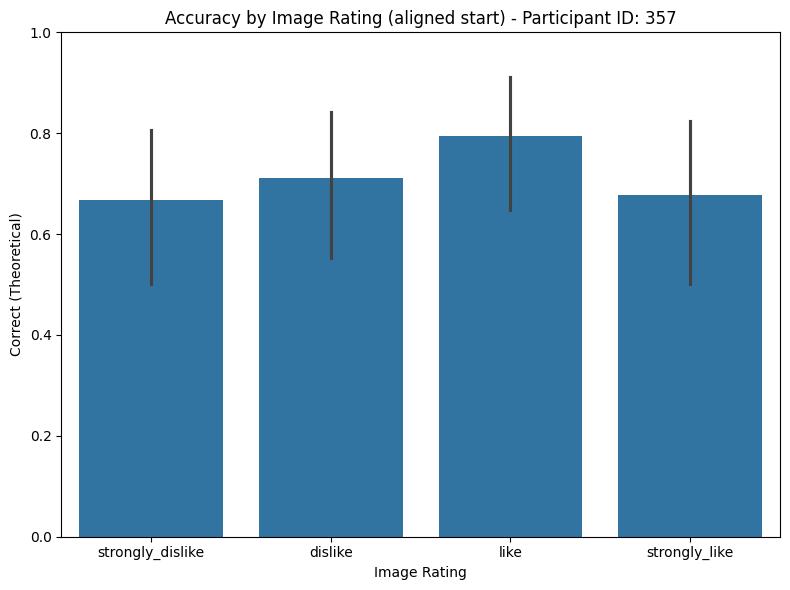

Participant ID: 357
Started with: aligned
Number of trials in each 'Block':
Block
1    16
2    16
3    16
4    18
5    19
6    18
7    20
8    19
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.750000
2    0.187500
3    0.812500
4    0.611111
5    0.789474
6    0.944444
7    0.750000
8    0.789474
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.774648
unaligned    0.647887
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 0.09690456852234254

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.750000
            2        0.187500
            3        0.812500
            4        0.611111
            5        0.789474
            6        0.944444
            7        0.750000
            8        0.789474
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.666667
dislike          

<ipython-input-12-138bad539b13>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


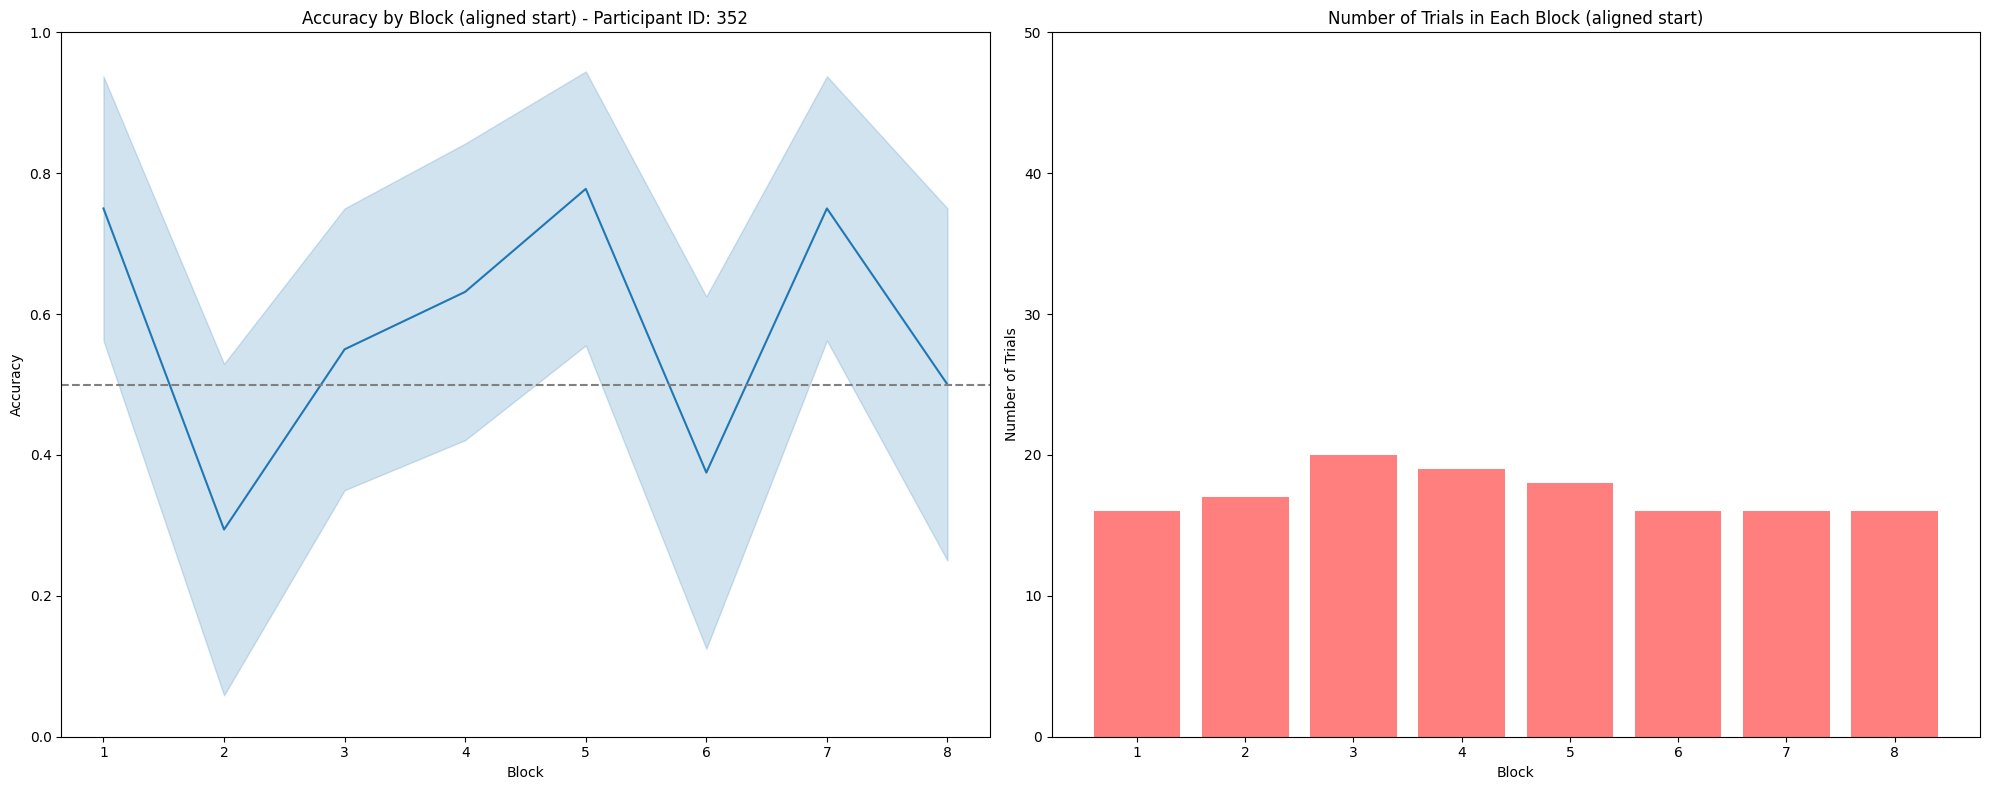

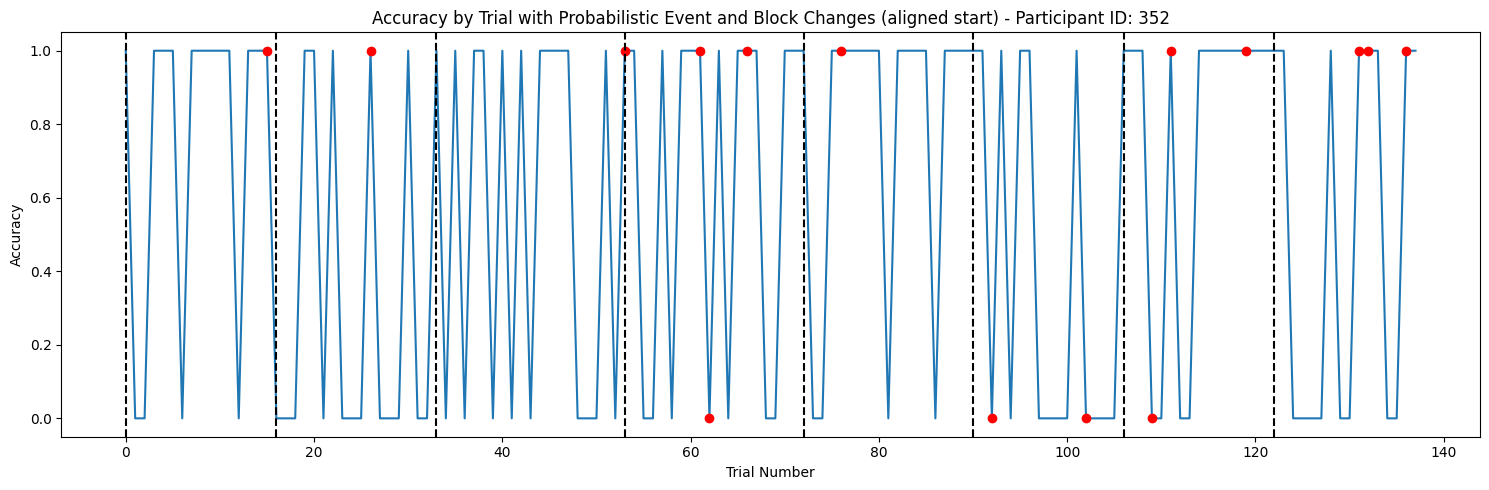

<Figure size 1200x800 with 0 Axes>

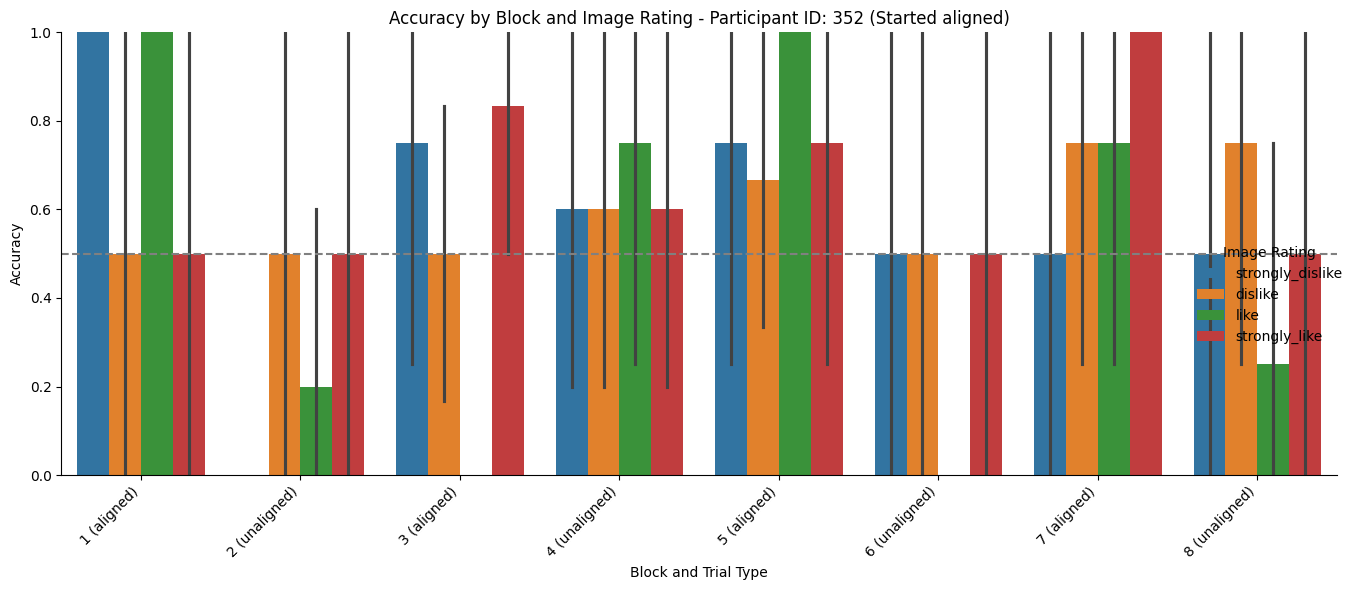

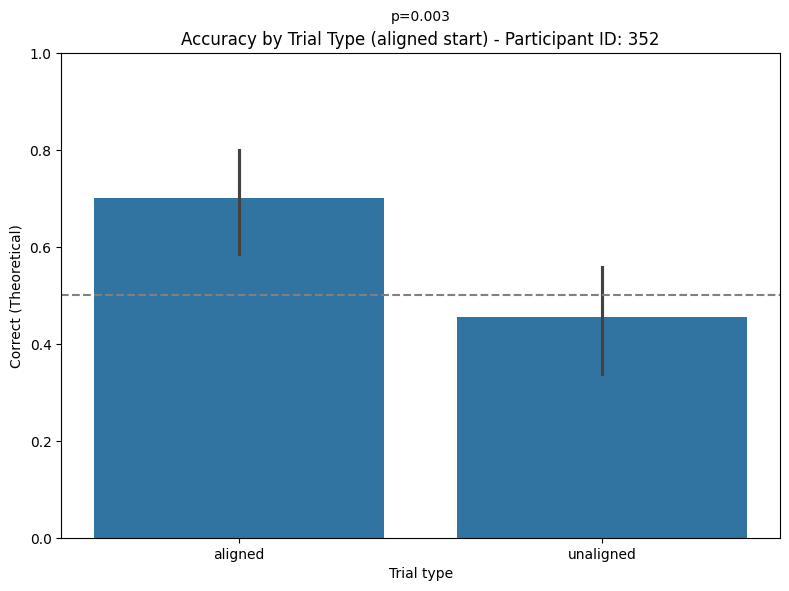

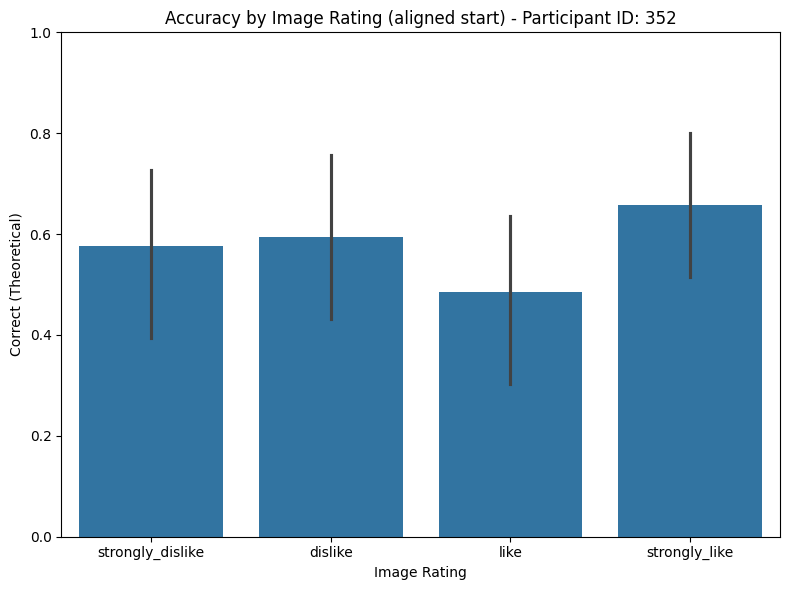

Participant ID: 352
Started with: aligned
Number of trials in each 'Block':
Block
1    16
2    17
3    20
4    19
5    18
6    16
7    16
8    16
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.750000
2    0.294118
3    0.550000
4    0.631579
5    0.777778
6    0.375000
7    0.750000
8    0.500000
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.700000
unaligned    0.455882
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 0.0034590274250723098

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.750000
            2        0.294118
            3        0.550000
            4        0.631579
            5        0.777778
            6        0.375000
            7        0.750000
            8        0.500000
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.575758
dislike        

<ipython-input-12-138bad539b13>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


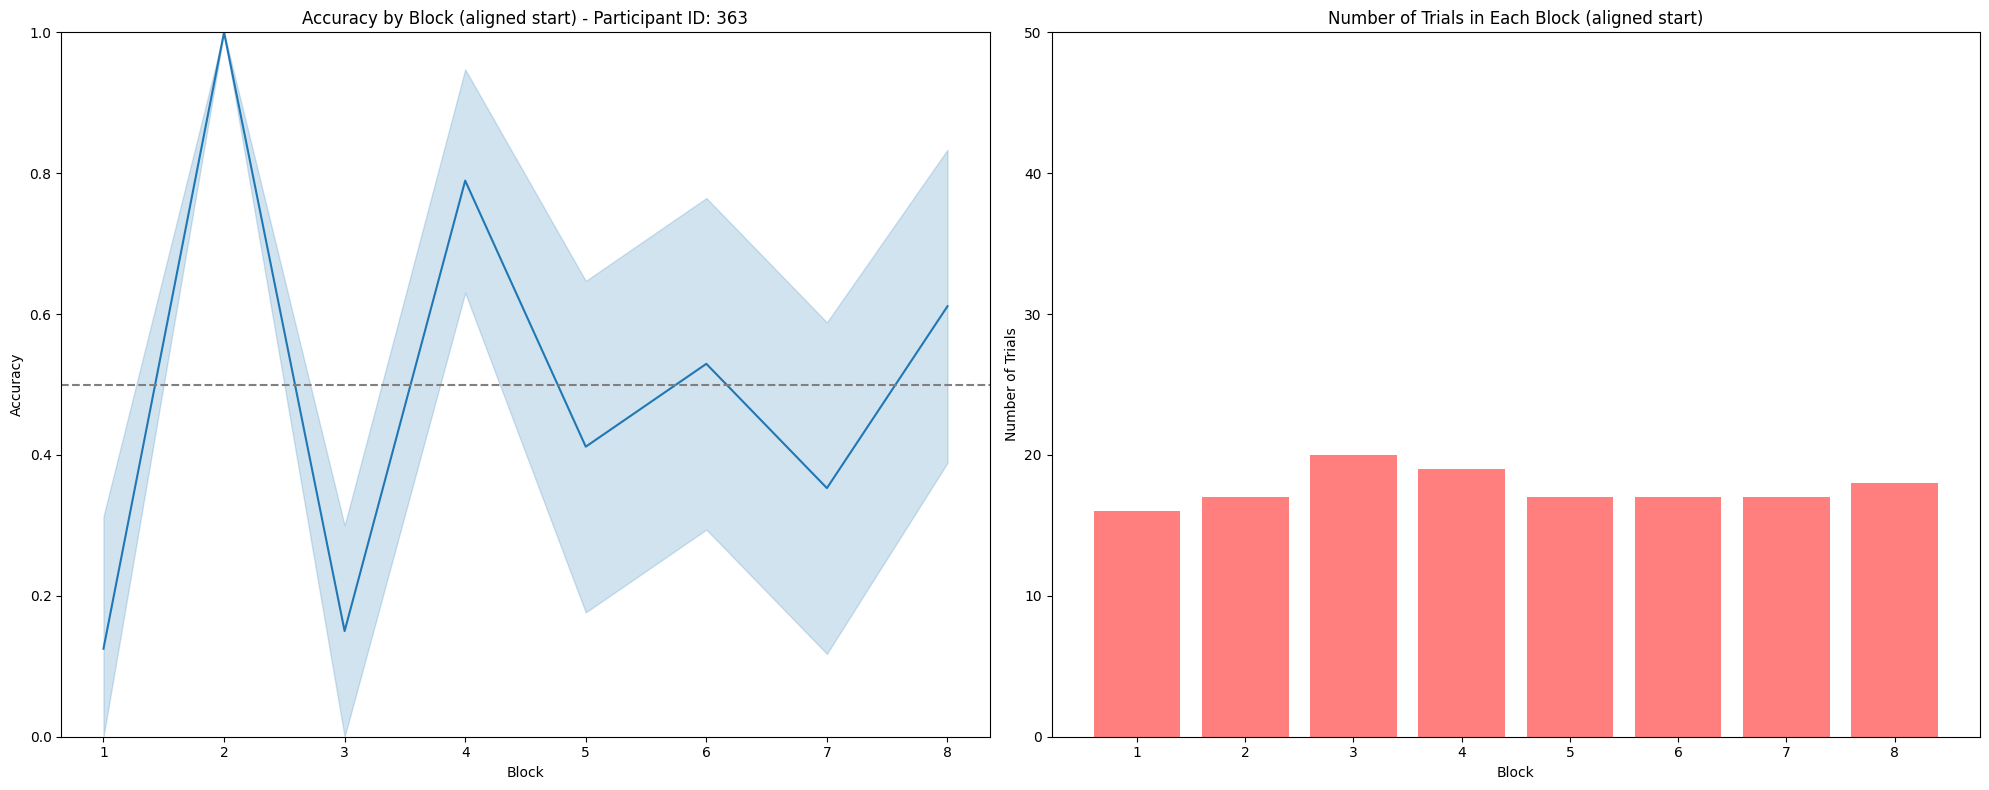

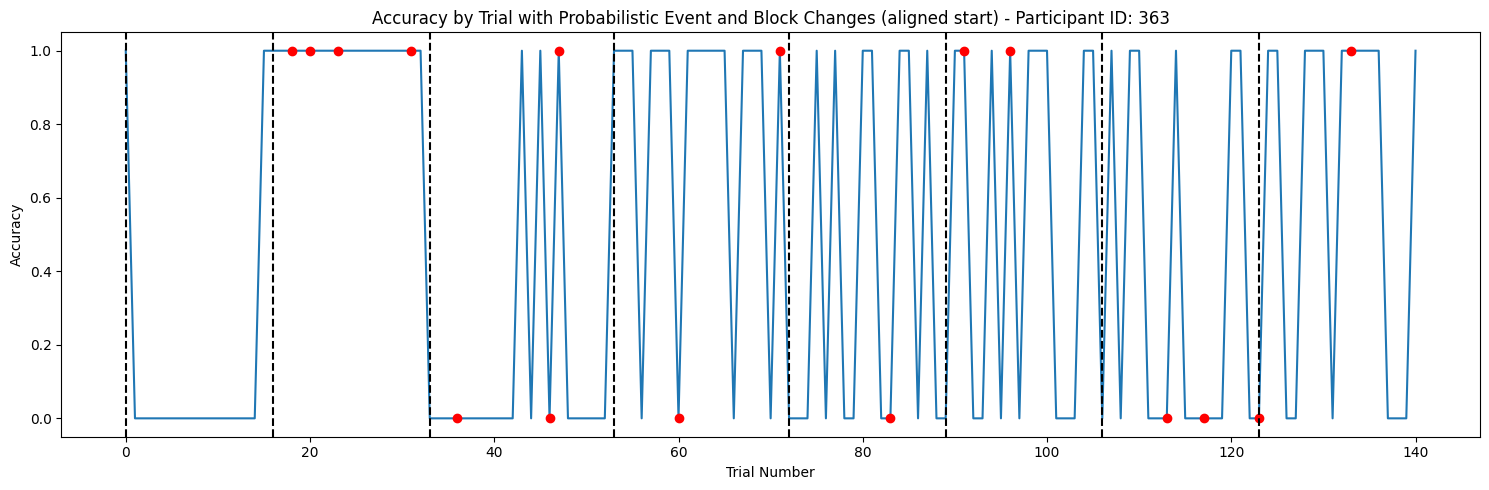

<Figure size 1200x800 with 0 Axes>

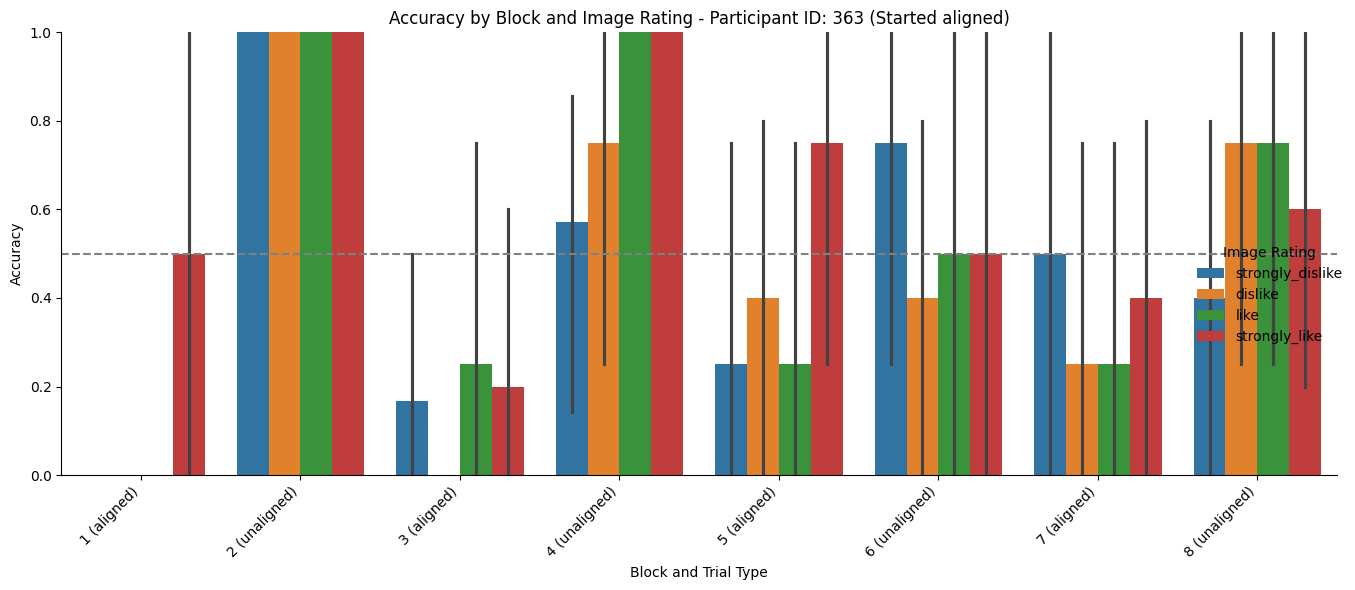

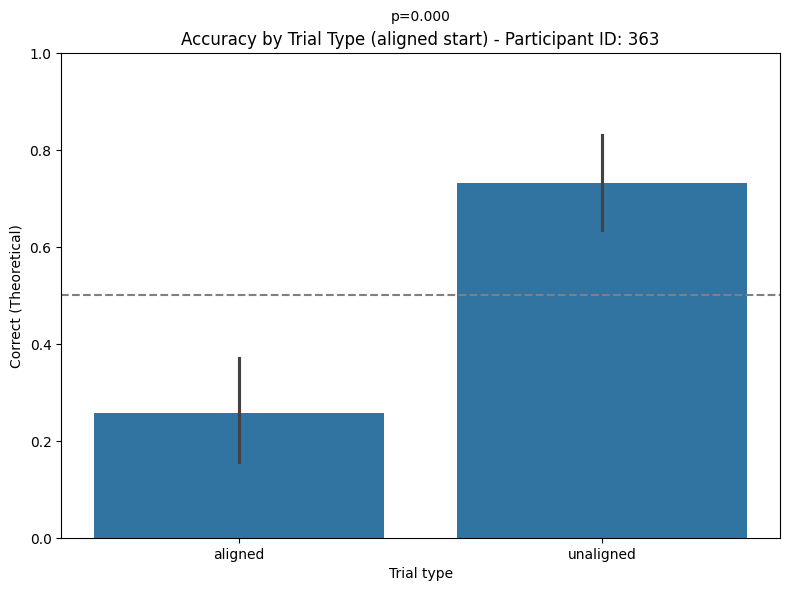

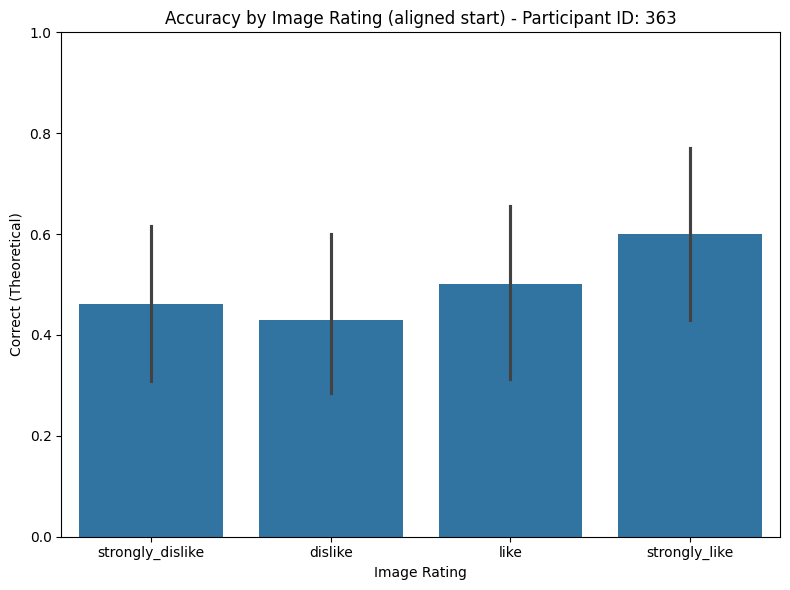

Participant ID: 363
Started with: aligned
Number of trials in each 'Block':
Block
1    16
2    17
3    20
4    19
5    17
6    17
7    17
8    18
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.125000
2    1.000000
3    0.150000
4    0.789474
5    0.411765
6    0.529412
7    0.352941
8    0.611111
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.257143
unaligned    0.732394
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 2.603386961582466e-09

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.125000
            2        1.000000
            3        0.150000
            4        0.789474
            5        0.411765
            6        0.529412
            7        0.352941
            8        0.611111
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.461538
dislike        

<ipython-input-12-138bad539b13>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


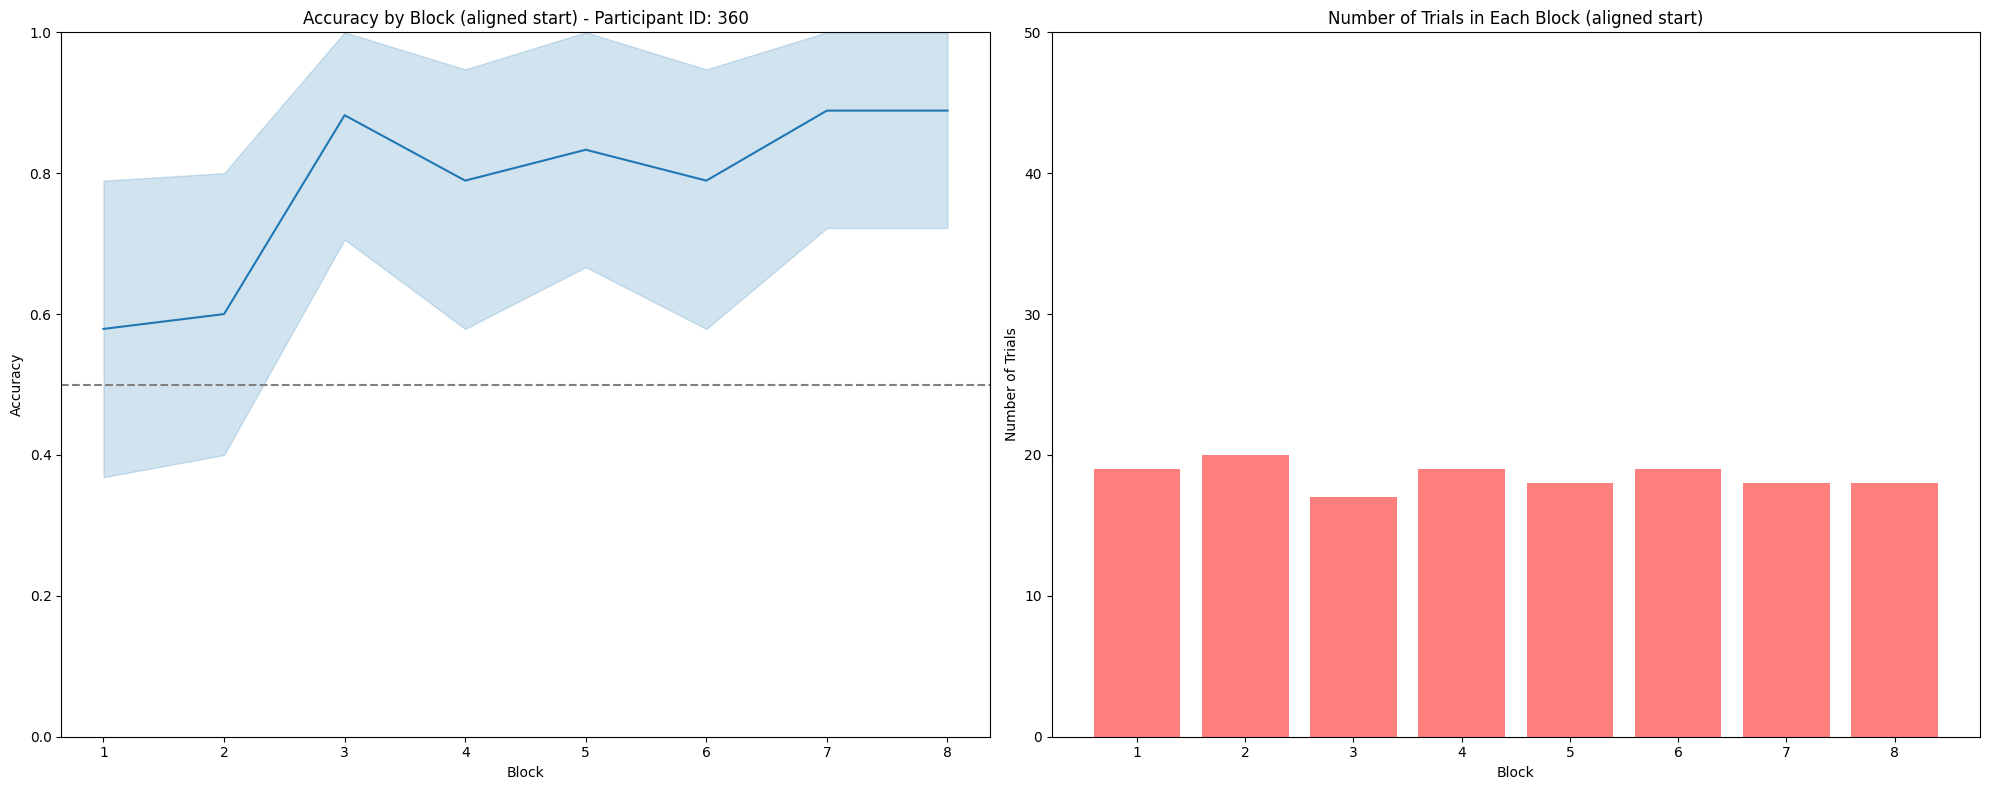

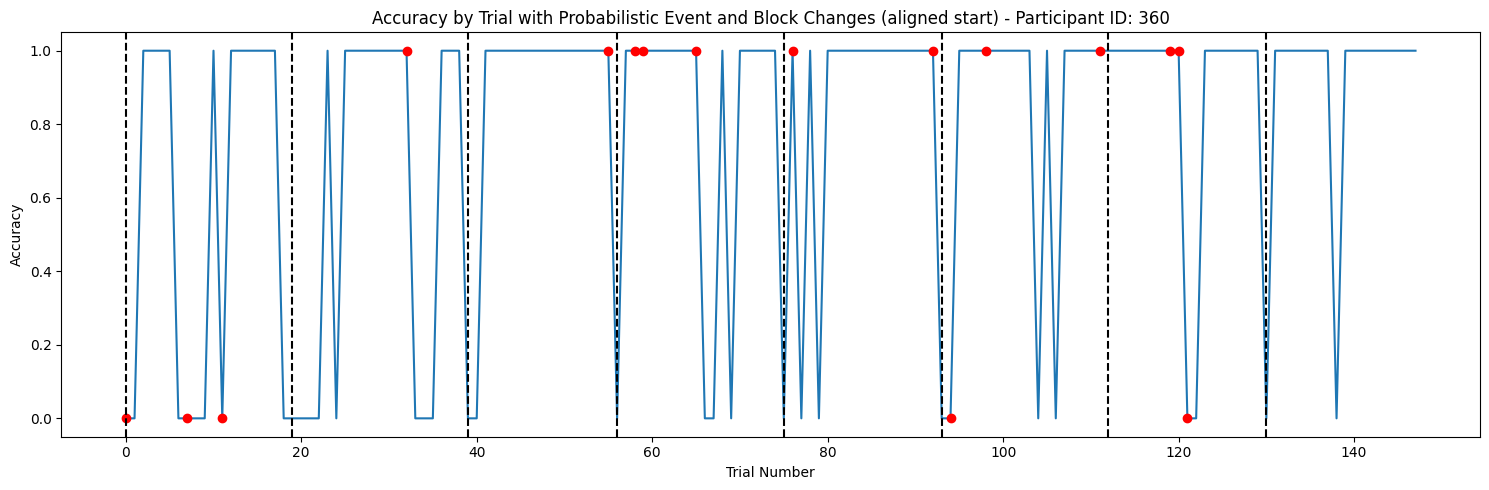

<Figure size 1200x800 with 0 Axes>

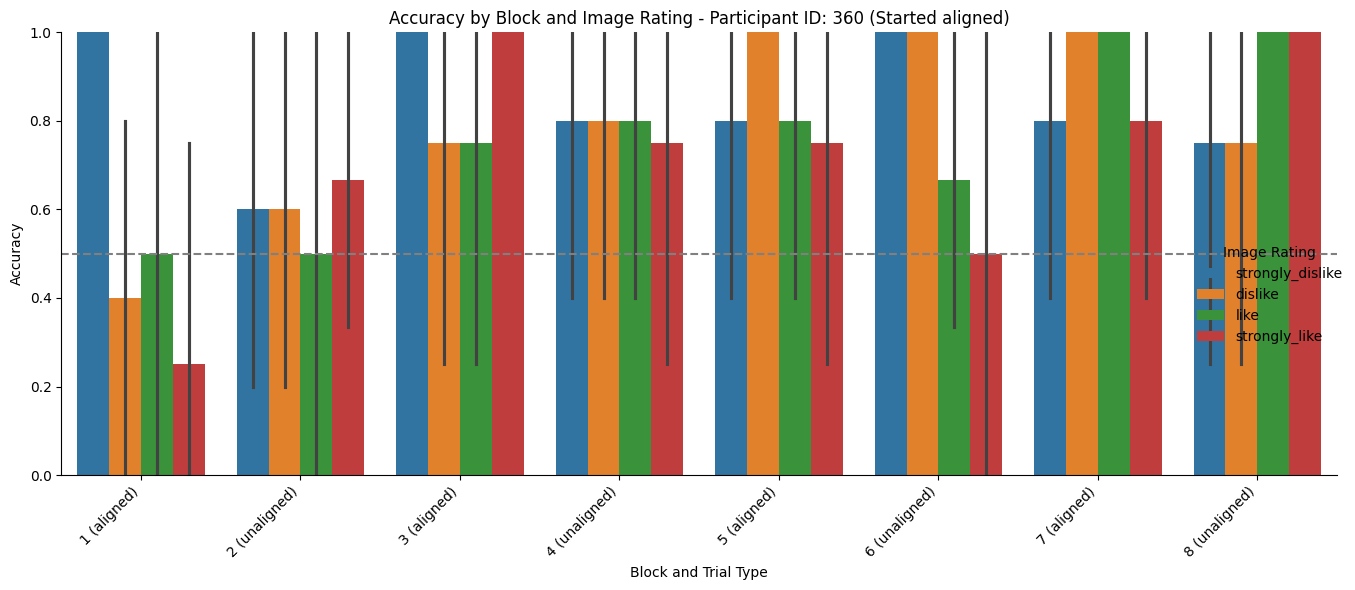

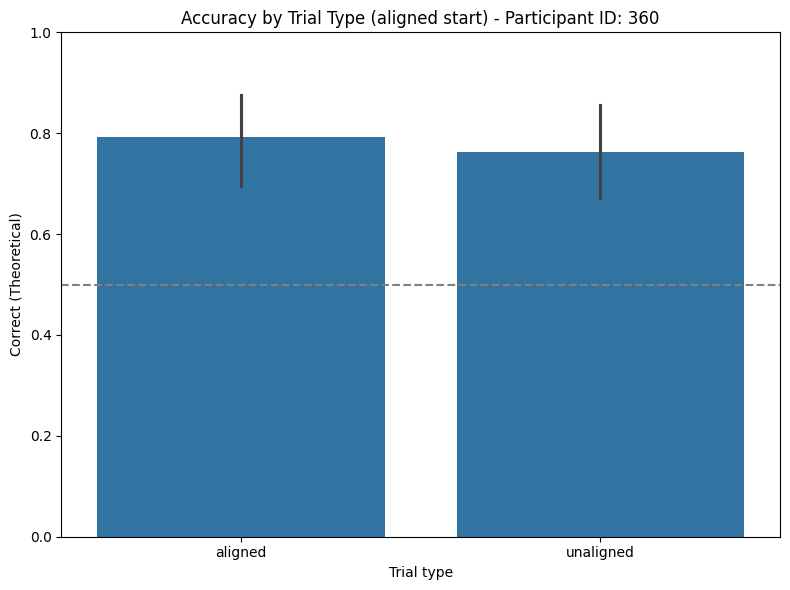

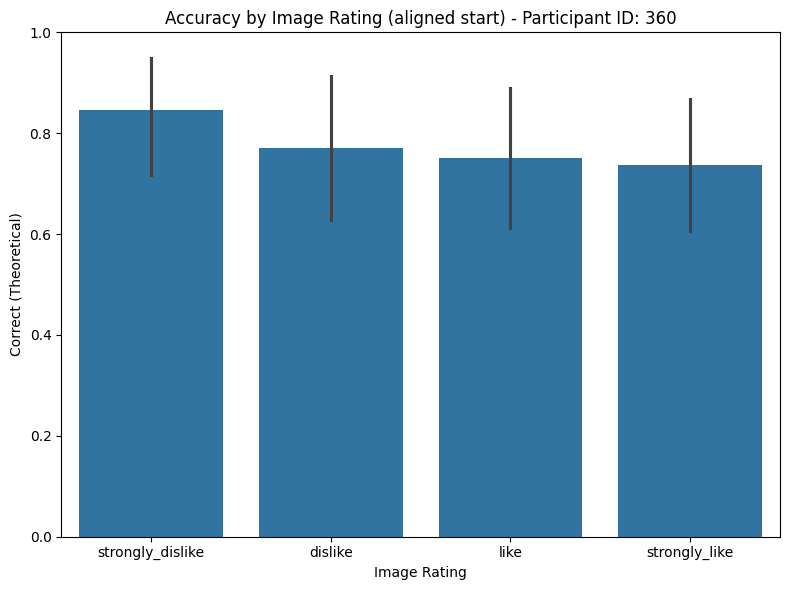

Participant ID: 360
Started with: aligned
Number of trials in each 'Block':
Block
1    19
2    20
3    17
4    19
5    18
6    19
7    18
8    18
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.578947
2    0.600000
3    0.882353
4    0.789474
5    0.833333
6    0.789474
7    0.888889
8    0.888889
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.791667
unaligned    0.763158
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 0.6795677591577802

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.578947
            2        0.600000
            3        0.882353
            4        0.789474
            5        0.833333
            6        0.789474
            7        0.888889
            8        0.888889
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.846154
dislike           

<ipython-input-12-138bad539b13>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


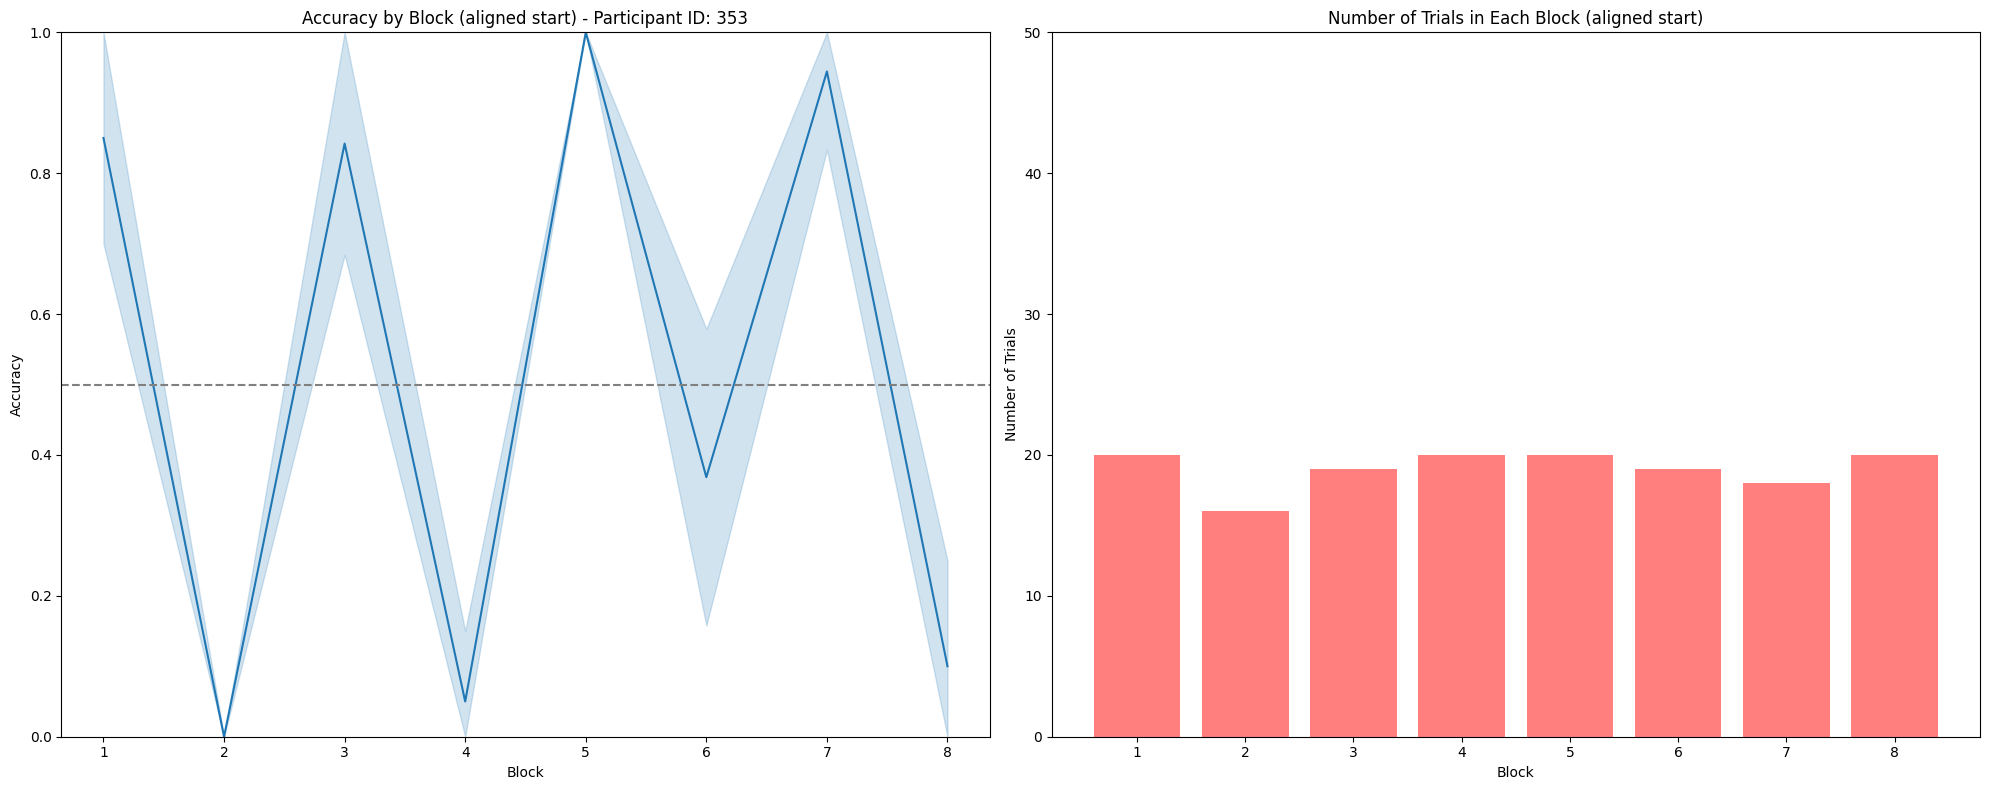

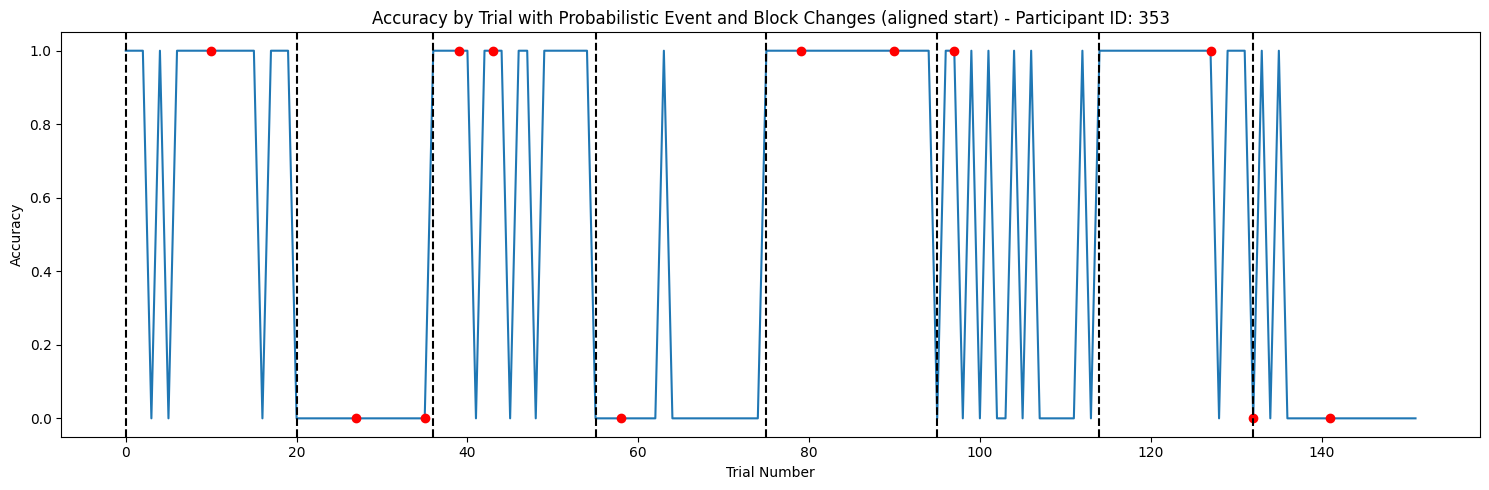

<Figure size 1200x800 with 0 Axes>

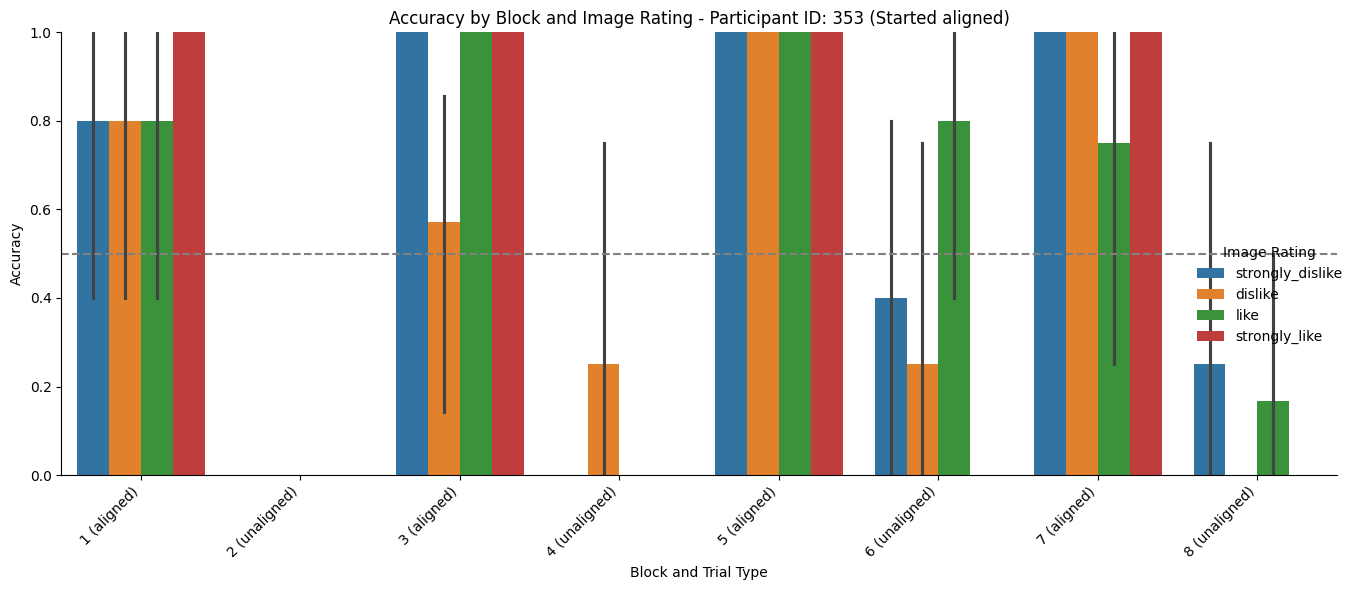

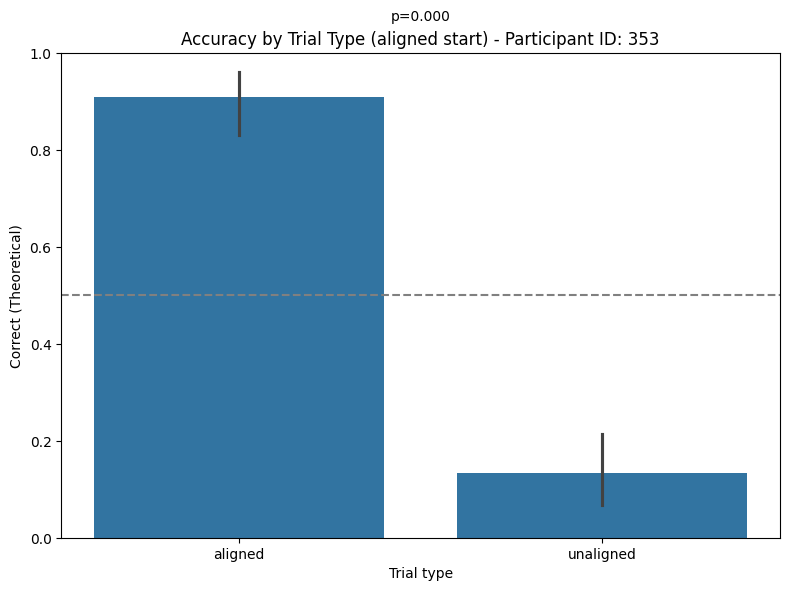

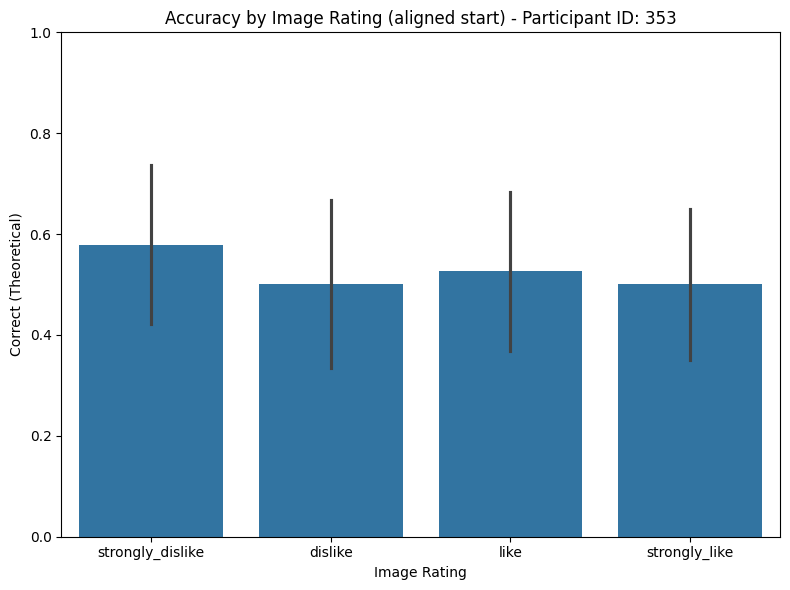

Participant ID: 353
Started with: aligned
Number of trials in each 'Block':
Block
1    20
2    16
3    19
4    20
5    20
6    19
7    18
8    20
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.850000
2    0.000000
3    0.842105
4    0.050000
5    1.000000
6    0.368421
7    0.944444
8    0.100000
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.909091
unaligned    0.133333
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 6.312251318718609e-32

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.850000
            2        0.000000
            3        0.842105
            4        0.050000
            5        1.000000
            6        0.368421
            7        0.944444
            8        0.100000
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.578947
dislike        

<ipython-input-12-138bad539b13>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


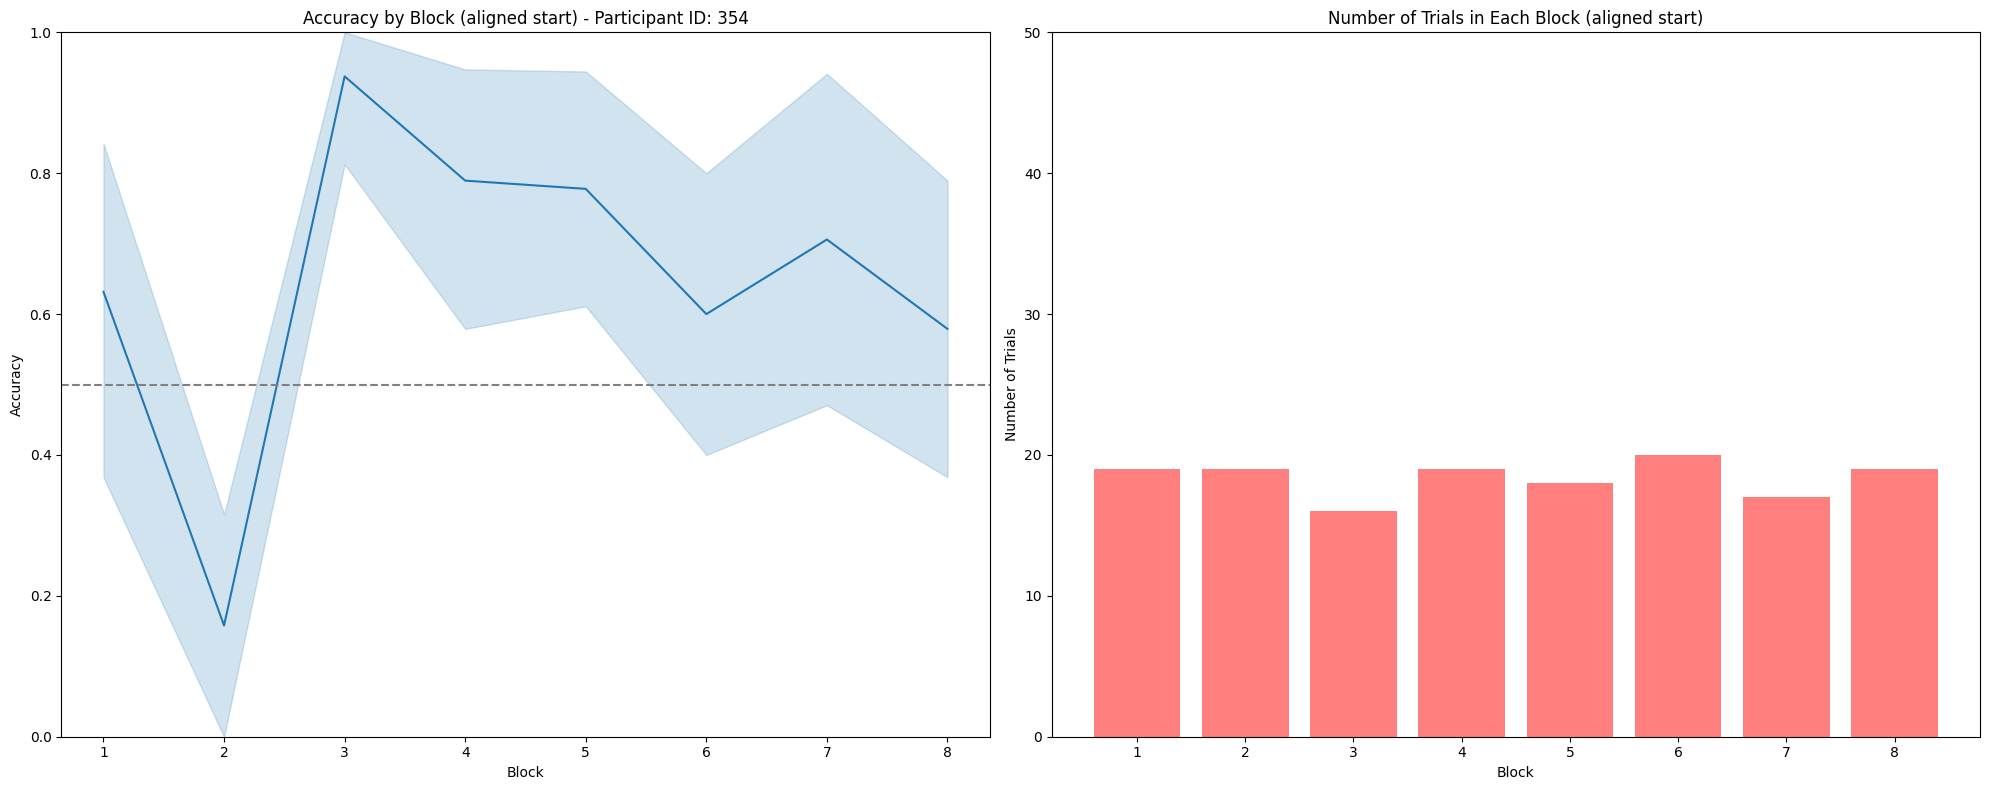

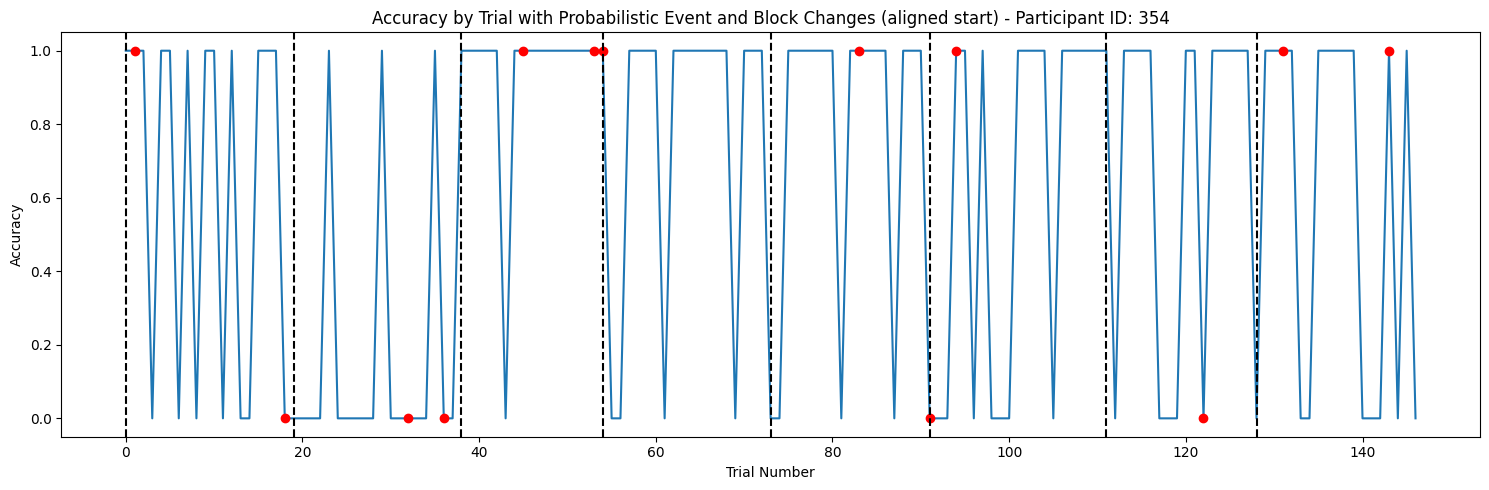

<Figure size 1200x800 with 0 Axes>

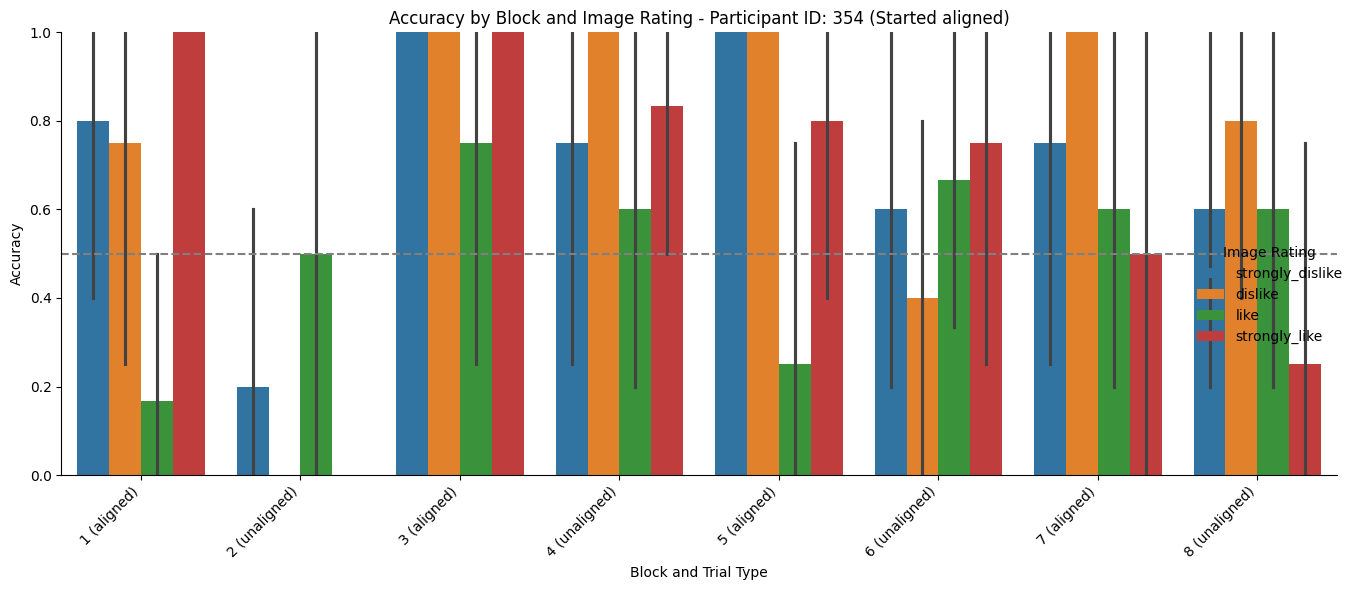

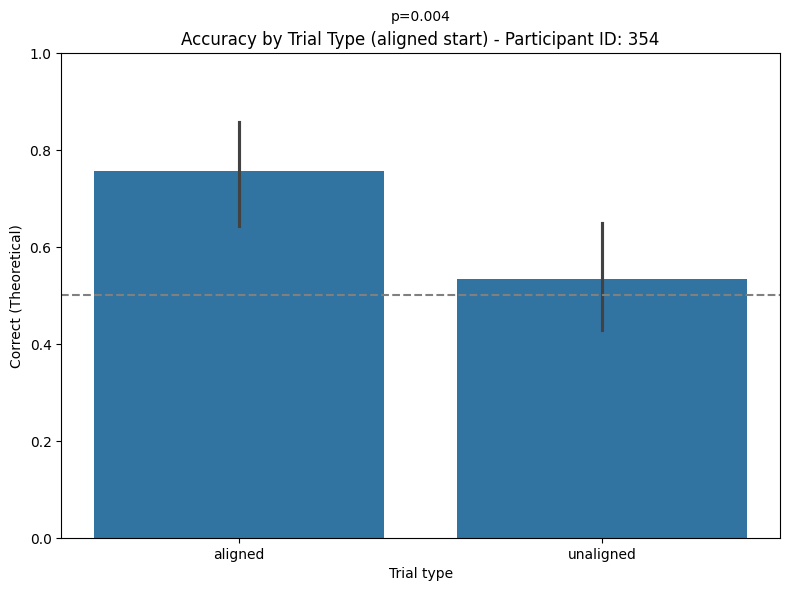

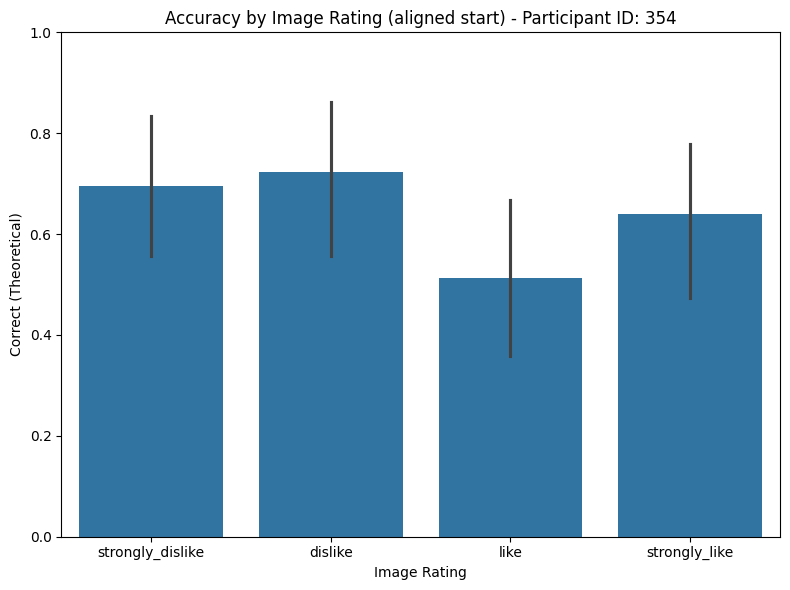

Participant ID: 354
Started with: aligned
Number of trials in each 'Block':
Block
1    19
2    19
3    16
4    19
5    18
6    20
7    17
8    19
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.631579
2    0.157895
3    0.937500
4    0.789474
5    0.777778
6    0.600000
7    0.705882
8    0.578947
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.757143
unaligned    0.532468
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 0.00438901294040011

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.631579
            2        0.157895
            3        0.937500
            4        0.789474
            5        0.777778
            6        0.600000
            7        0.705882
            8        0.578947
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.694444
dislike          

<ipython-input-12-138bad539b13>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


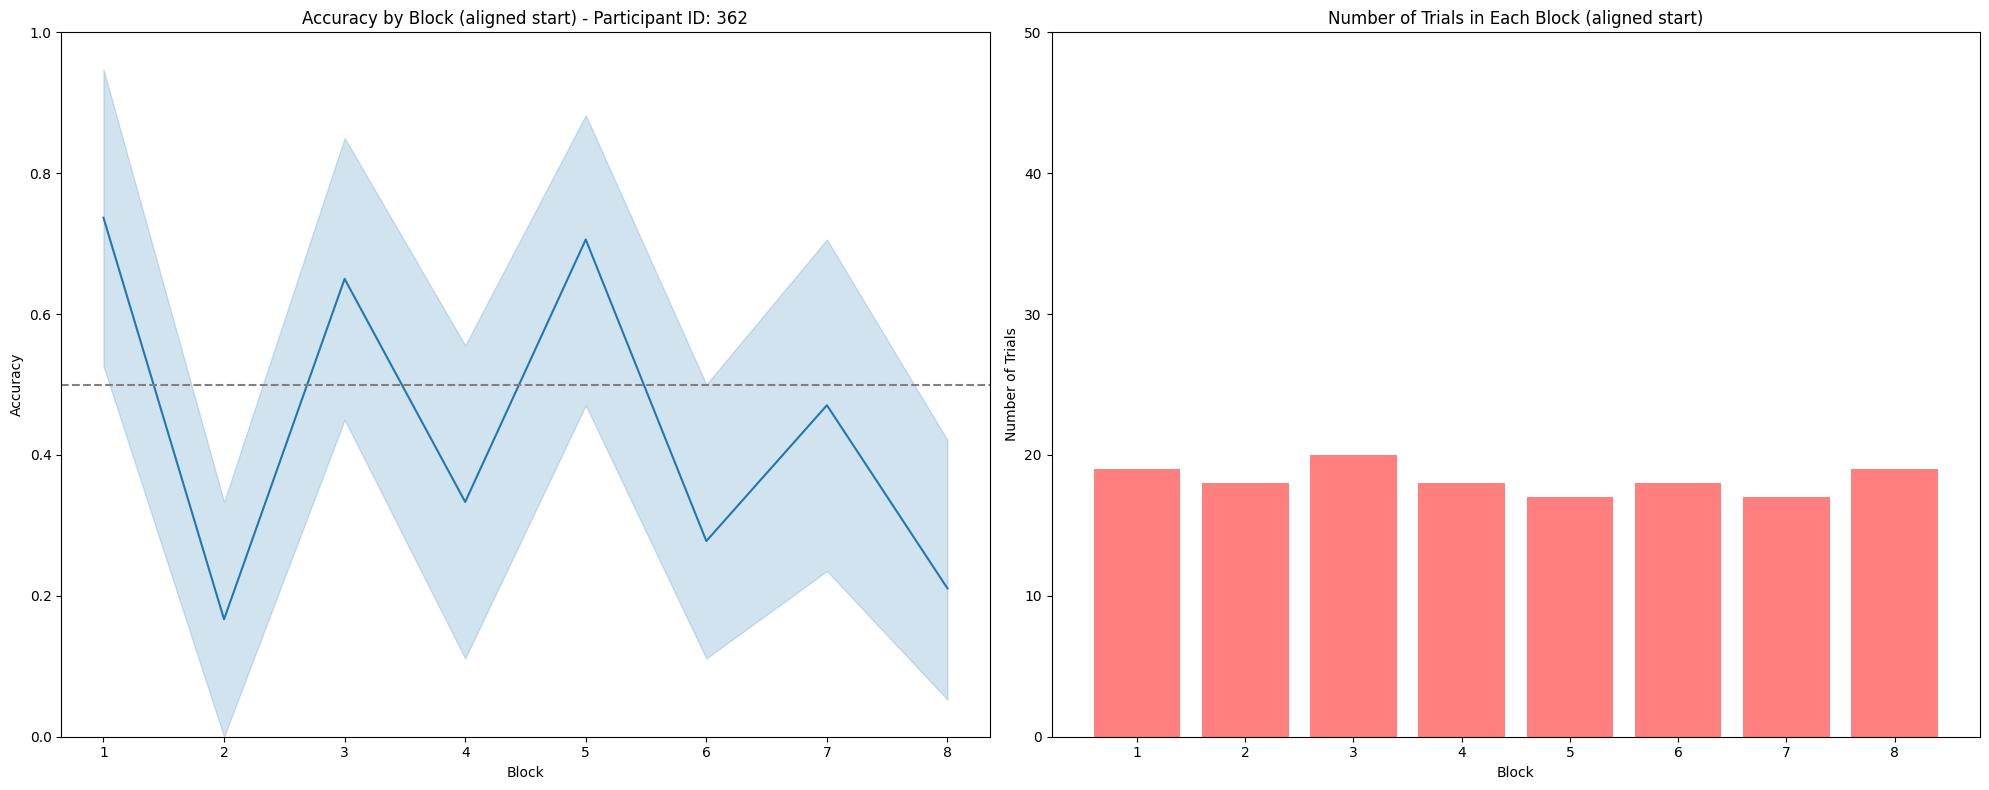

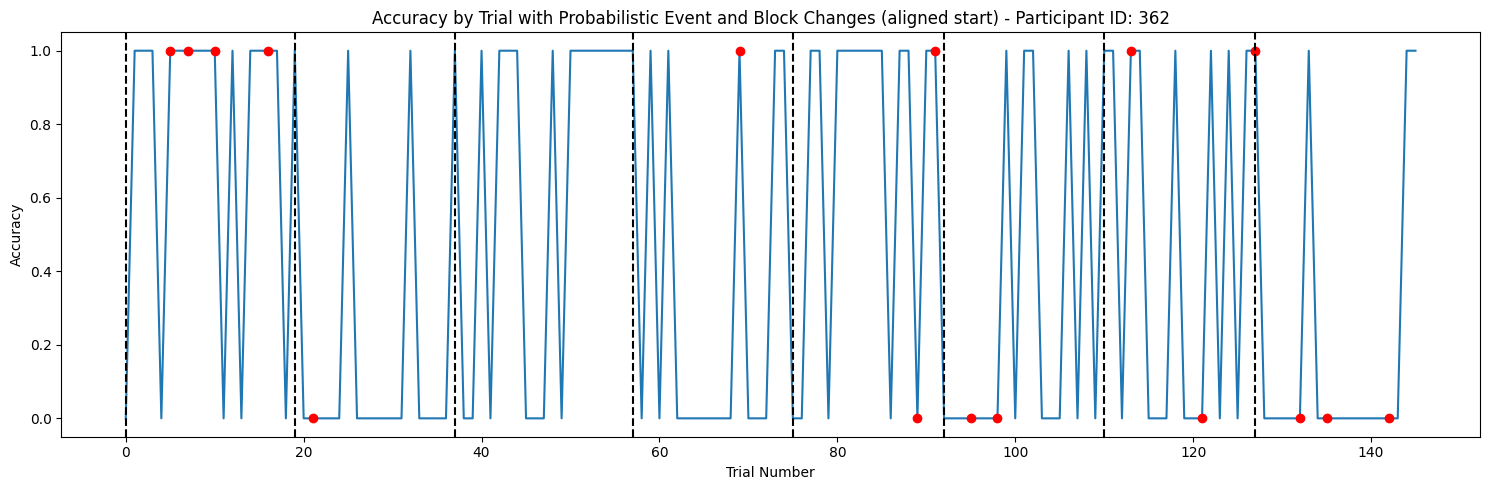

<Figure size 1200x800 with 0 Axes>

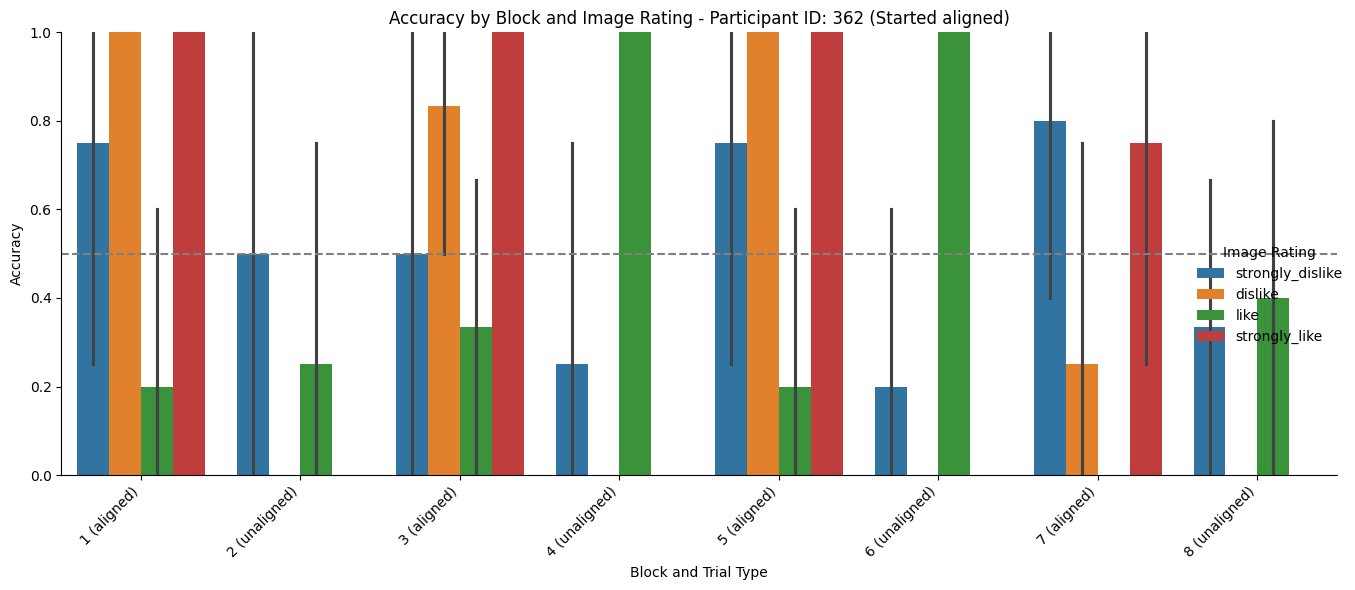

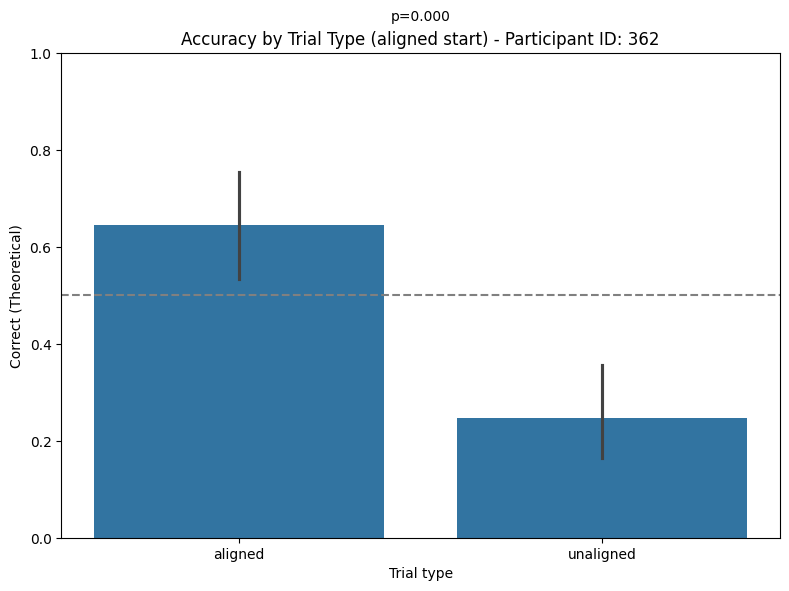

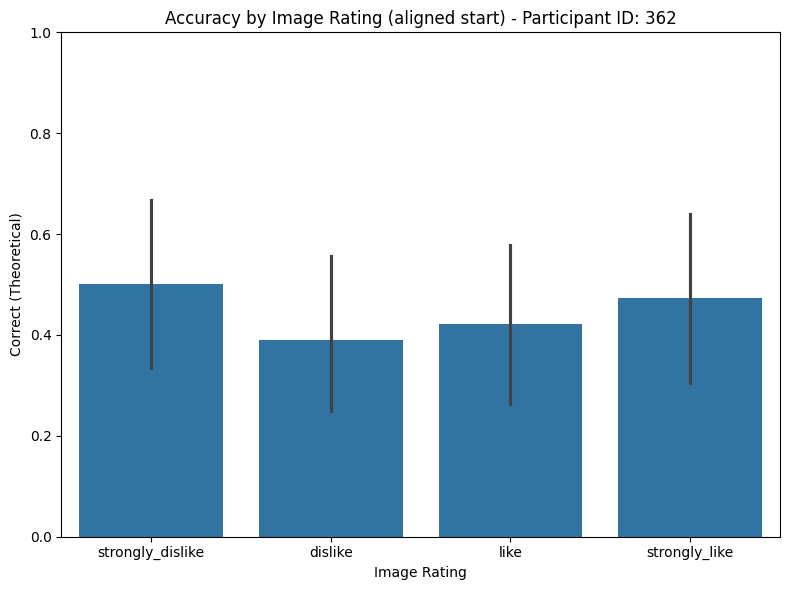

Participant ID: 362
Started with: aligned
Number of trials in each 'Block':
Block
1    19
2    18
3    20
4    18
5    17
6    18
7    17
8    19
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.736842
2    0.166667
3    0.650000
4    0.333333
5    0.705882
6    0.277778
7    0.470588
8    0.210526
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.643836
unaligned    0.246575
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 5.805727364002451e-07

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.736842
            2        0.166667
            3        0.650000
            4        0.333333
            5        0.705882
            6        0.277778
            7        0.470588
            8        0.210526
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.500000
dislike        

<ipython-input-12-138bad539b13>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


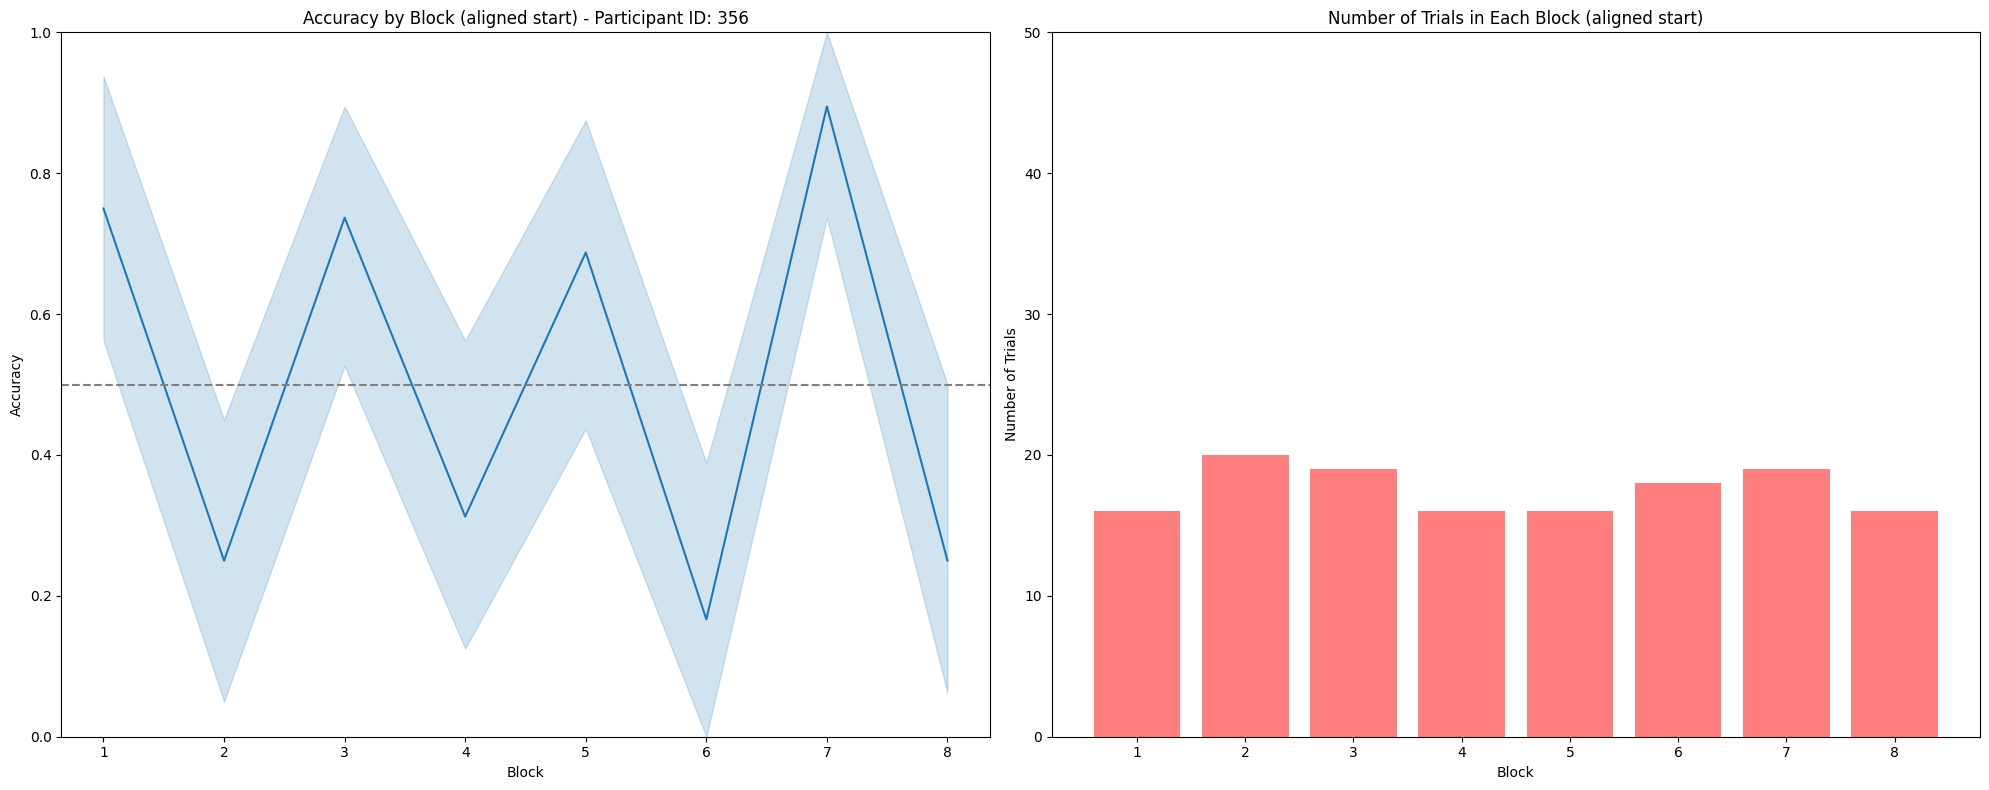

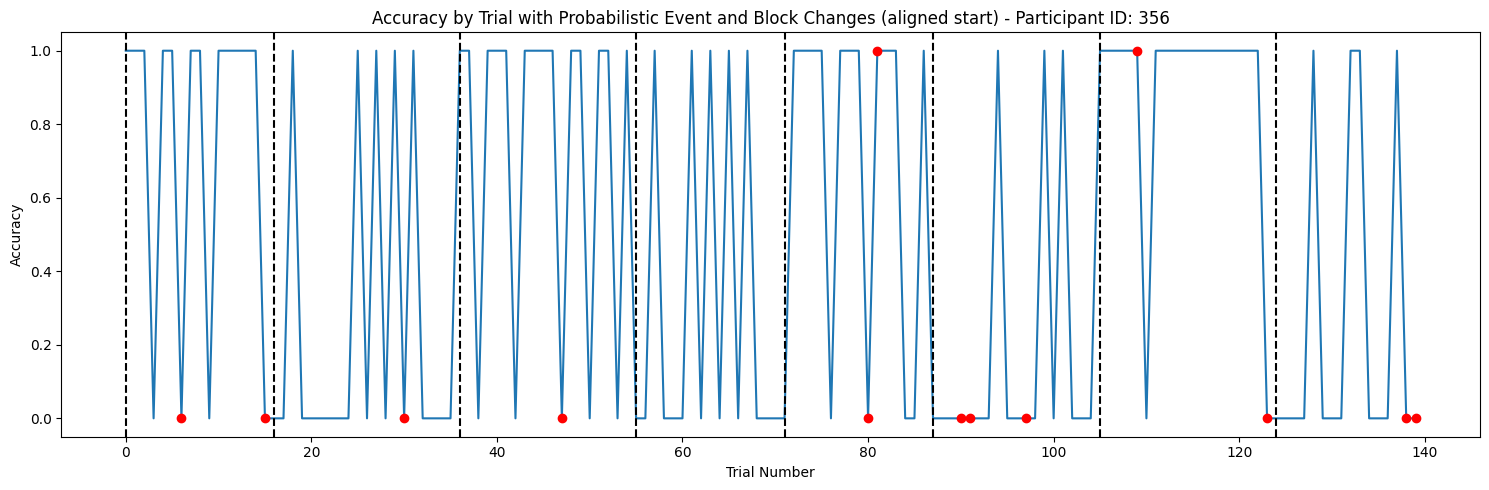

<Figure size 1200x800 with 0 Axes>

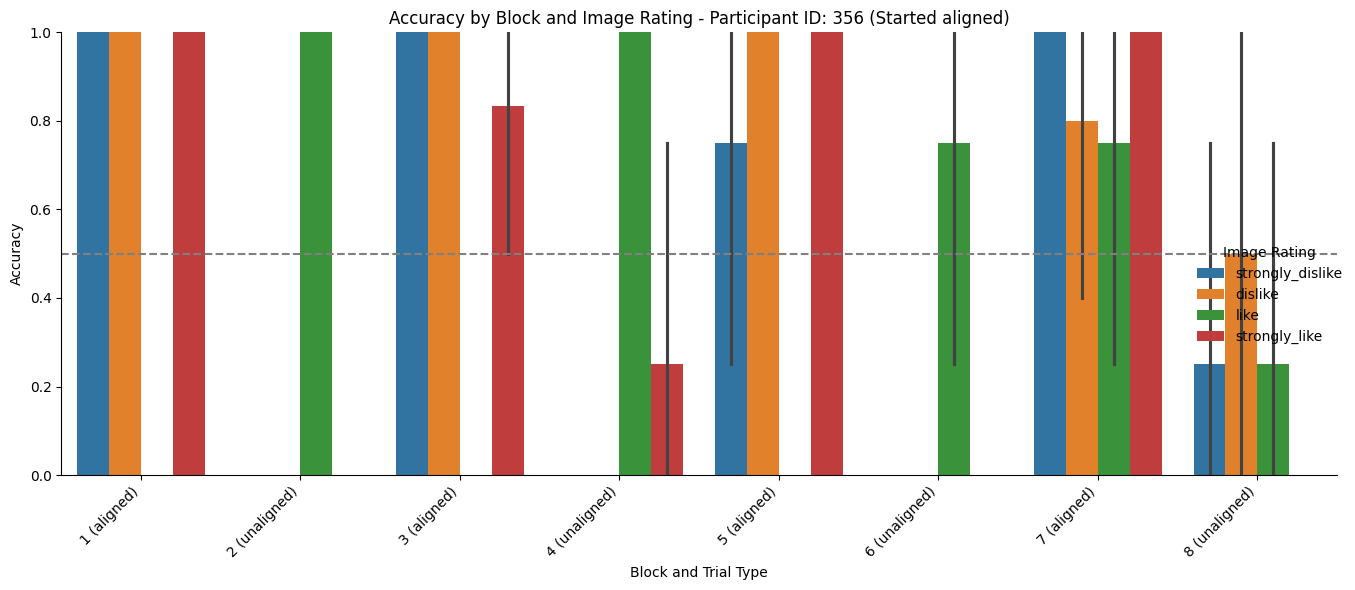

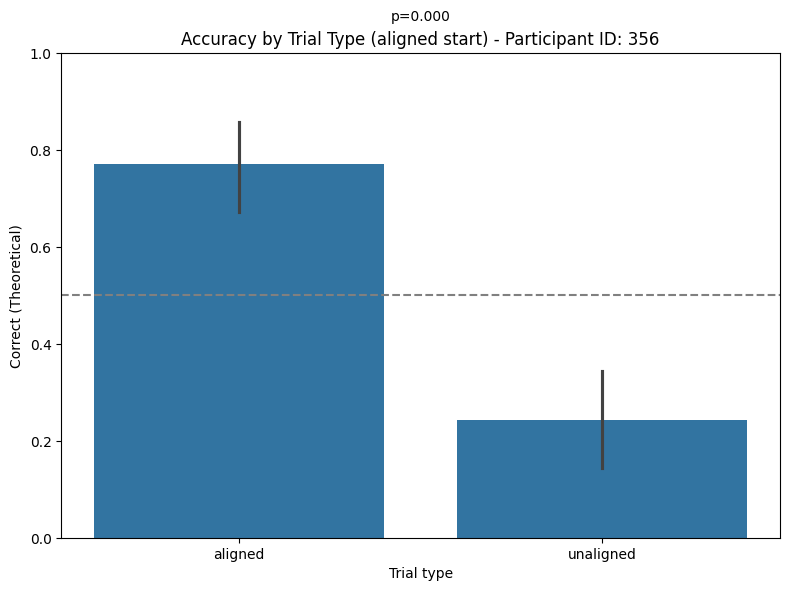

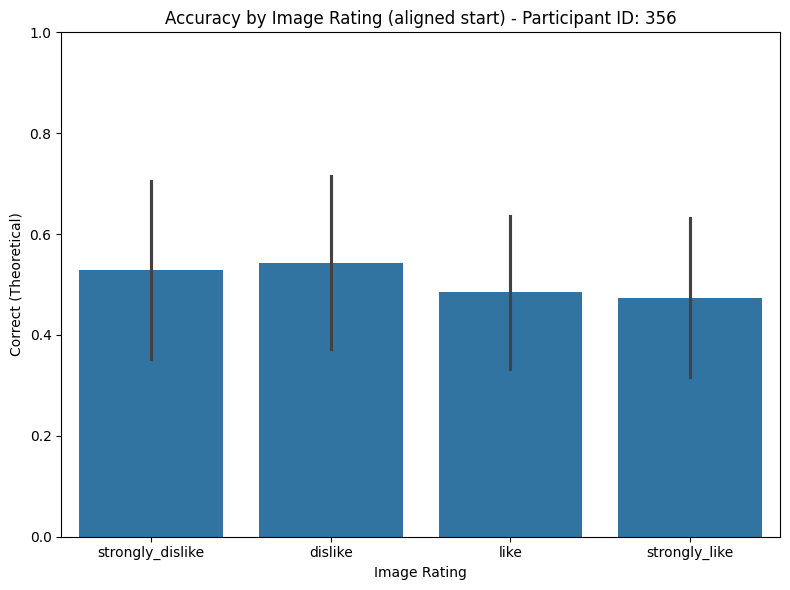

Participant ID: 356
Started with: aligned
Number of trials in each 'Block':
Block
1    16
2    20
3    19
4    16
5    16
6    18
7    19
8    16
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.750000
2    0.250000
3    0.736842
4    0.312500
5    0.687500
6    0.166667
7    0.894737
8    0.250000
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.771429
unaligned    0.242857
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 1.9030137349628762e-11

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.750000
            2        0.250000
            3        0.736842
            4        0.312500
            5        0.687500
            6        0.166667
            7        0.894737
            8        0.250000
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.529412
dislike       

<ipython-input-12-138bad539b13>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


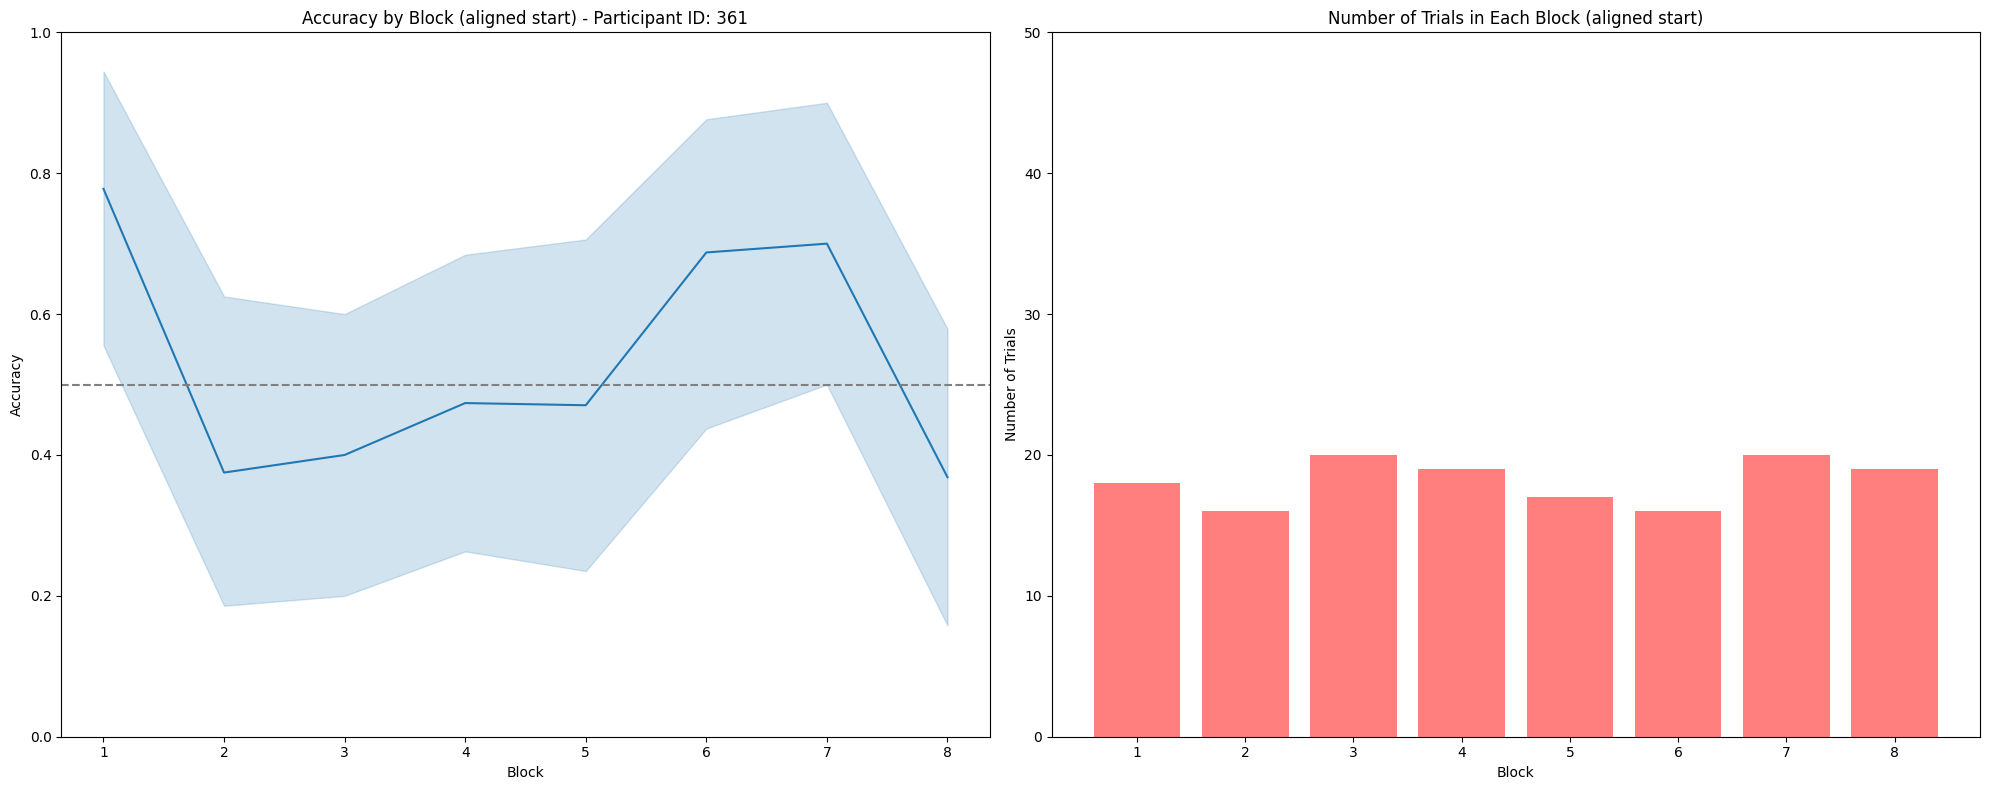

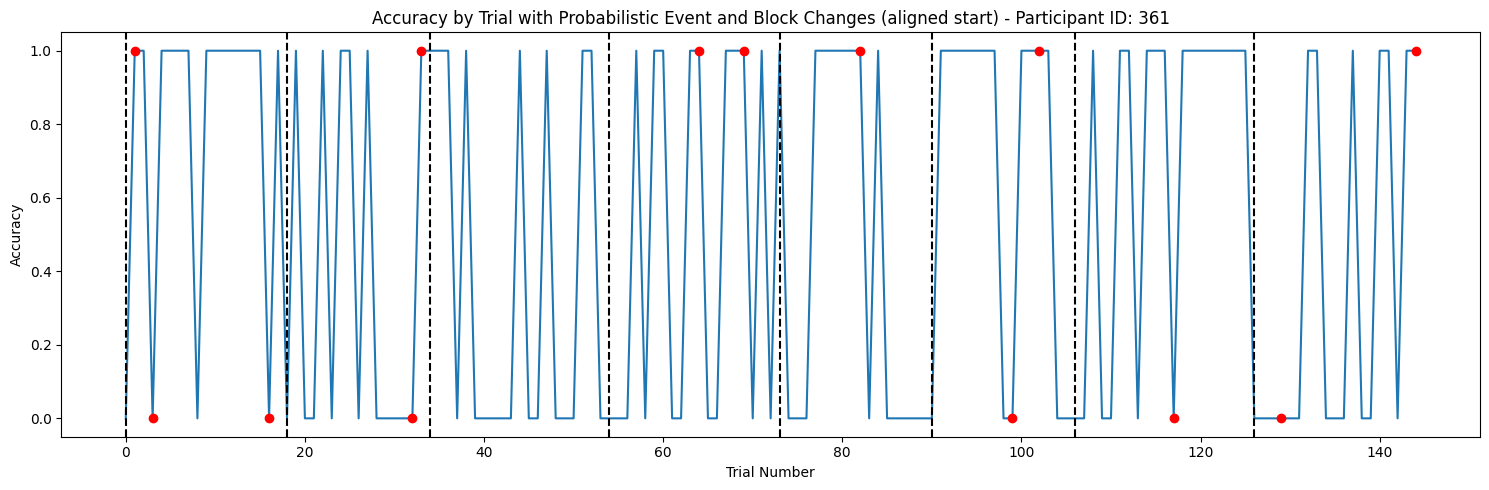

<Figure size 1200x800 with 0 Axes>

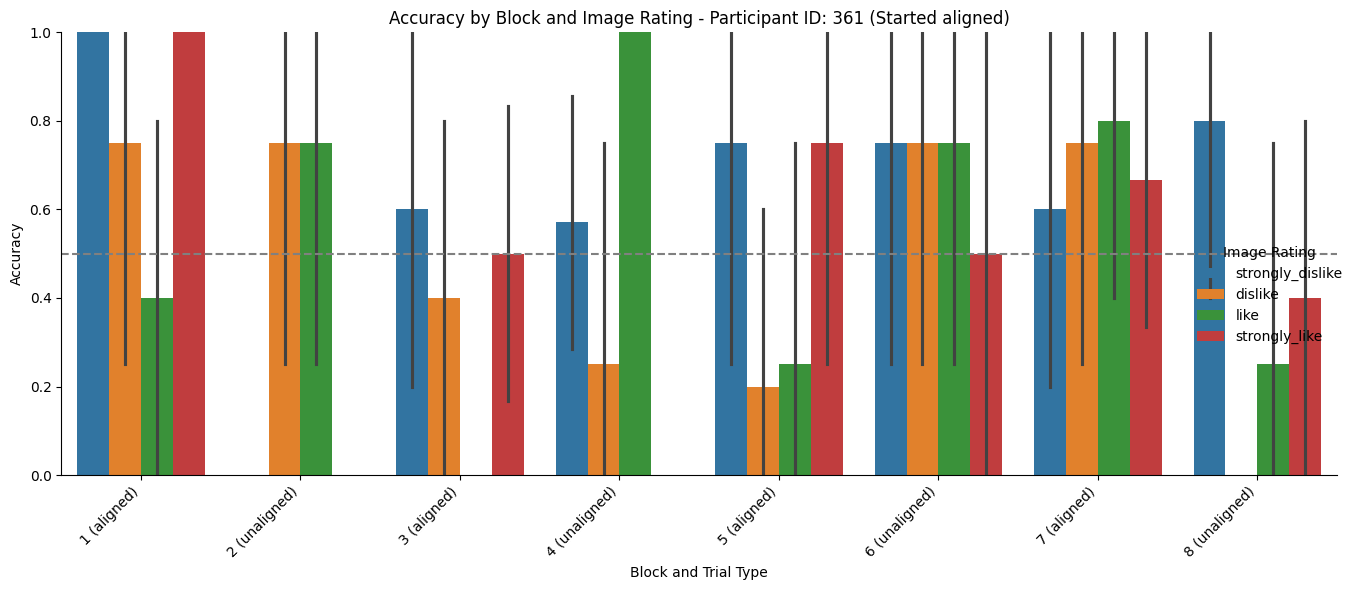

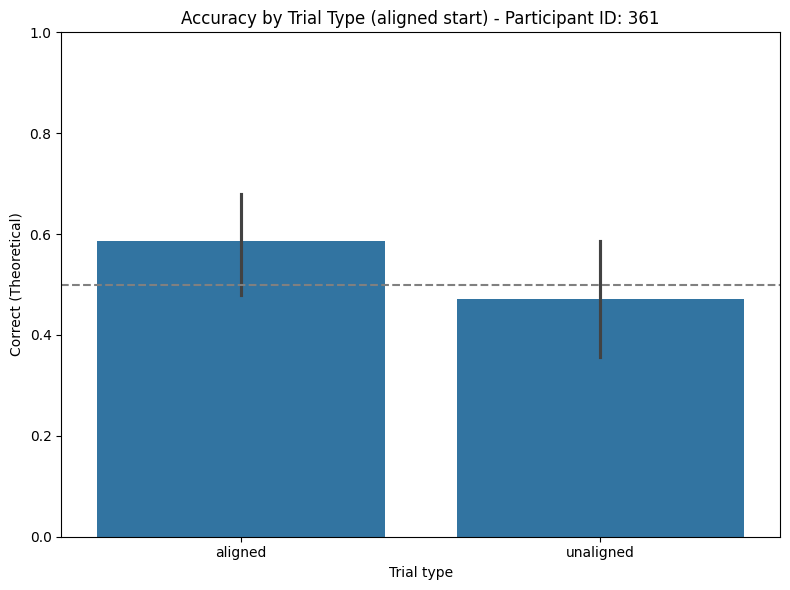

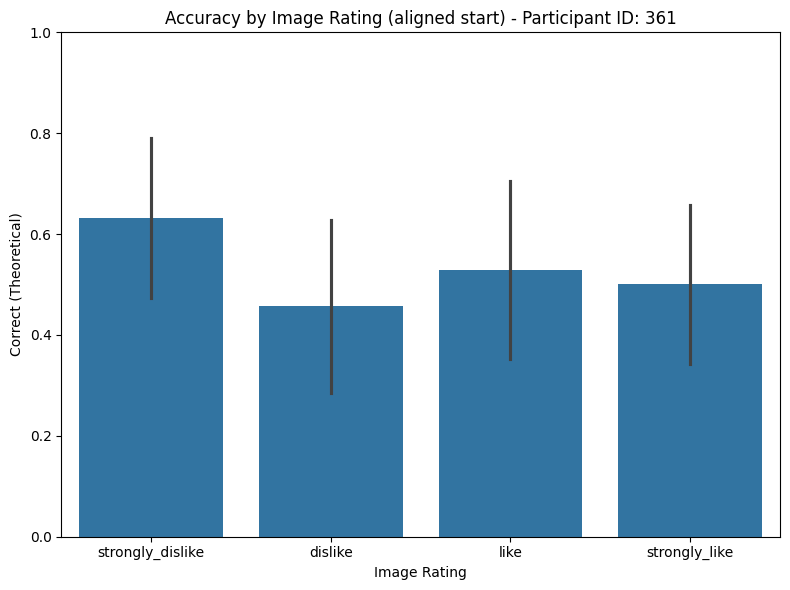

Participant ID: 361
Started with: aligned
Number of trials in each 'Block':
Block
1    18
2    16
3    20
4    19
5    17
6    16
7    20
8    19
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.777778
2    0.375000
3    0.400000
4    0.473684
5    0.470588
6    0.687500
7    0.700000
8    0.368421
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.586667
unaligned    0.471429
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 0.16694115913307356

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.777778
            2        0.375000
            3        0.400000
            4        0.473684
            5        0.470588
            6        0.687500
            7        0.700000
            8        0.368421
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.631579
dislike          

<ipython-input-12-138bad539b13>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


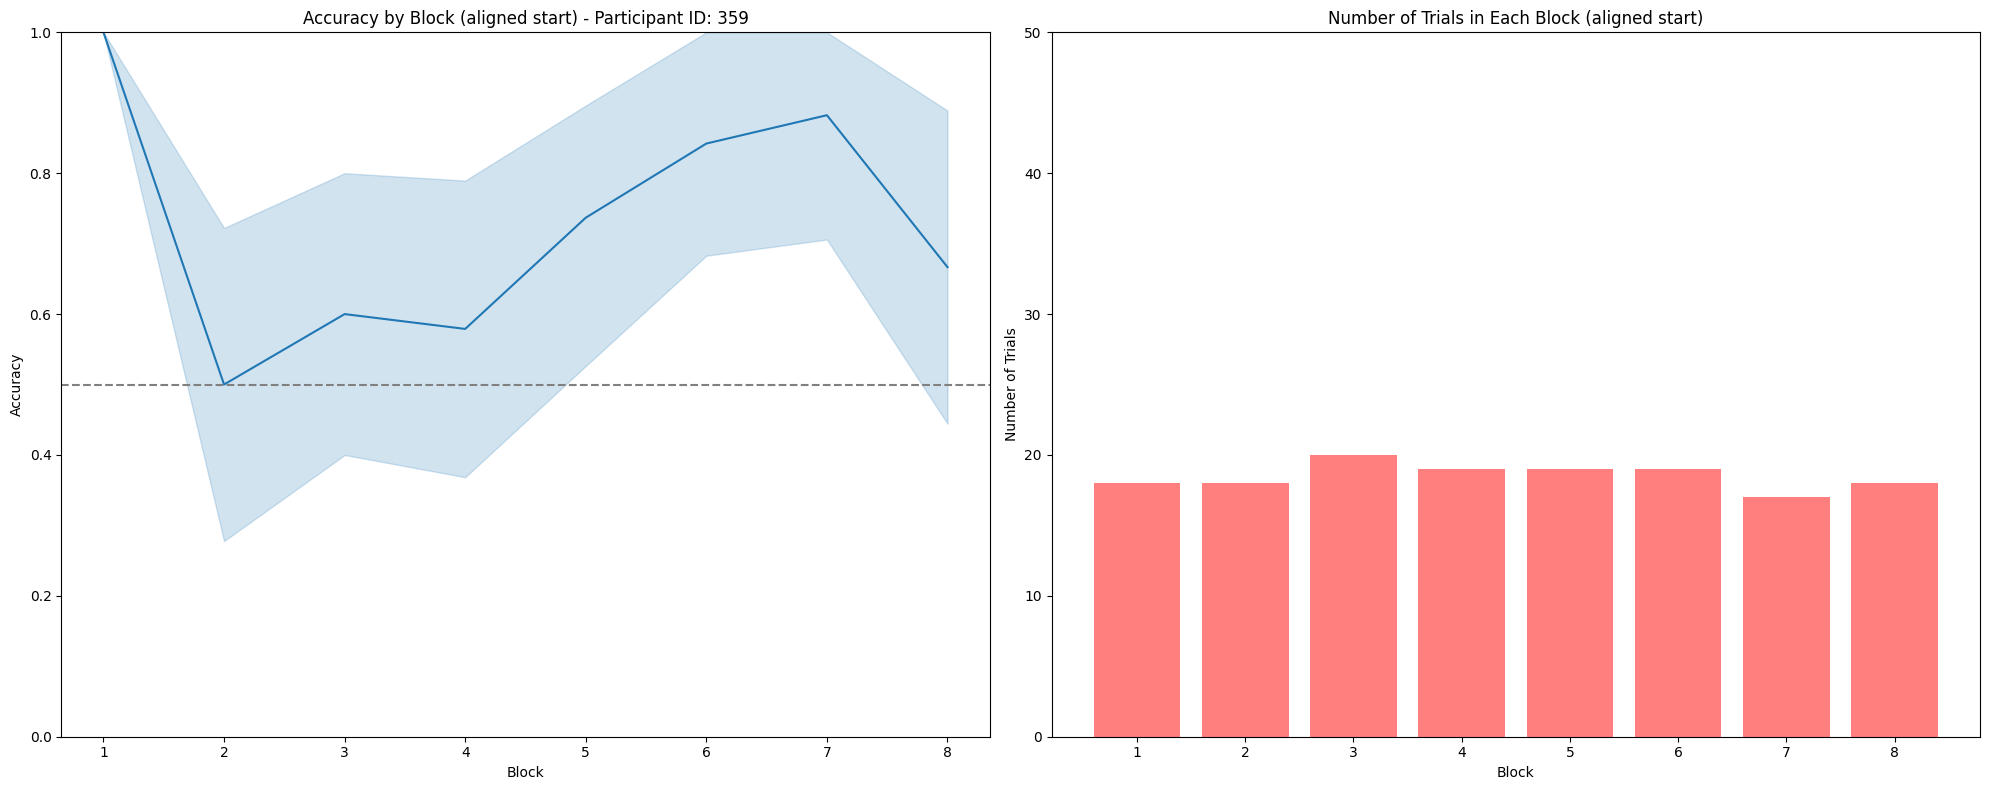

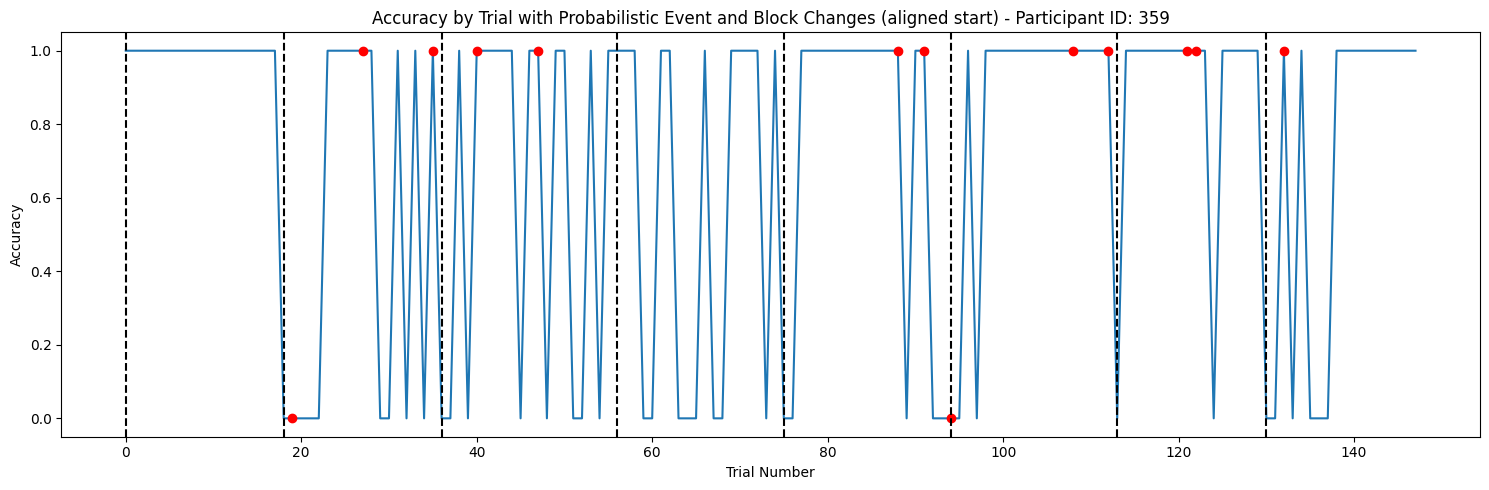

<Figure size 1200x800 with 0 Axes>

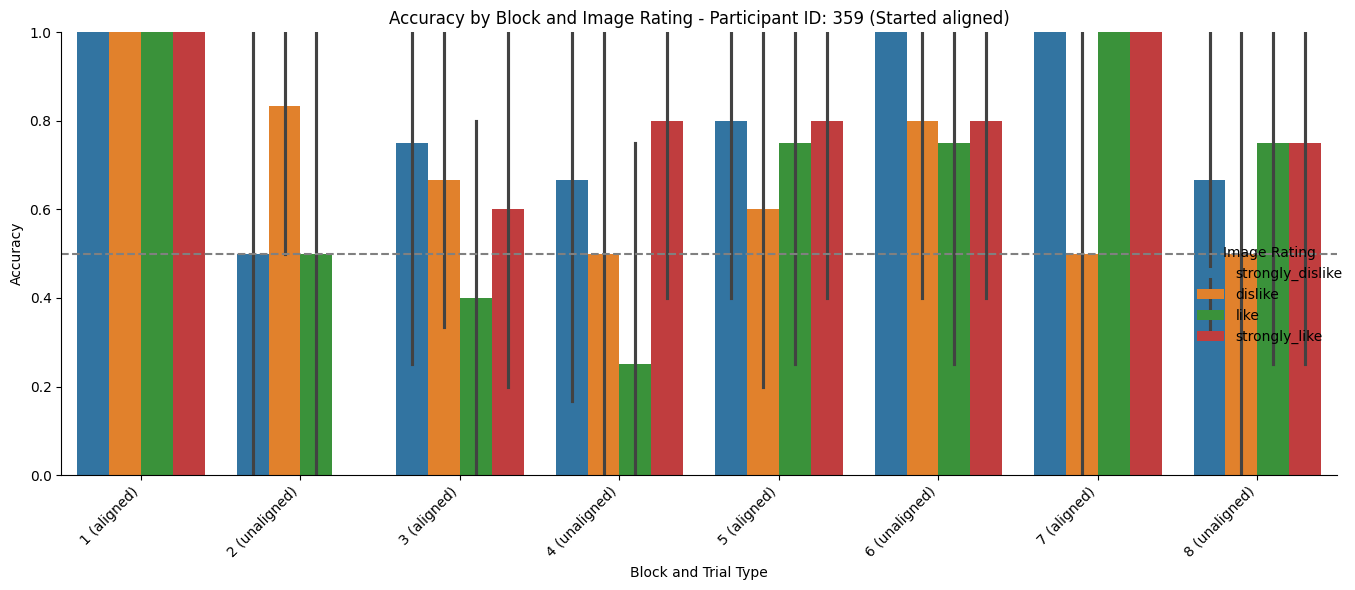

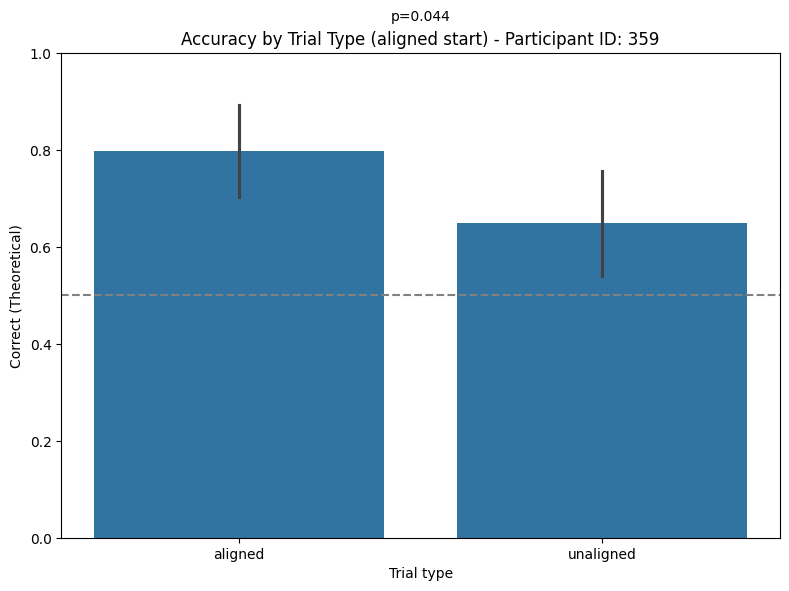

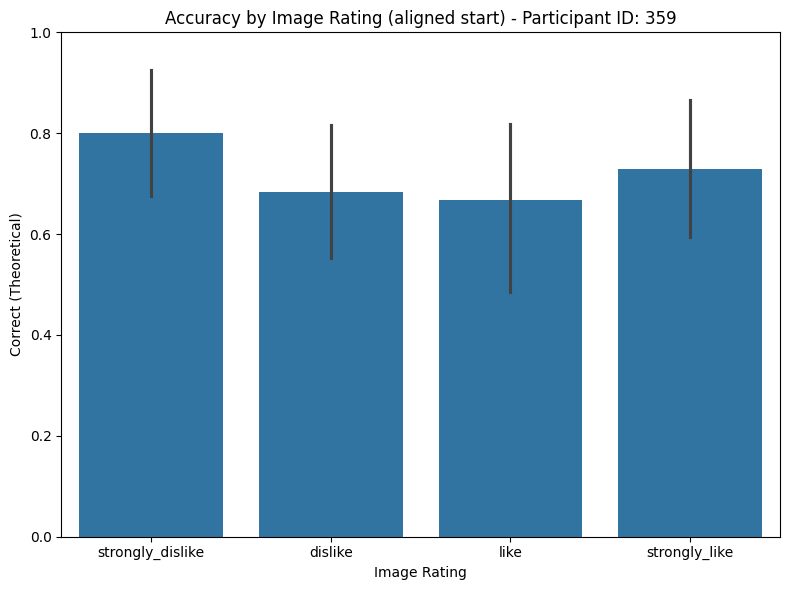

Participant ID: 359
Started with: aligned
Number of trials in each 'Block':
Block
1    18
2    18
3    20
4    19
5    19
6    19
7    17
8    18
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    1.000000
2    0.500000
3    0.600000
4    0.578947
5    0.736842
6    0.842105
7    0.882353
8    0.666667
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.797297
unaligned    0.648649
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 0.04366299704582564

Accuracy over the whole task:
All Trials  Block
All Trials  1        1.000000
            2        0.500000
            3        0.600000
            4        0.578947
            5        0.736842
            6        0.842105
            7        0.882353
            8        0.666667
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.800000
dislike          

<ipython-input-12-138bad539b13>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


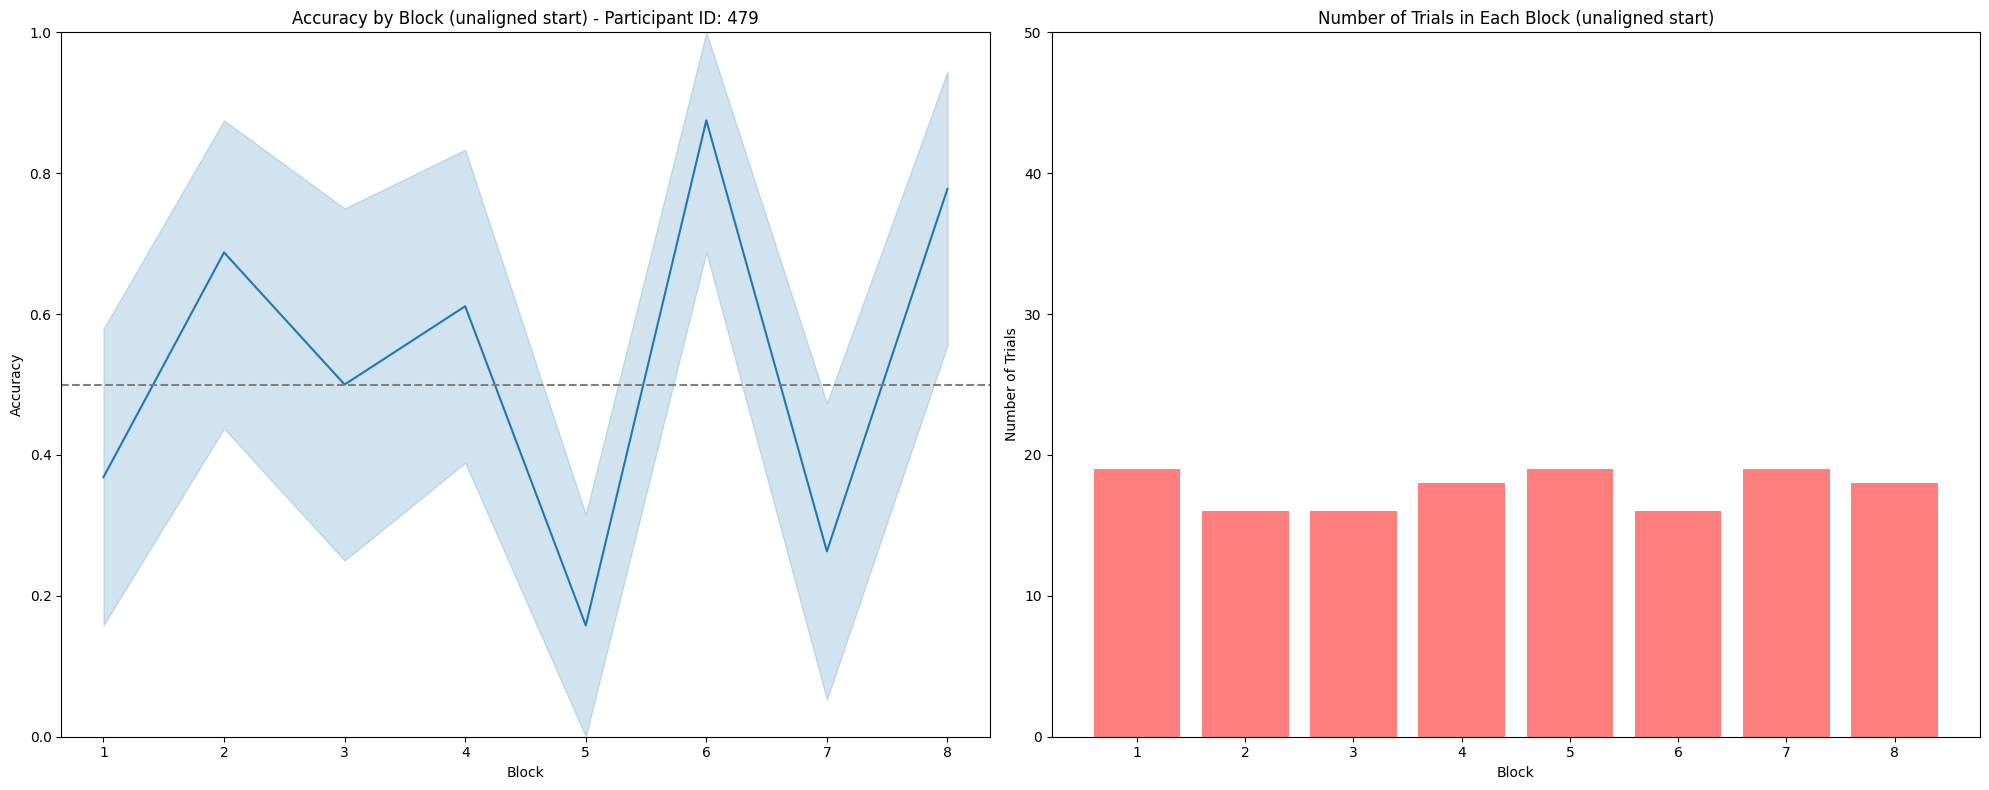

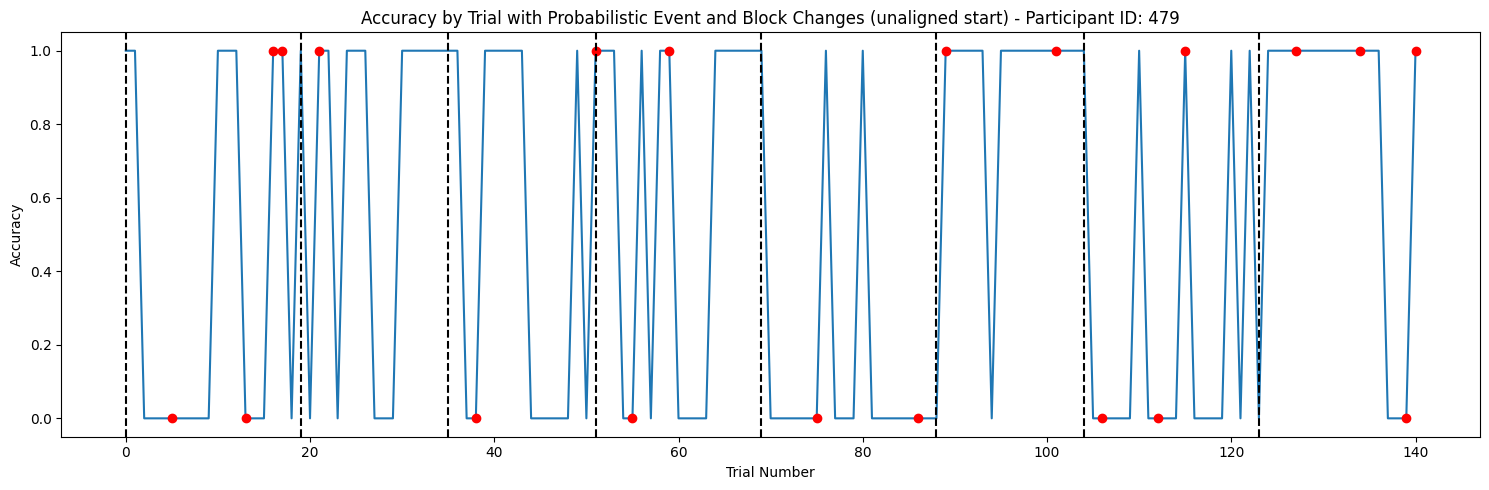

<Figure size 1200x800 with 0 Axes>

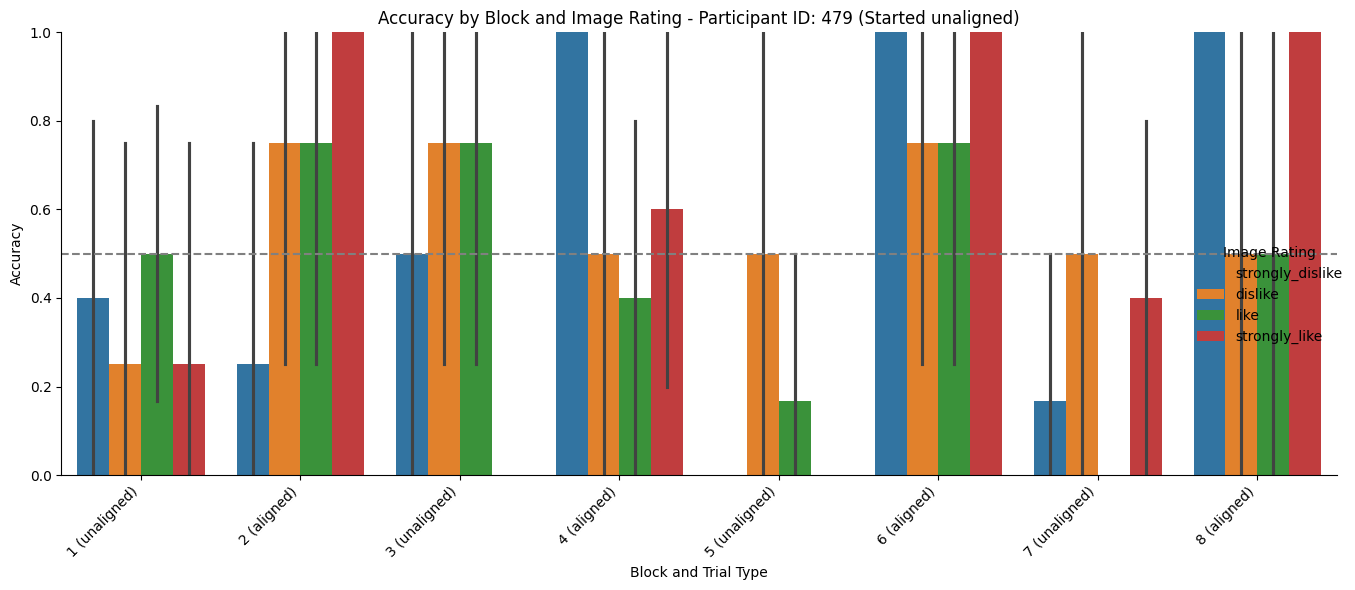

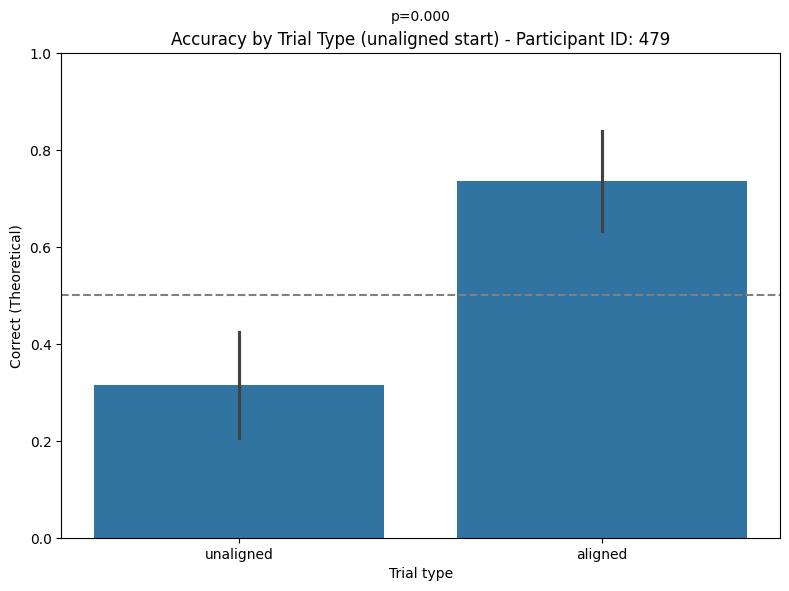

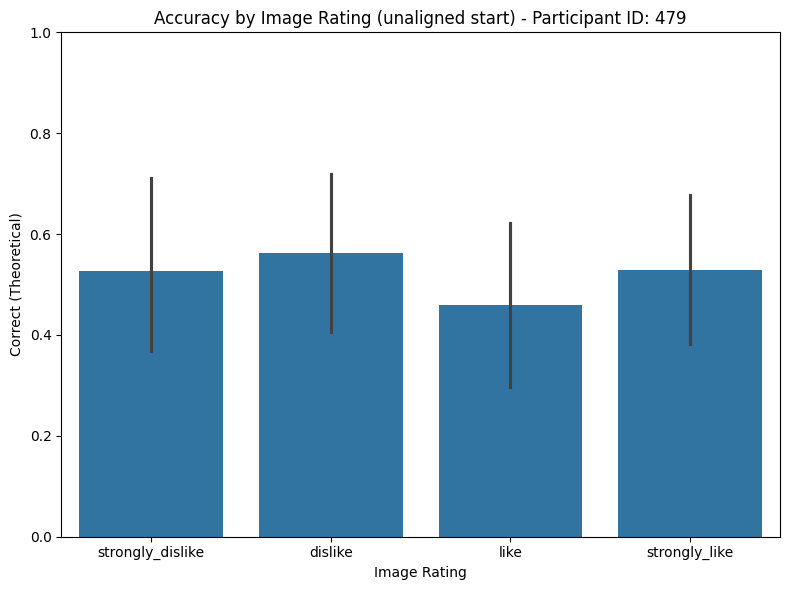

Participant ID: 479
Started with: unaligned
Number of trials in each 'Block':
Block
1    19
2    16
3    16
4    18
5    19
6    16
7    19
8    18
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.368421
2    0.687500
3    0.500000
4    0.611111
5    0.157895
6    0.875000
7    0.263158
8    0.777778
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.735294
unaligned    0.315068
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 2.128921290343493e-07

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.368421
            2        0.687500
            3        0.500000
            4        0.611111
            5        0.157895
            6        0.875000
            7        0.263158
            8        0.777778
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.526316
dislike      

<ipython-input-12-138bad539b13>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


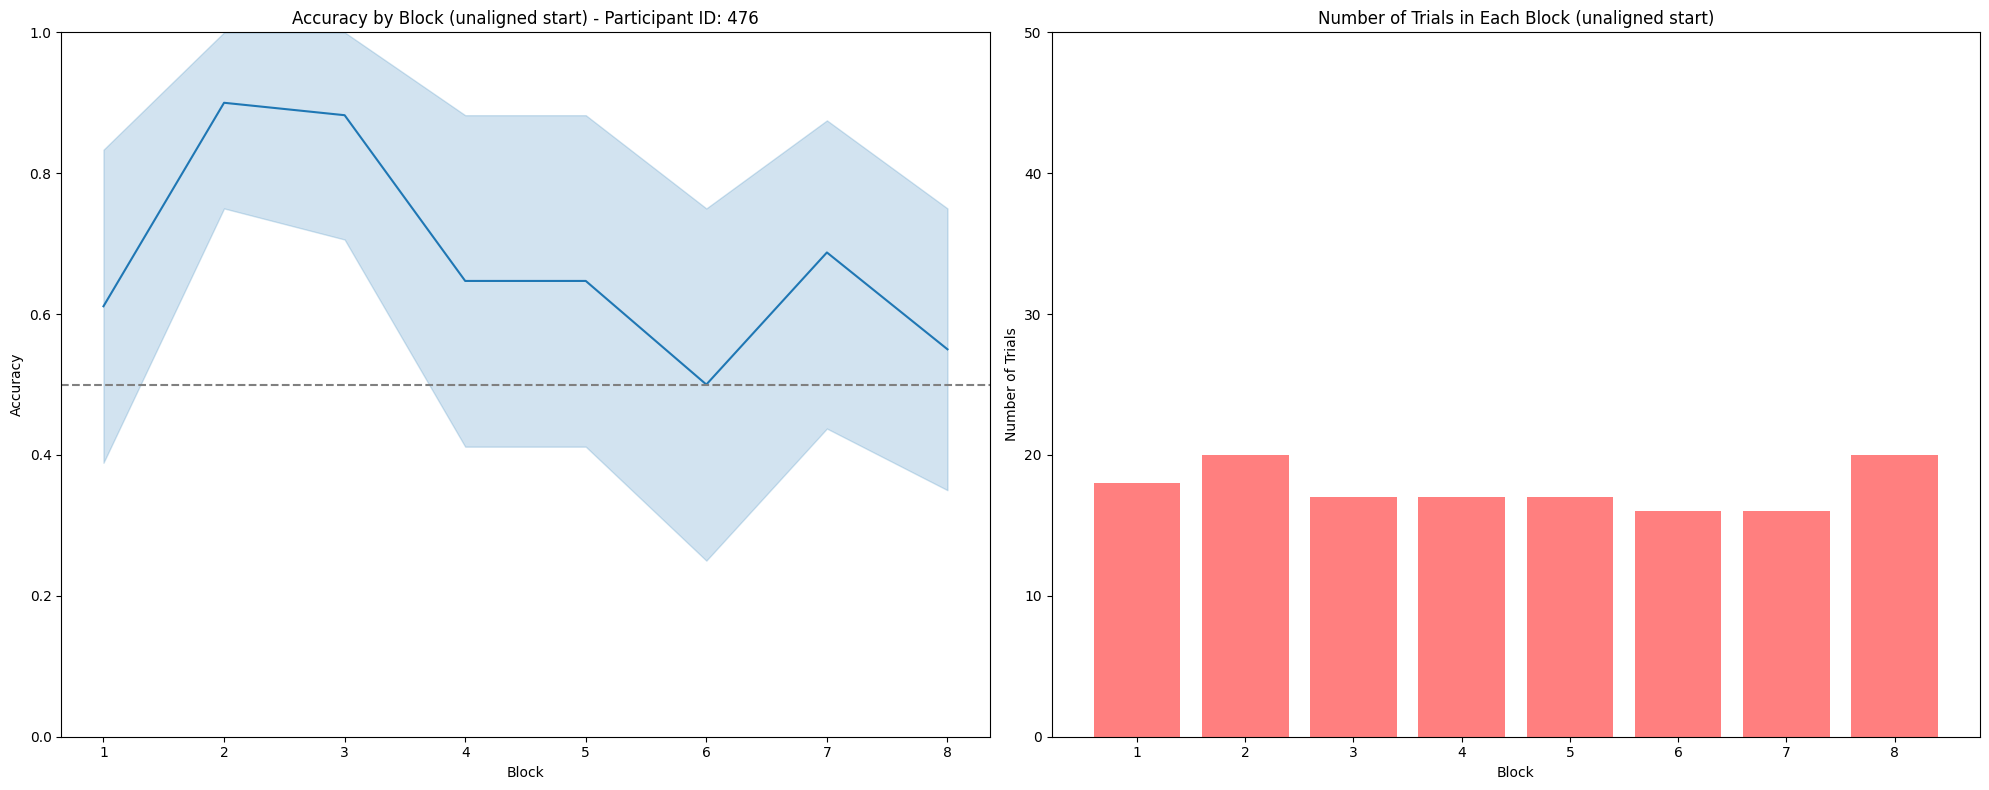

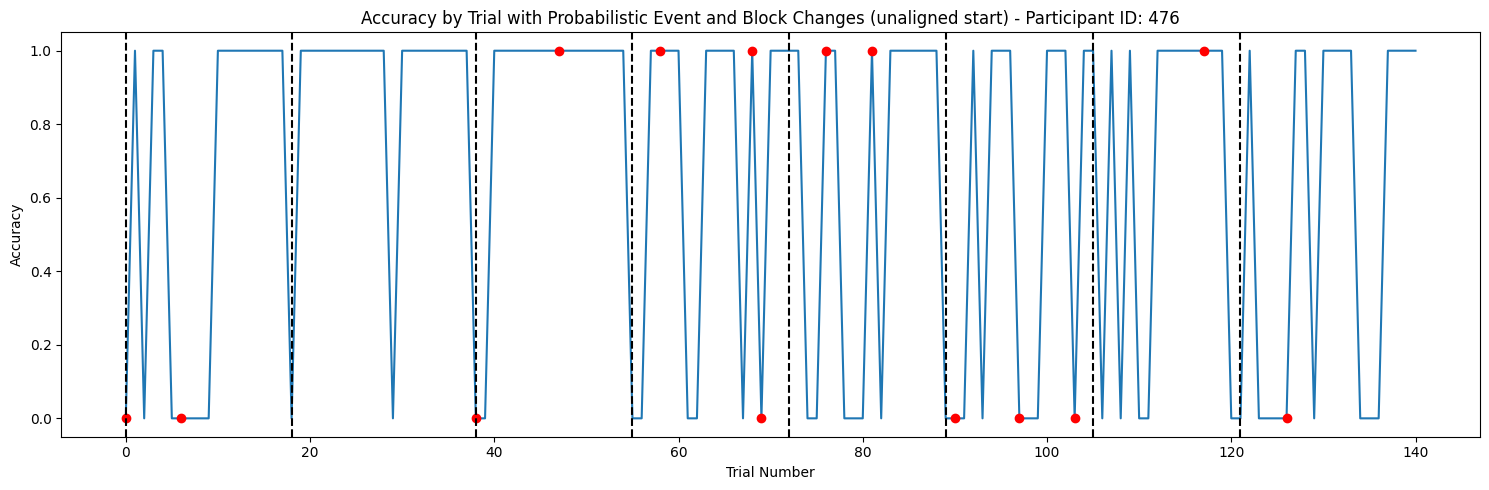

<Figure size 1200x800 with 0 Axes>

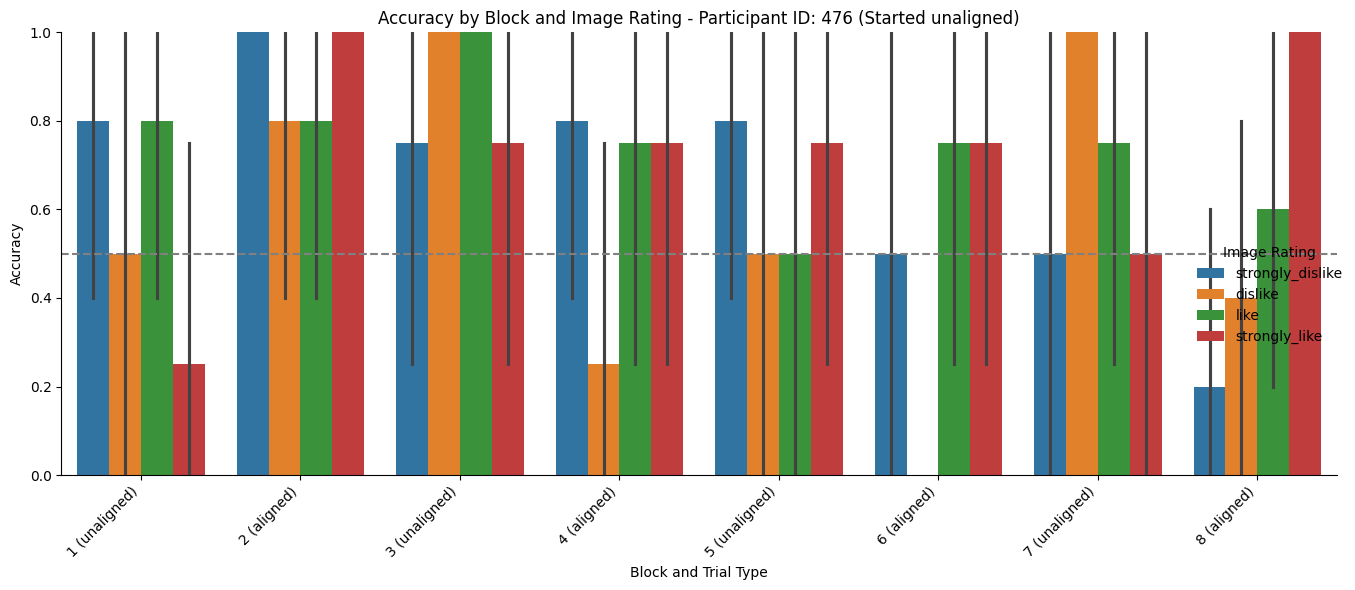

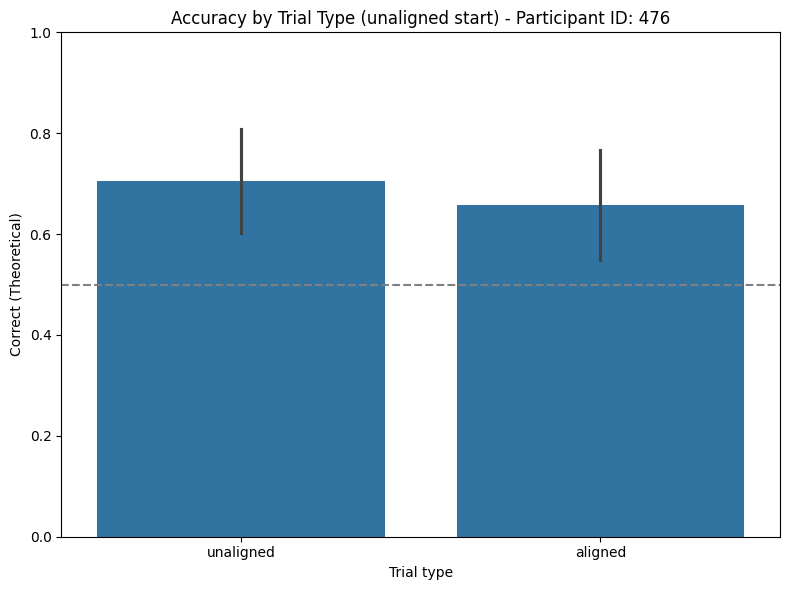

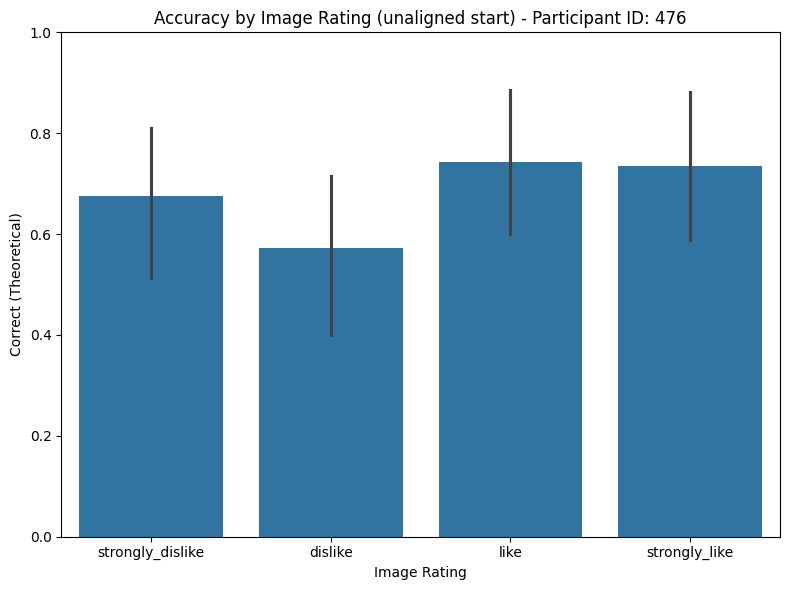

Participant ID: 476
Started with: unaligned
Number of trials in each 'Block':
Block
1    18
2    20
3    17
4    17
5    17
6    16
7    16
8    20
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.611111
2    0.900000
3    0.882353
4    0.647059
5    0.647059
6    0.500000
7    0.687500
8    0.550000
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.657534
unaligned    0.705882
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 0.541636528419069

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.611111
            2        0.900000
            3        0.882353
            4        0.647059
            5        0.647059
            6        0.500000
            7        0.687500
            8        0.550000
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.675676
dislike          

<ipython-input-12-138bad539b13>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


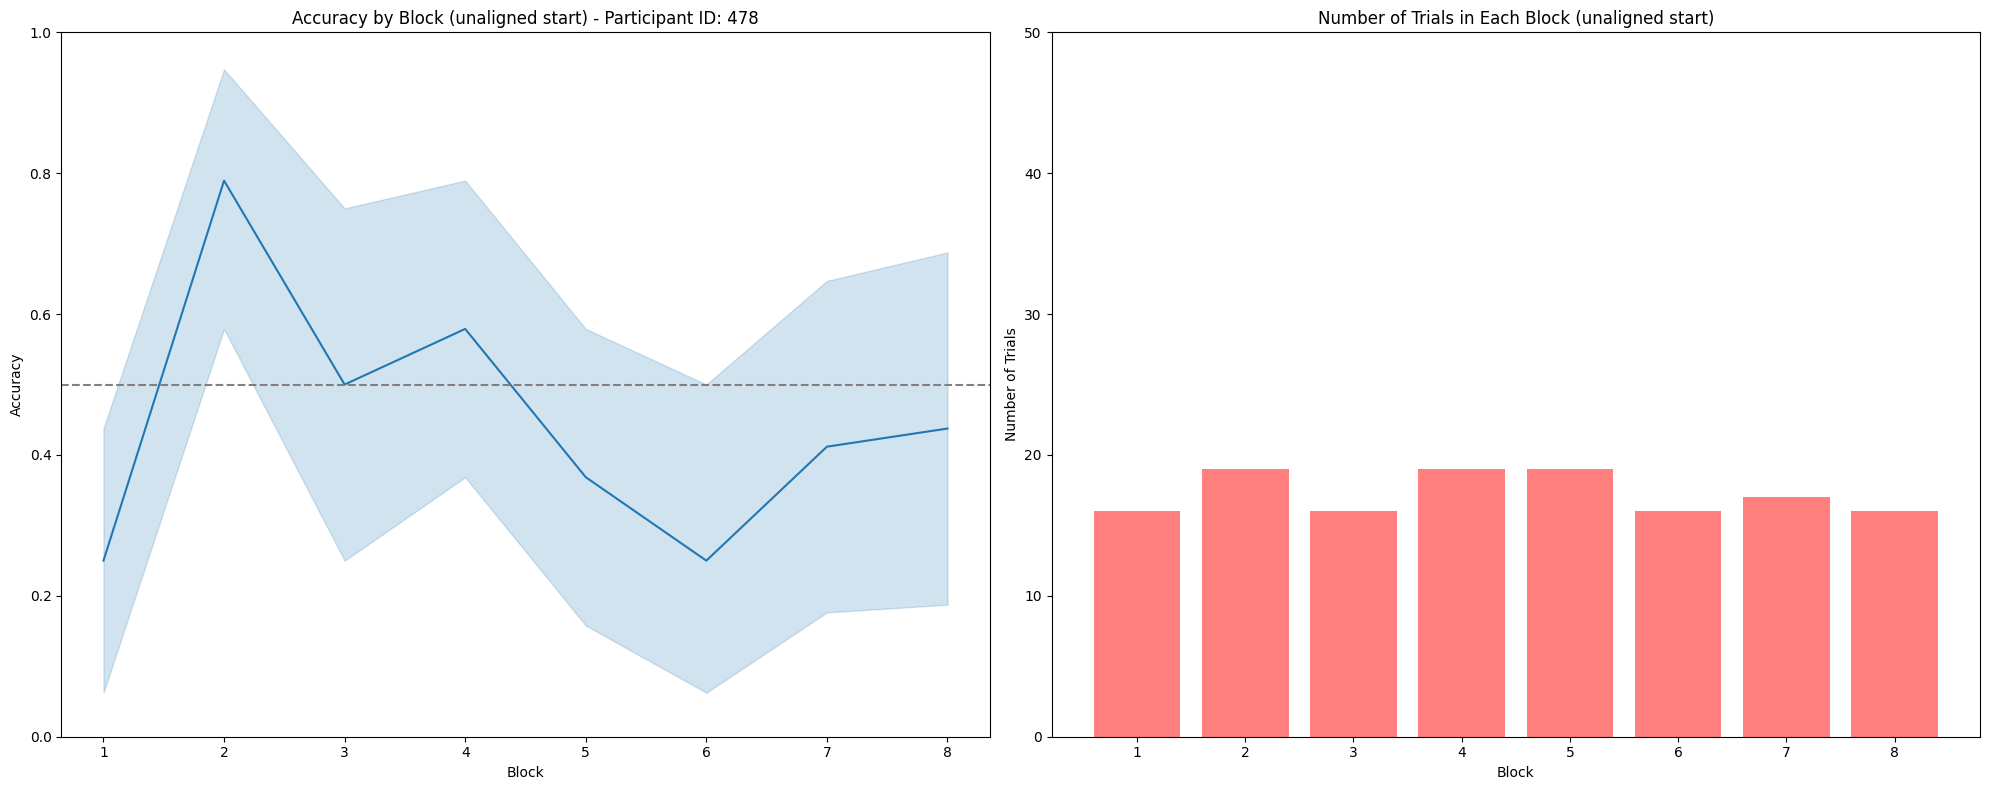

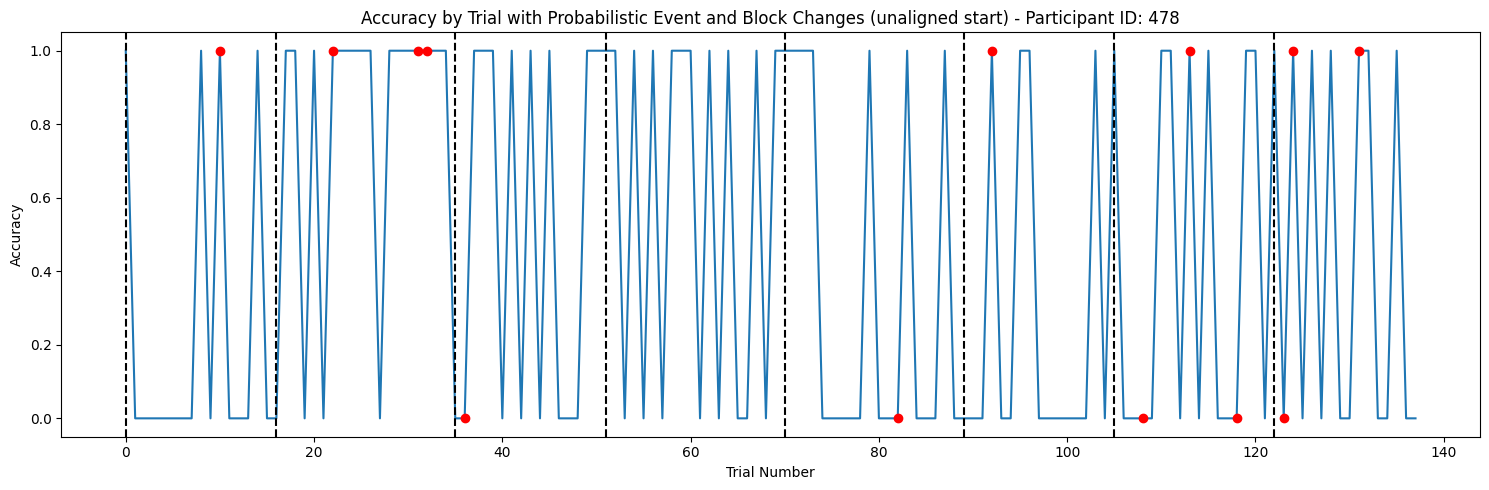

<Figure size 1200x800 with 0 Axes>

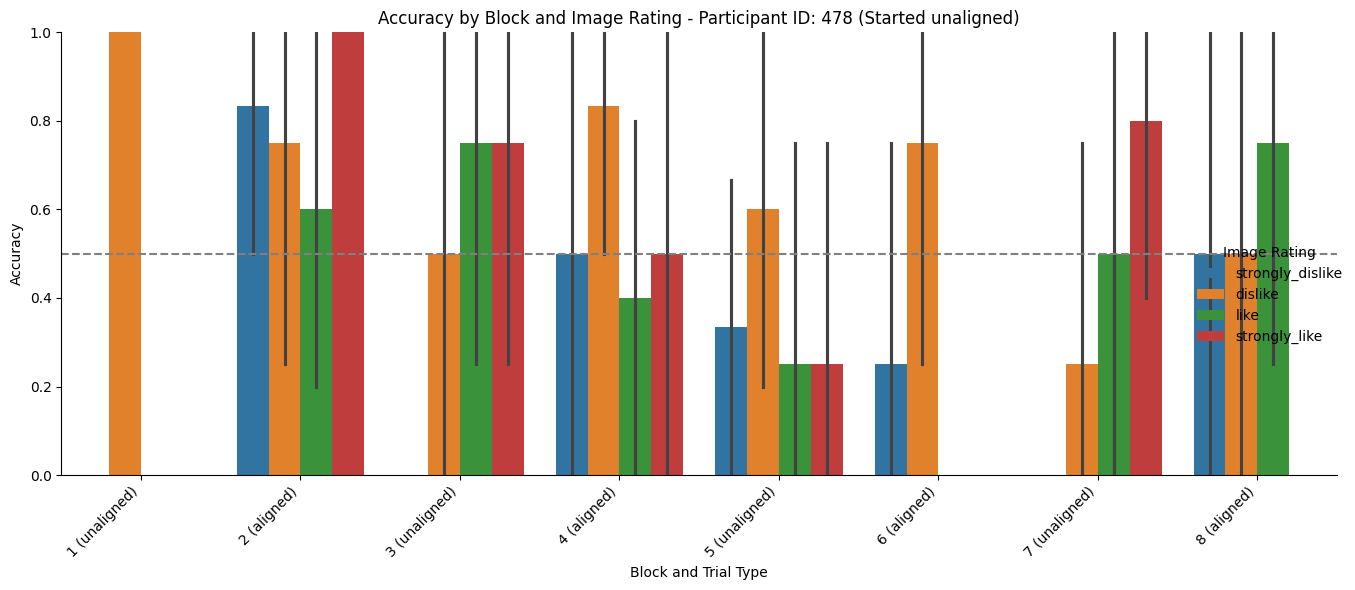

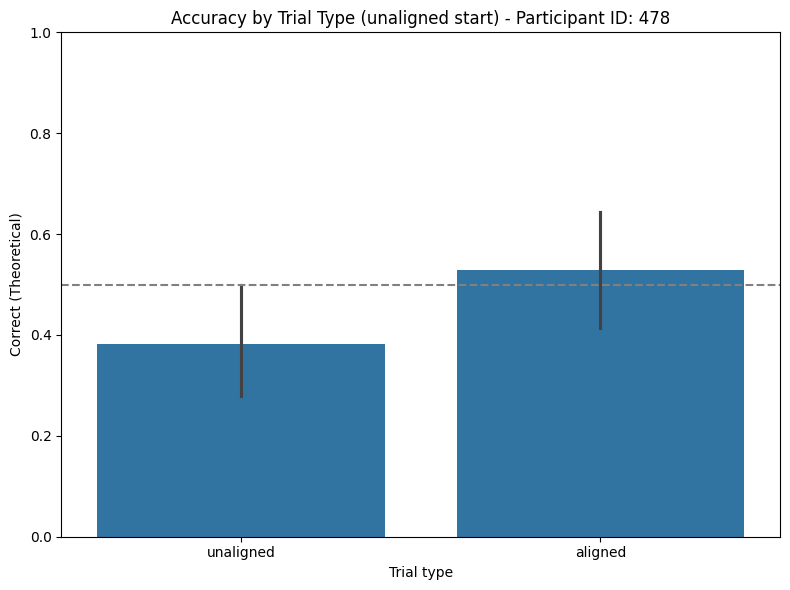

<ipython-input-12-138bad539b13>:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  height = max(df.groupby('Image Rating')['Correct (Theoretical)'].max()) + 0.05


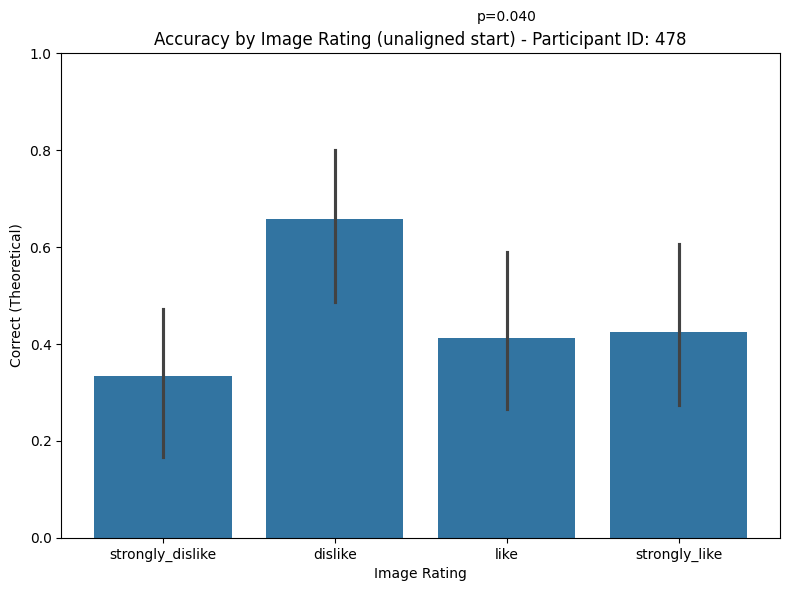

Participant ID: 478
Started with: unaligned
Number of trials in each 'Block':
Block
1    16
2    19
3    16
4    19
5    19
6    16
7    17
8    16
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.250000
2    0.789474
3    0.500000
4    0.578947
5    0.368421
6    0.250000
7    0.411765
8    0.437500
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.528571
unaligned    0.382353
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 0.08585866530474778

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.250000
            2        0.789474
            3        0.500000
            4        0.578947
            5        0.368421
            6        0.250000
            7        0.411765
            8        0.437500
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.333333
dislike        

<ipython-input-12-138bad539b13>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


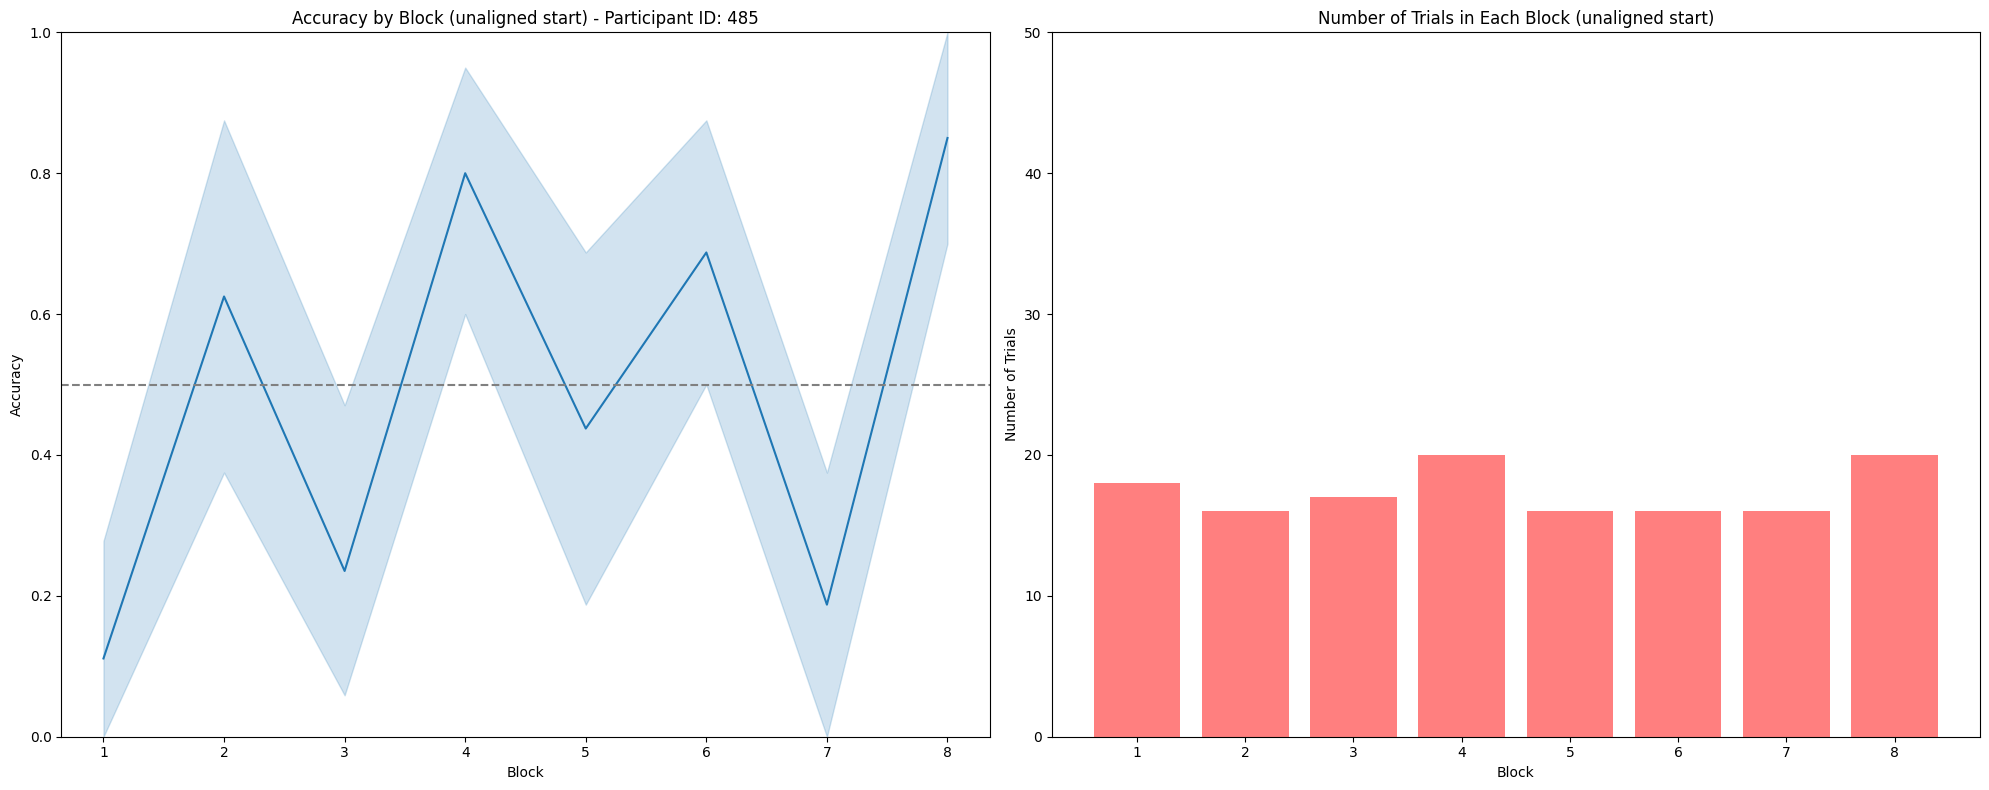

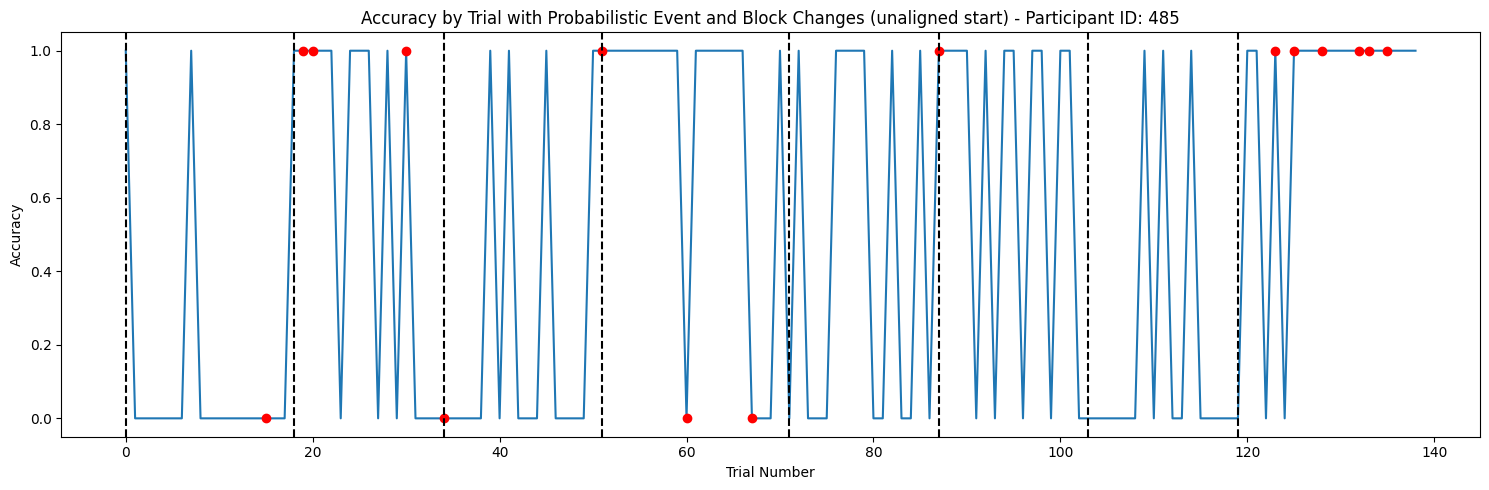

<Figure size 1200x800 with 0 Axes>

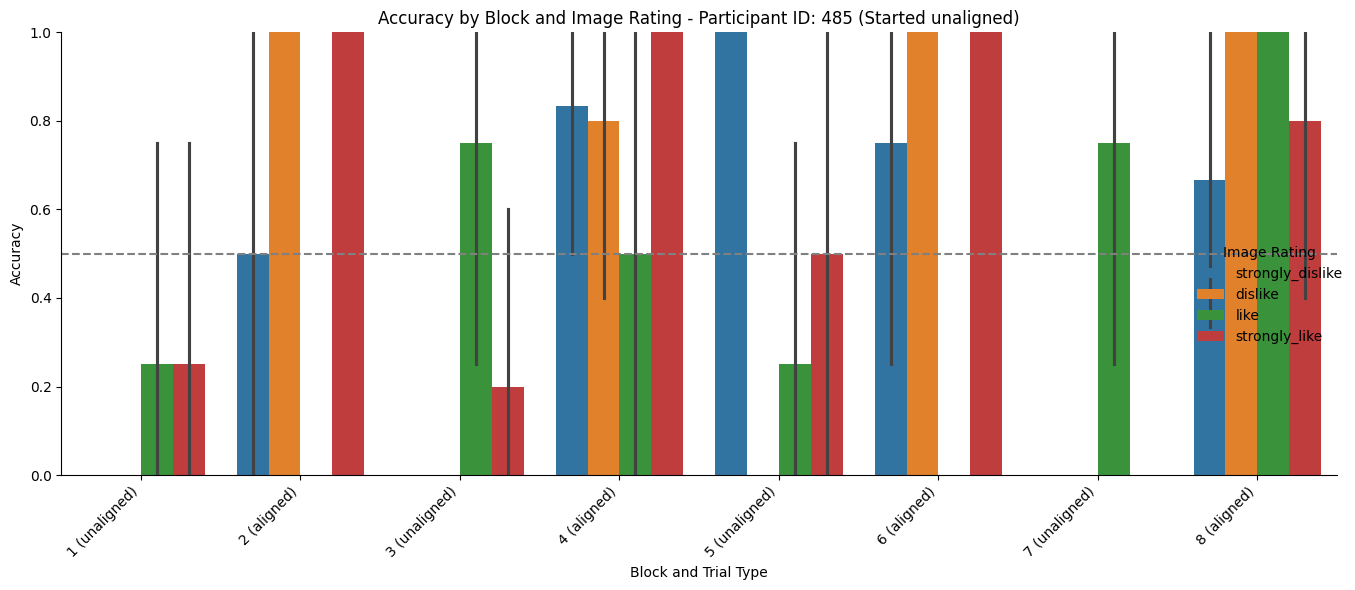

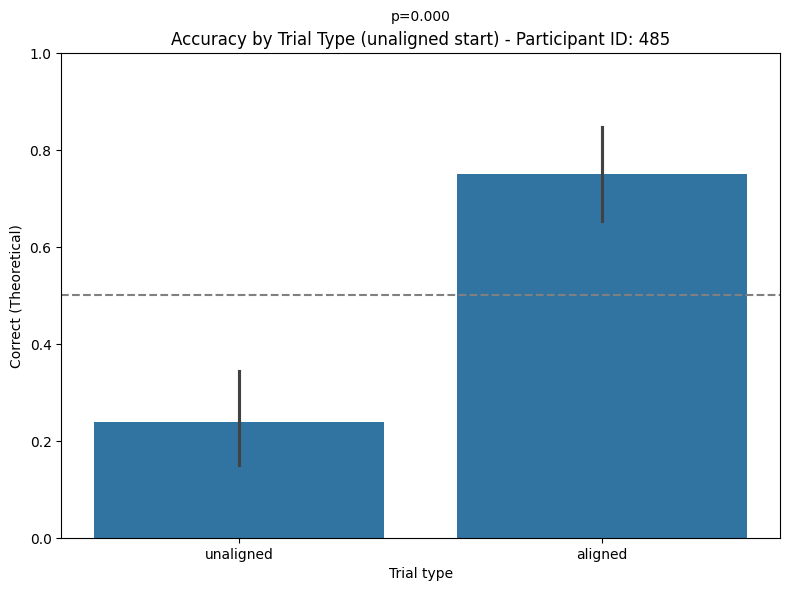

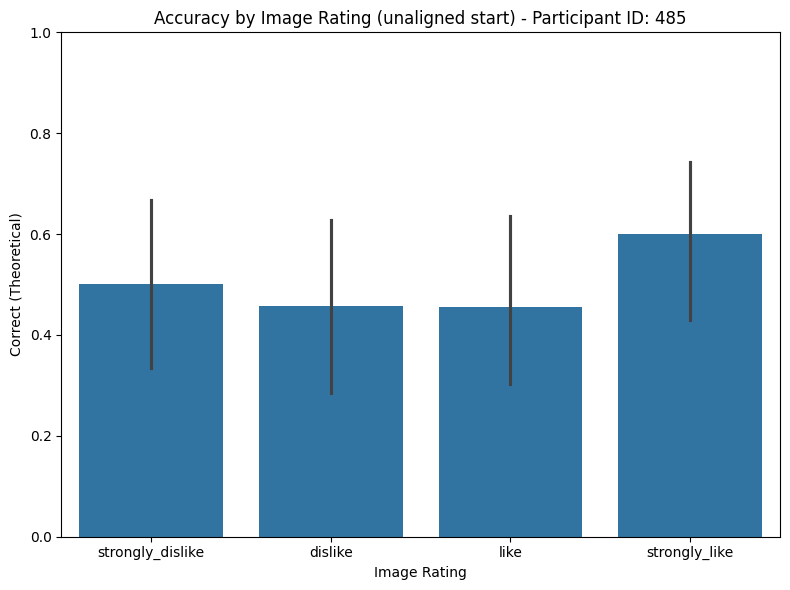

Participant ID: 485
Started with: unaligned
Number of trials in each 'Block':
Block
1    18
2    16
3    17
4    20
5    16
6    16
7    16
8    20
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.111111
2    0.625000
3    0.235294
4    0.800000
5    0.437500
6    0.687500
7    0.187500
8    0.850000
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.750000
unaligned    0.238806
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 1.313367435684042e-10

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.111111
            2        0.625000
            3        0.235294
            4        0.800000
            5        0.437500
            6        0.687500
            7        0.187500
            8        0.850000
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.500000
dislike      

<ipython-input-12-138bad539b13>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


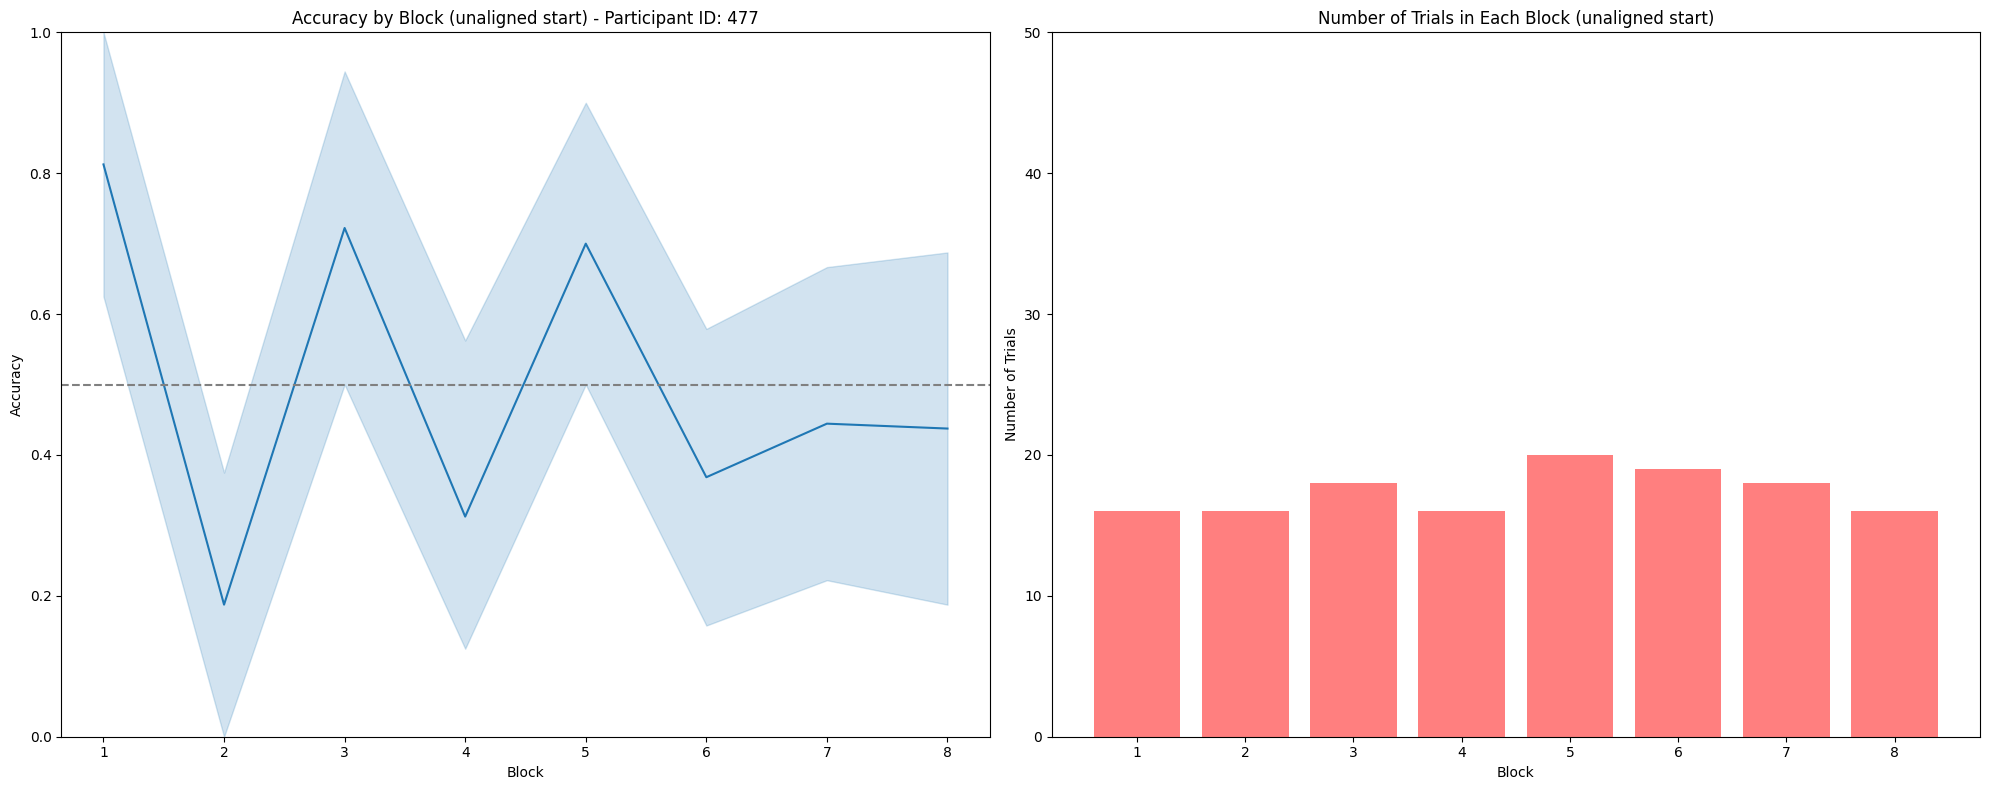

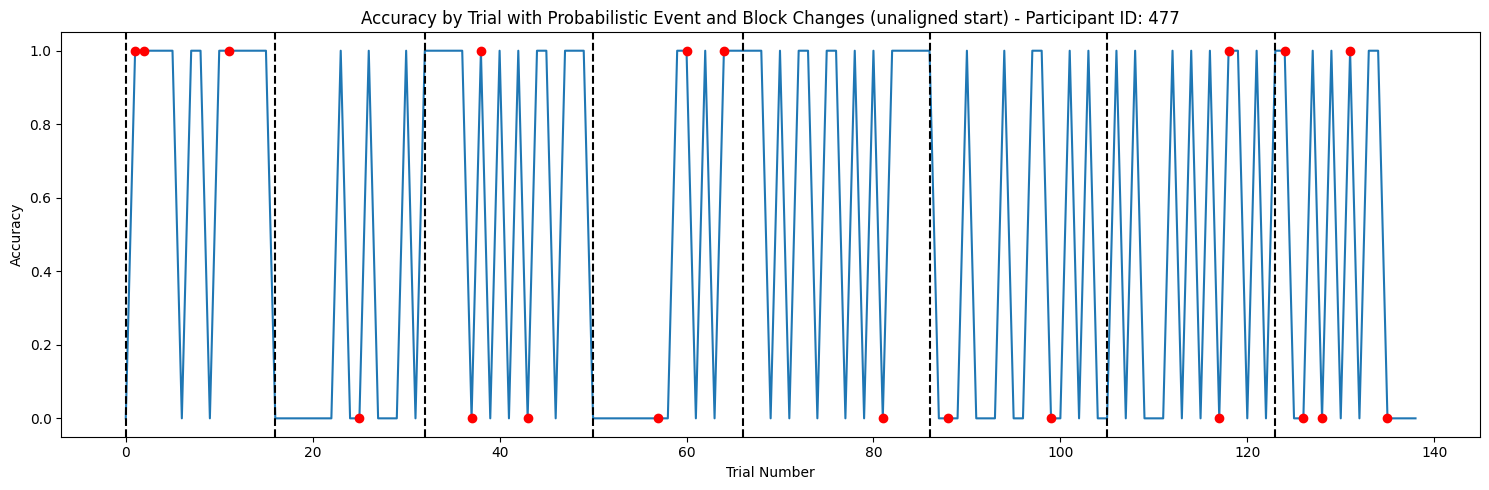

<Figure size 1200x800 with 0 Axes>

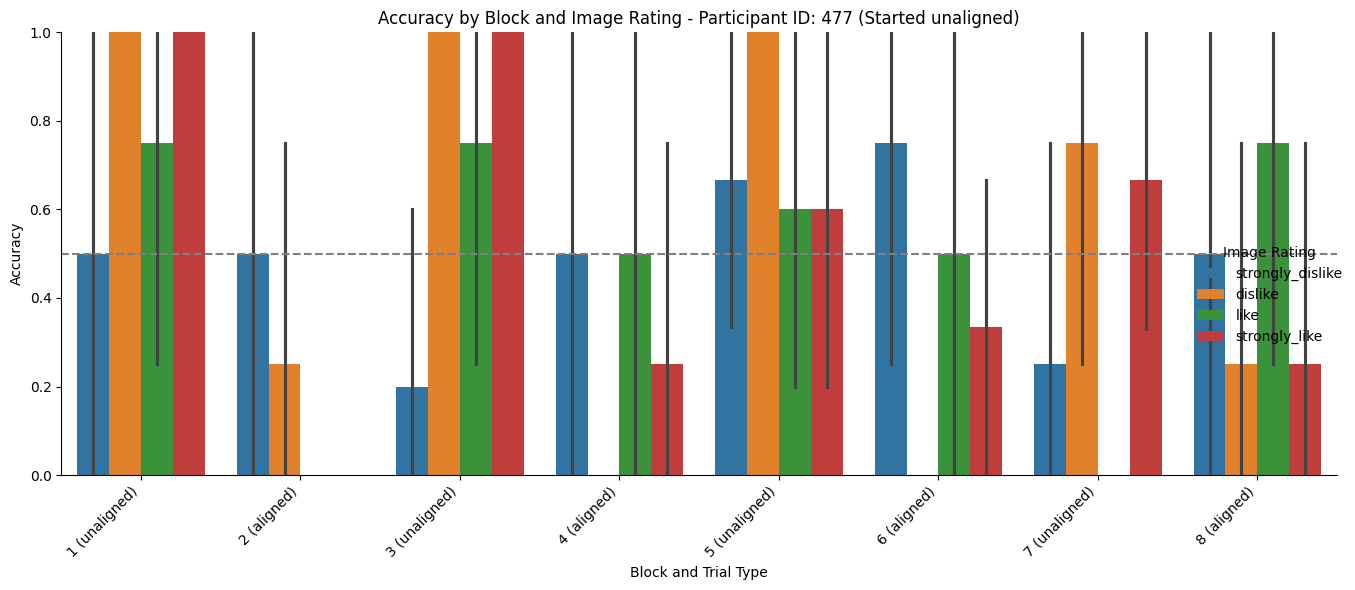

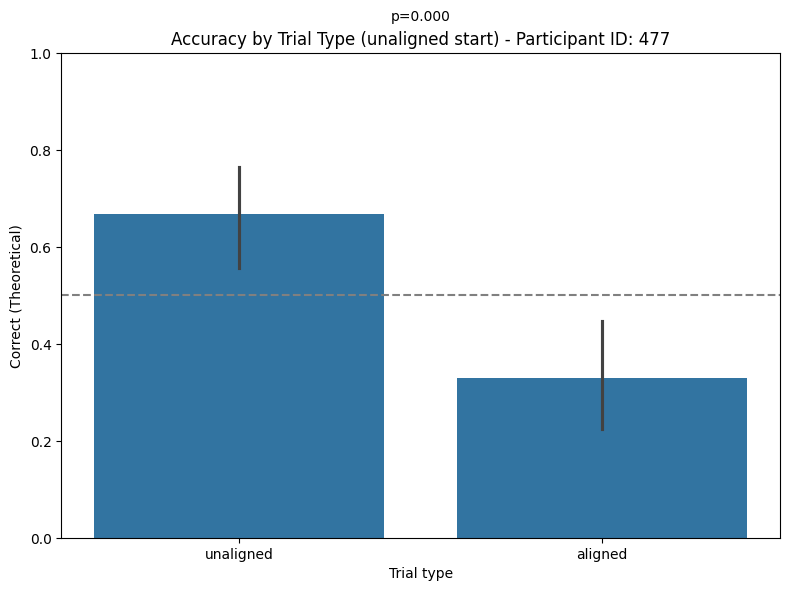

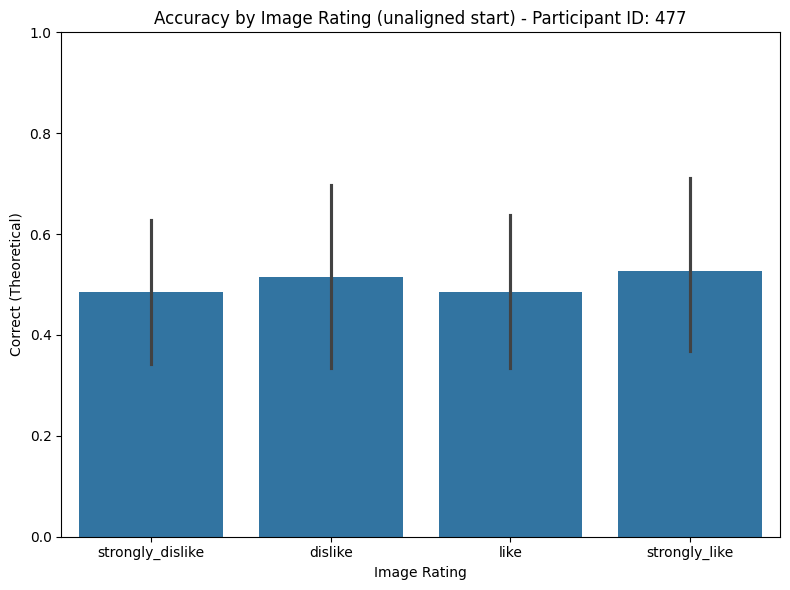

Participant ID: 477
Started with: unaligned
Number of trials in each 'Block':
Block
1    16
2    16
3    18
4    16
5    20
6    19
7    18
8    16
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.812500
2    0.187500
3    0.722222
4    0.312500
5    0.700000
6    0.368421
7    0.444444
8    0.437500
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.328358
unaligned    0.666667
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 4.6879658689775456e-05

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.812500
            2        0.187500
            3        0.722222
            4        0.312500
            5        0.700000
            6        0.368421
            7        0.444444
            8        0.437500
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.485714
dislike     

<ipython-input-12-138bad539b13>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


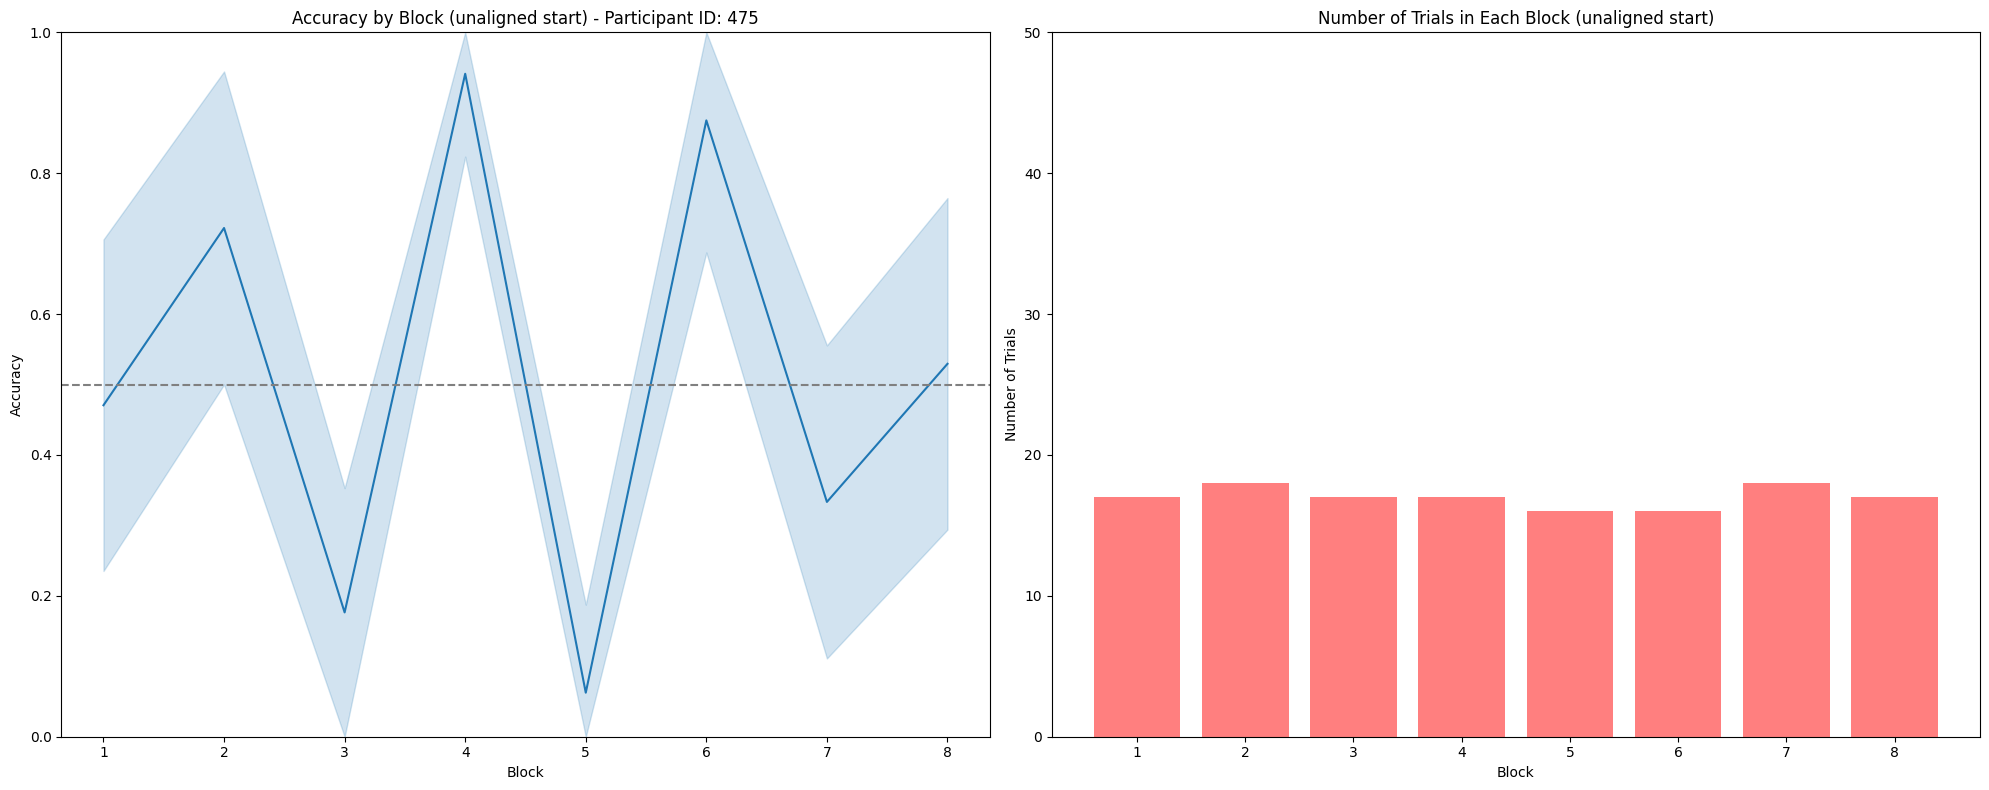

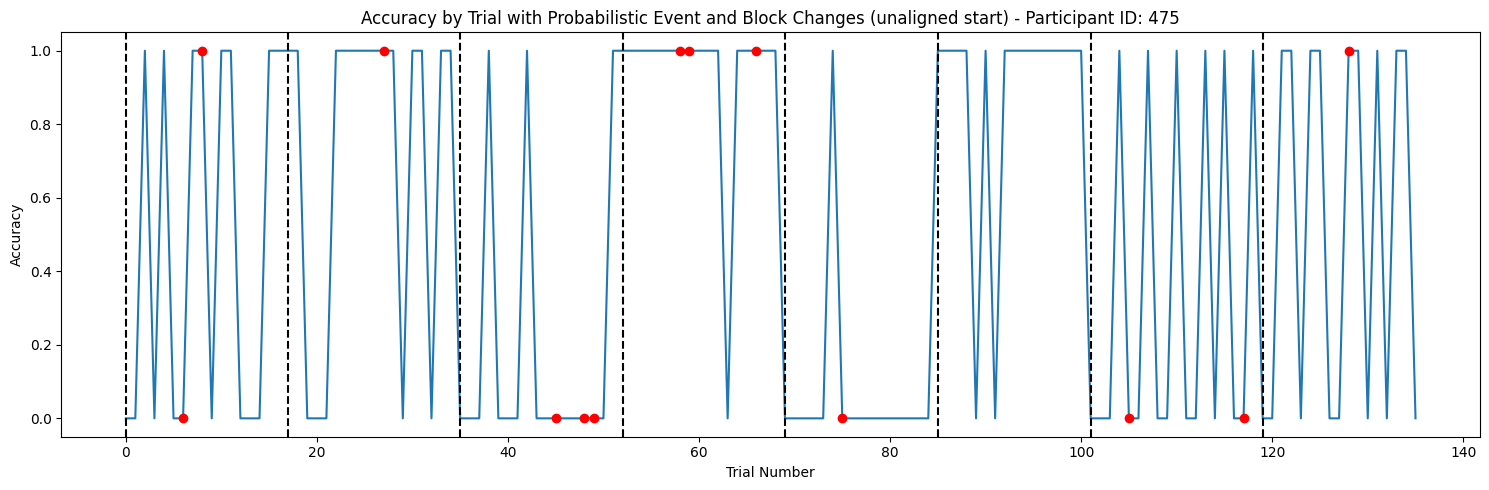

<Figure size 1200x800 with 0 Axes>

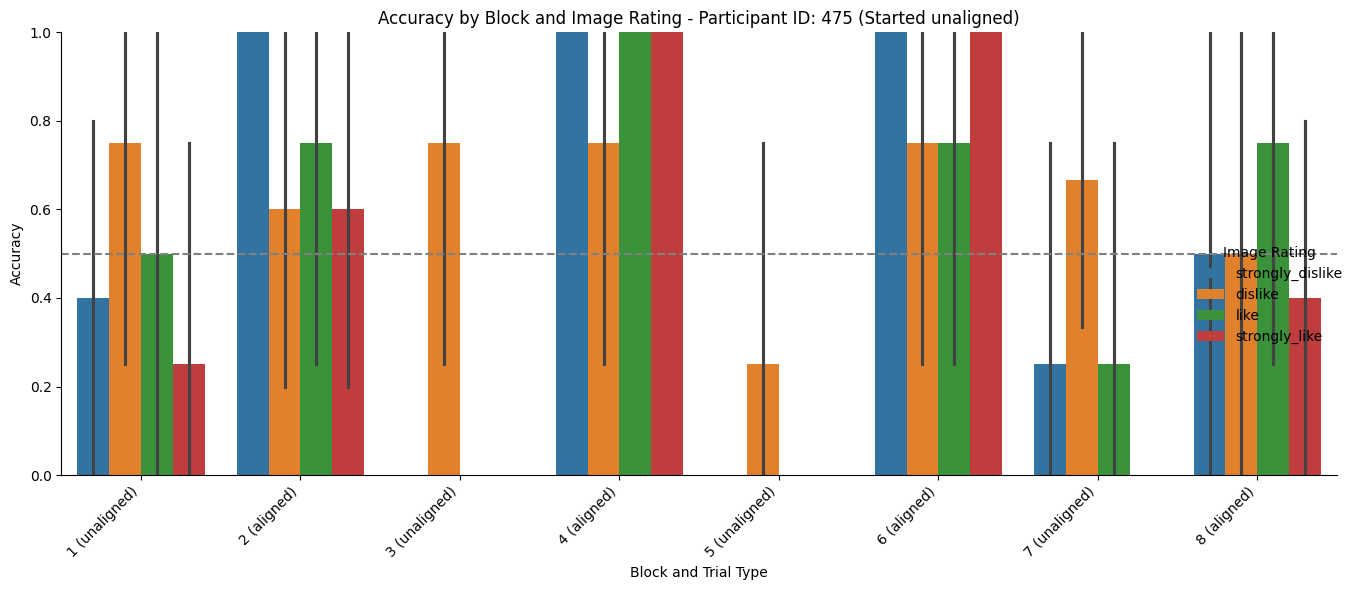

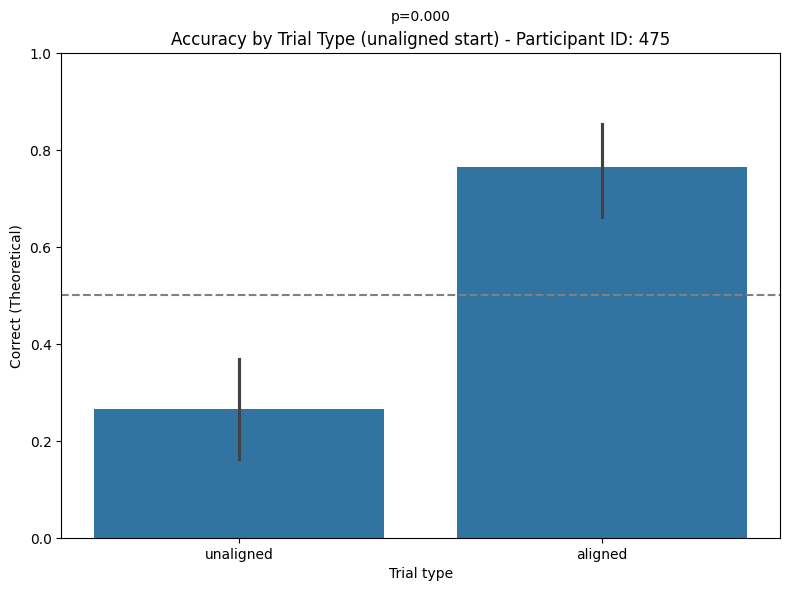

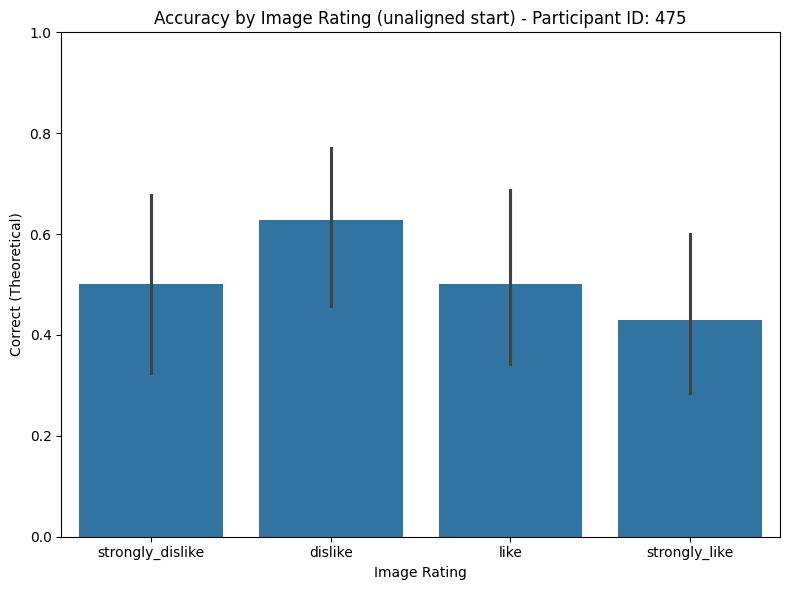

Participant ID: 475
Started with: unaligned
Number of trials in each 'Block':
Block
1    17
2    18
3    17
4    17
5    16
6    16
7    18
8    17
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.470588
2    0.722222
3    0.176471
4    0.941176
5    0.062500
6    0.875000
7    0.333333
8    0.529412
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.764706
unaligned    0.264706
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 5.623758494115071e-10

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.470588
            2        0.722222
            3        0.176471
            4        0.941176
            5        0.062500
            6        0.875000
            7        0.333333
            8        0.529412
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.500000
dislike      

<ipython-input-12-138bad539b13>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


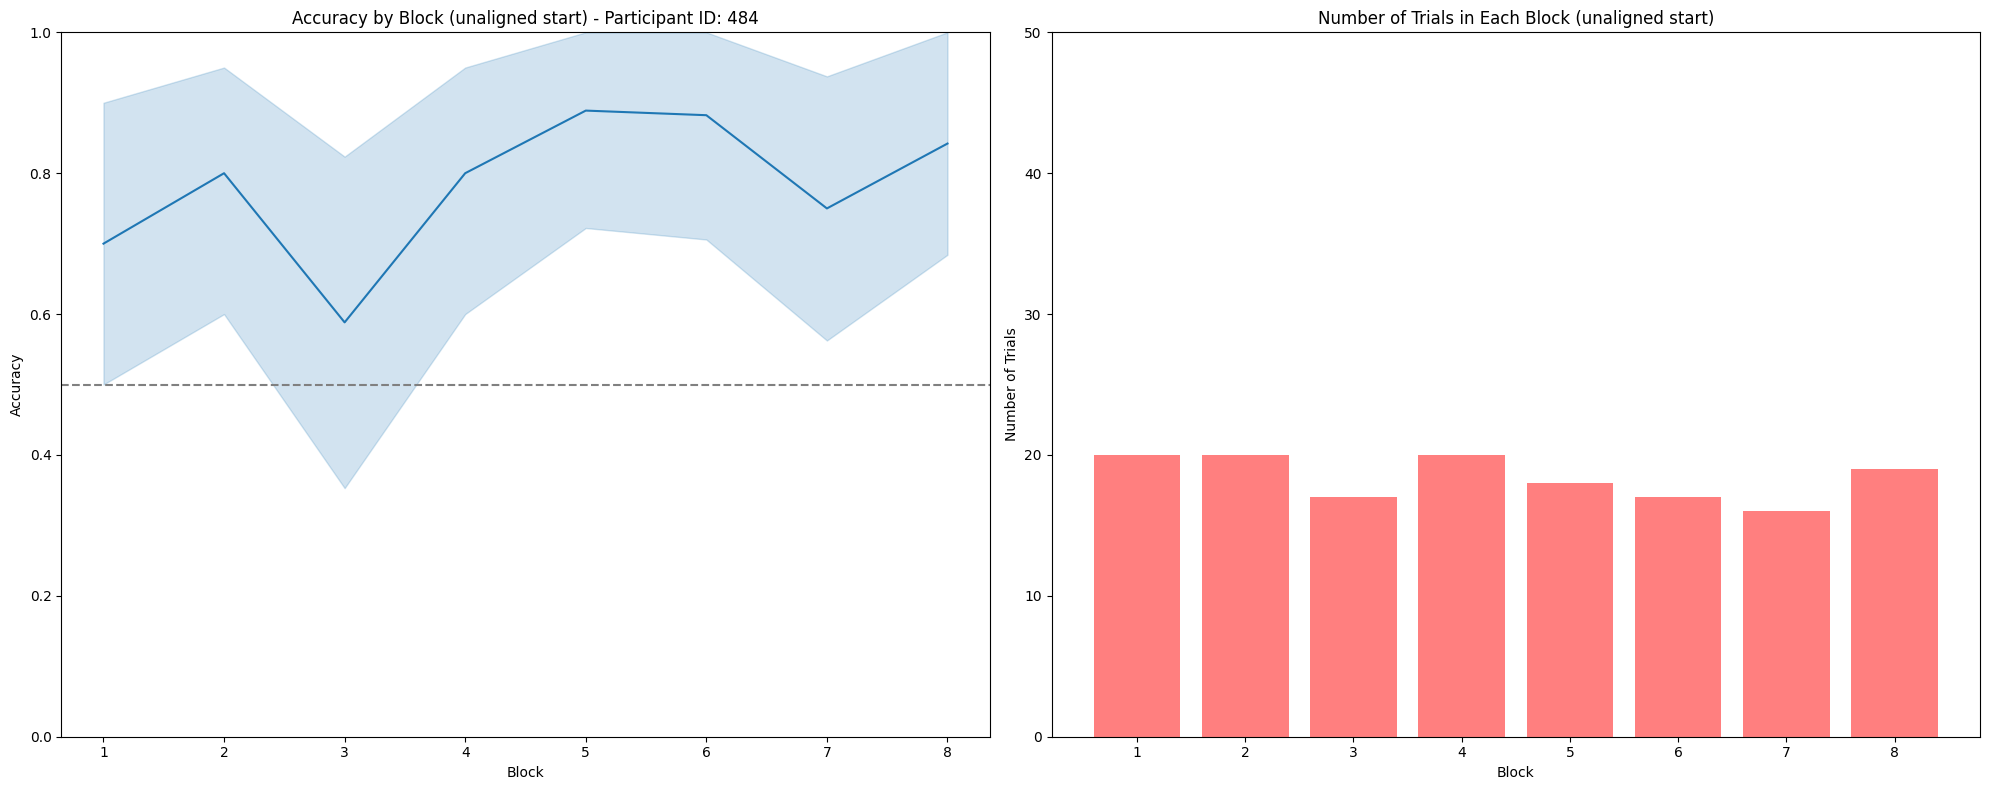

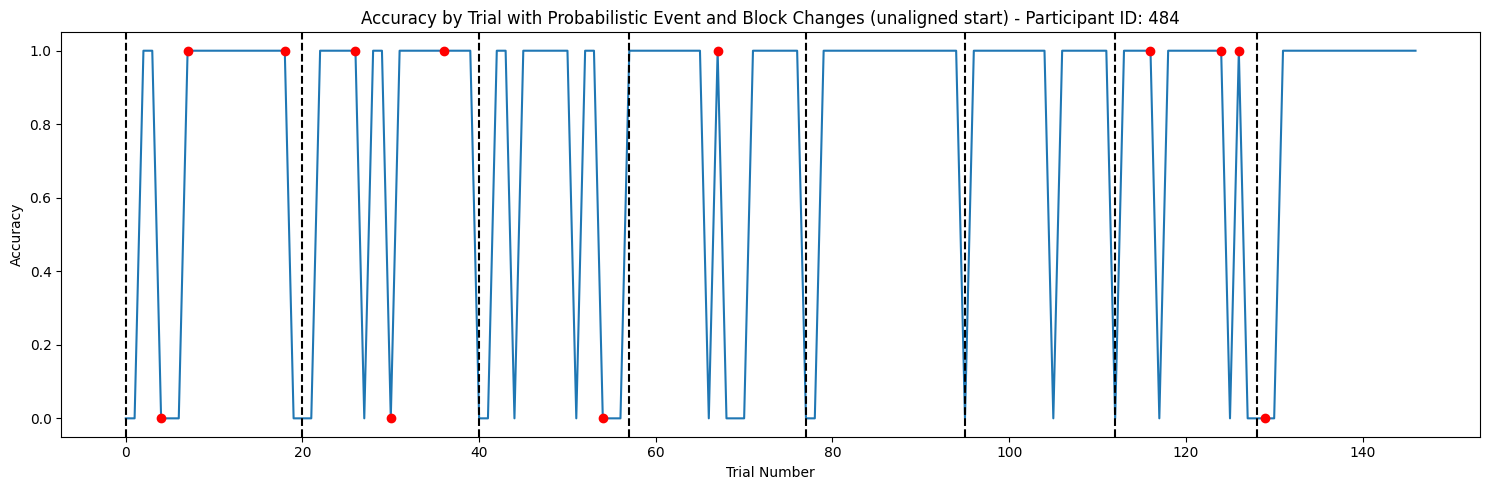

<Figure size 1200x800 with 0 Axes>

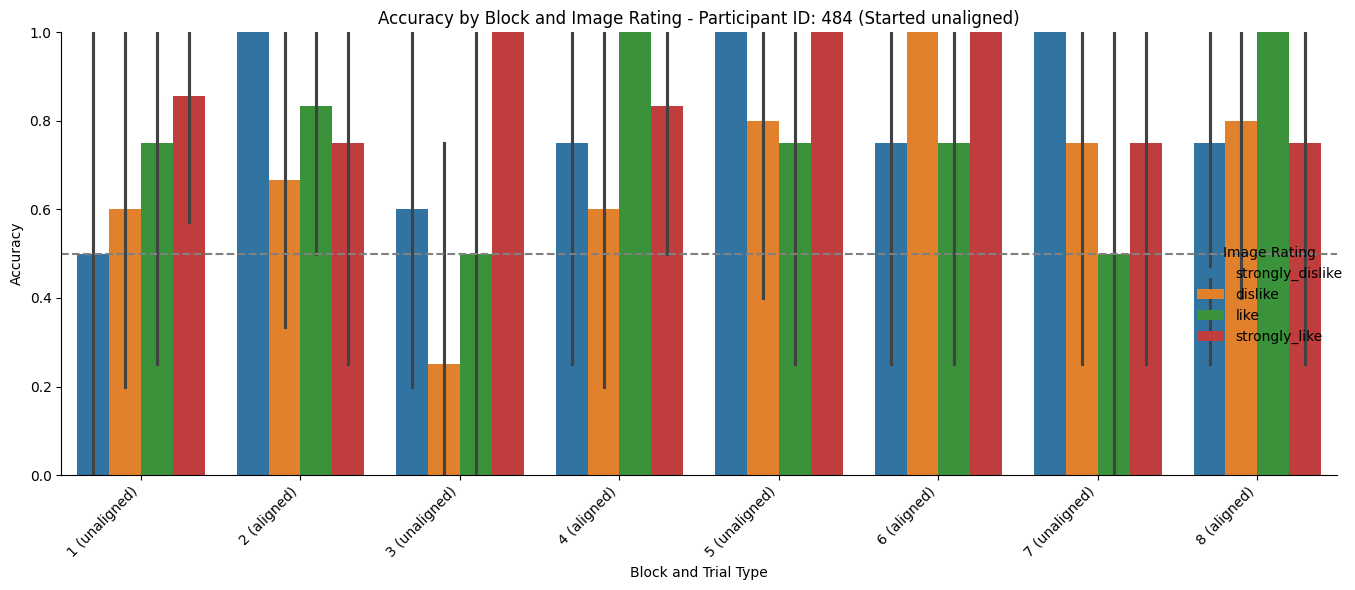

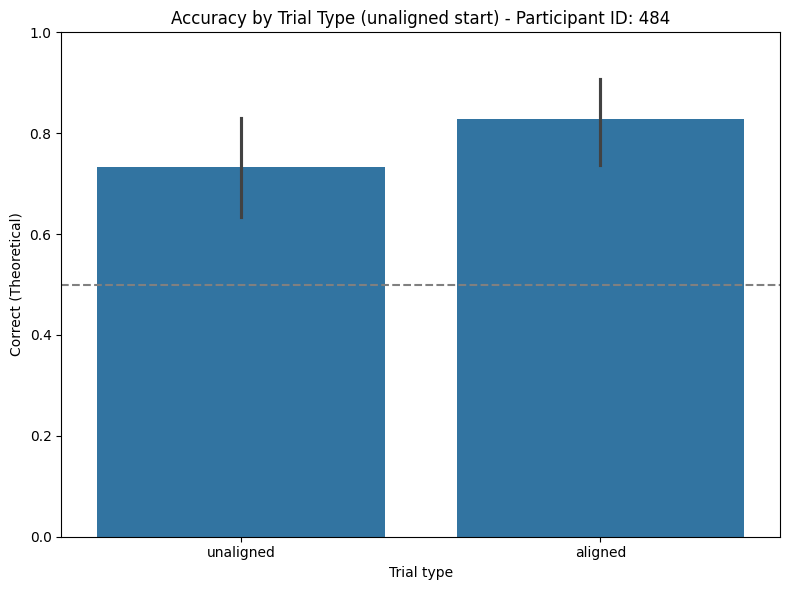

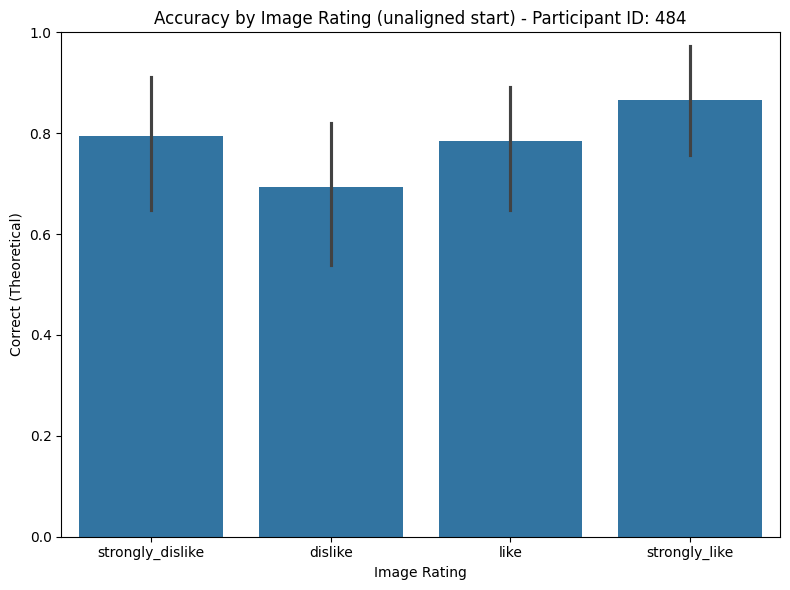

Participant ID: 484
Started with: unaligned
Number of trials in each 'Block':
Block
1    20
2    20
3    17
4    20
5    18
6    17
7    16
8    19
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.700000
2    0.800000
3    0.588235
4    0.800000
5    0.888889
6    0.882353
7    0.750000
8    0.842105
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.828947
unaligned    0.732394
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 0.15845581153505992

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.700000
            2        0.800000
            3        0.588235
            4        0.800000
            5        0.888889
            6        0.882353
            7        0.750000
            8        0.842105
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.794118
dislike        

<ipython-input-12-138bad539b13>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


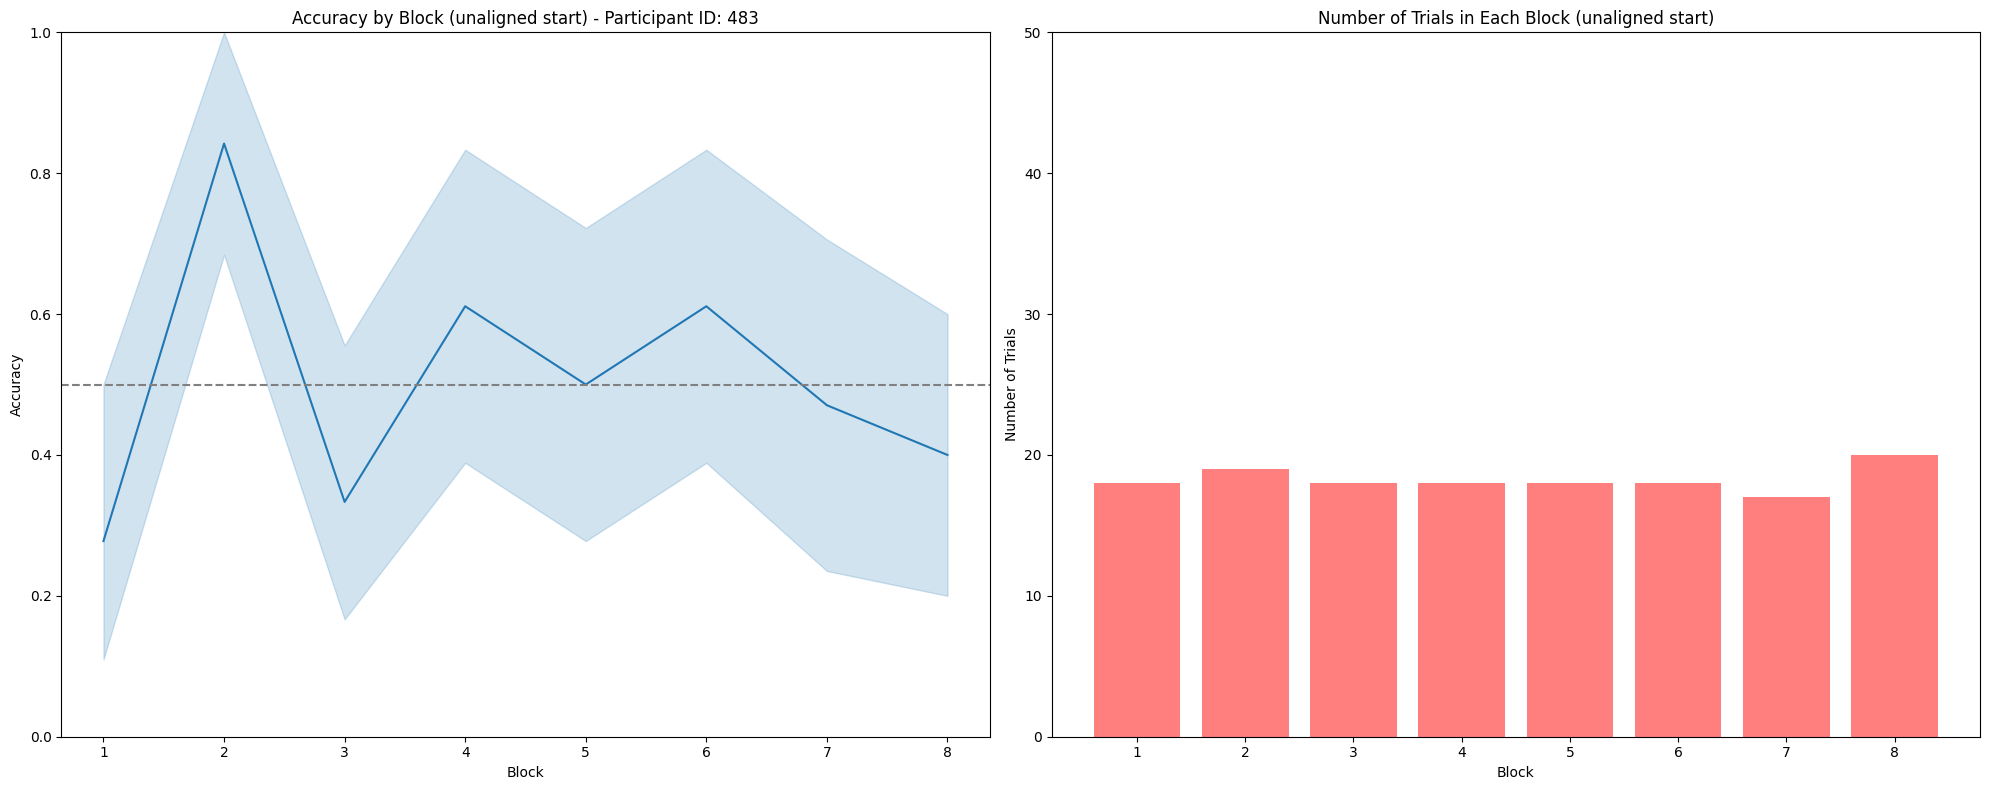

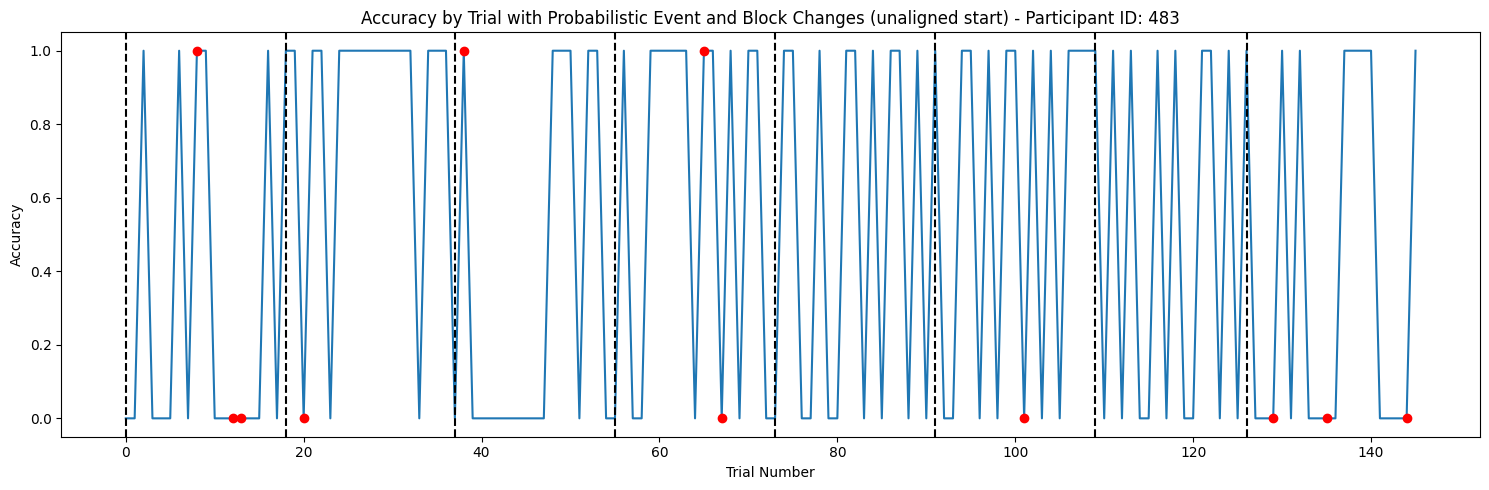

<Figure size 1200x800 with 0 Axes>

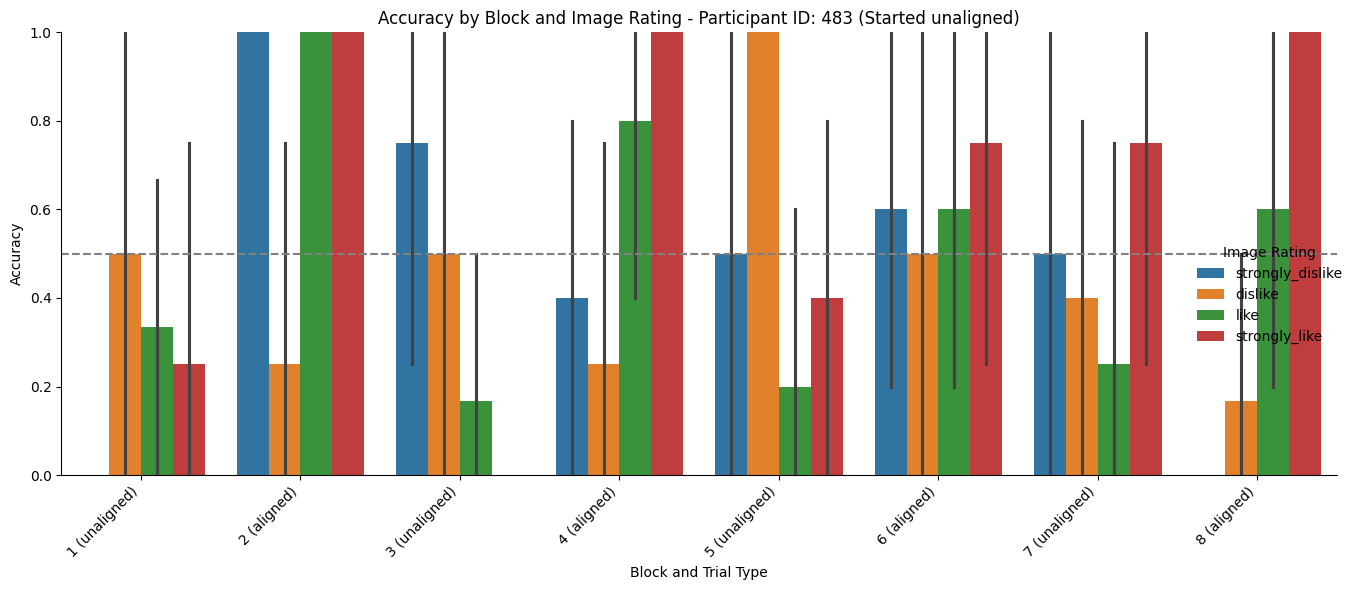

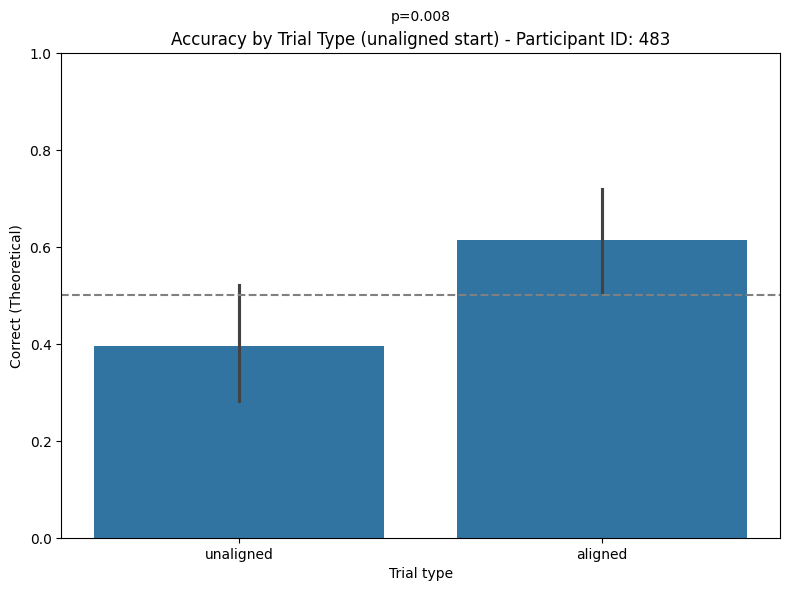

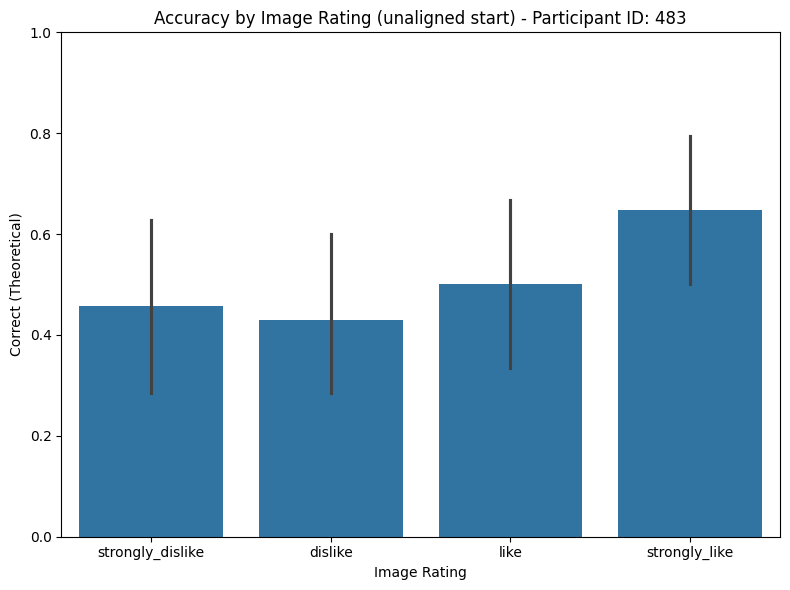

Participant ID: 483
Started with: unaligned
Number of trials in each 'Block':
Block
1    18
2    19
3    18
4    18
5    18
6    18
7    17
8    20
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.277778
2    0.842105
3    0.333333
4    0.611111
5    0.500000
6    0.611111
7    0.470588
8    0.400000
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.613333
unaligned    0.394366
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 0.00794058262674585

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.277778
            2        0.842105
            3        0.333333
            4        0.611111
            5        0.500000
            6        0.611111
            7        0.470588
            8        0.400000
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.457143
dislike        

<ipython-input-12-138bad539b13>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


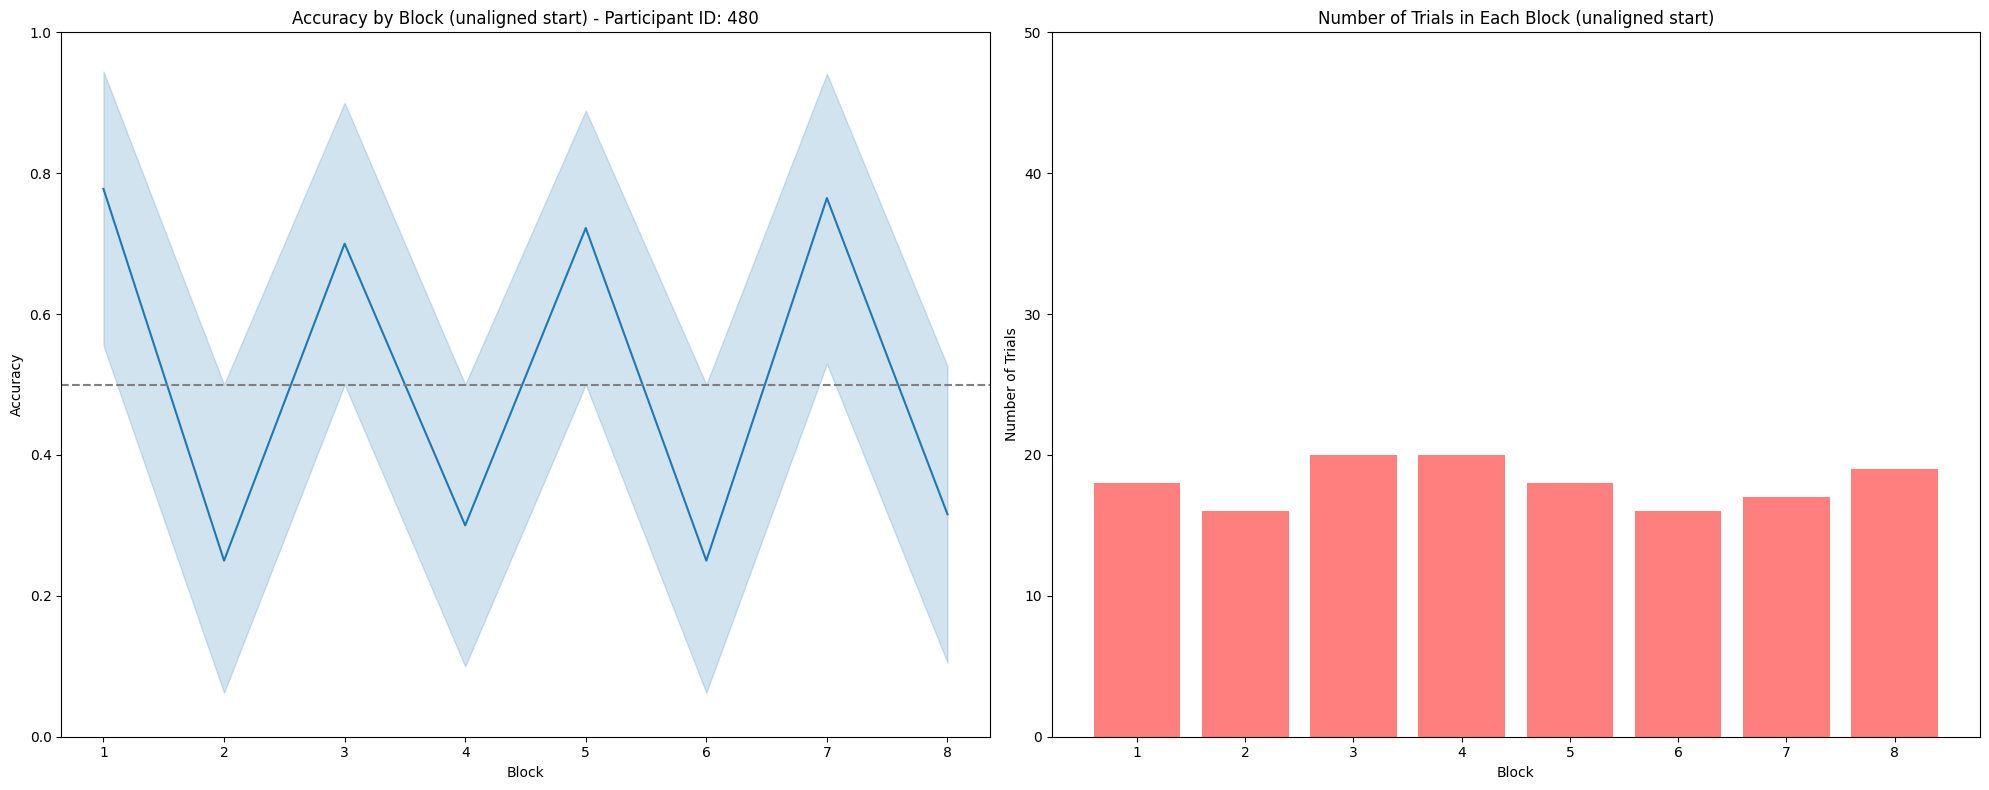

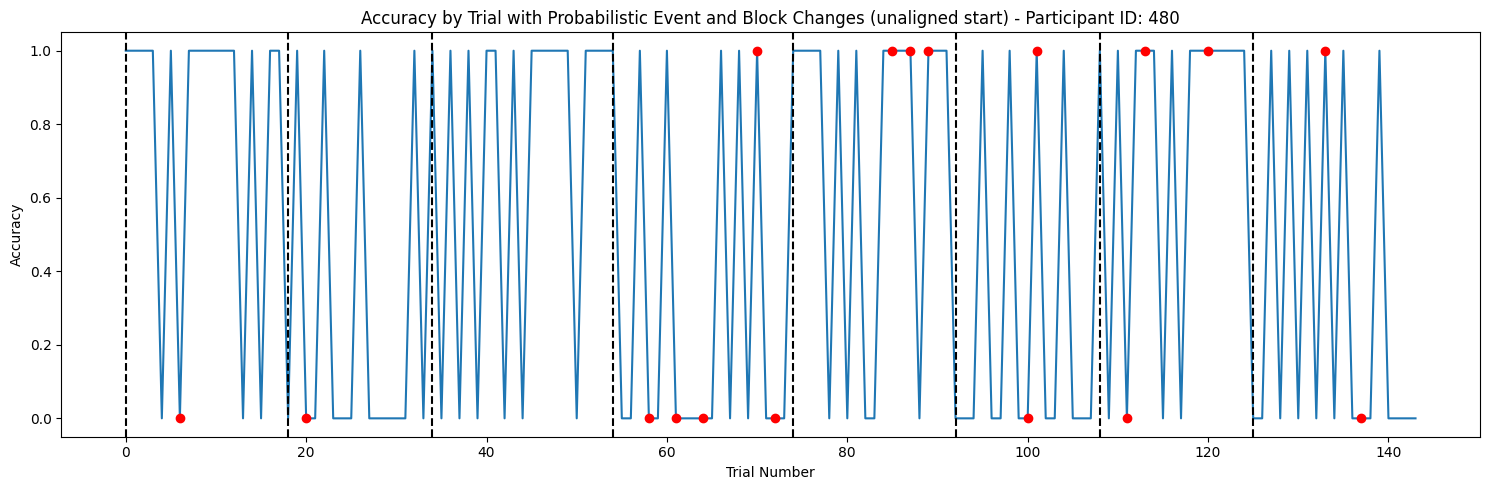

<Figure size 1200x800 with 0 Axes>

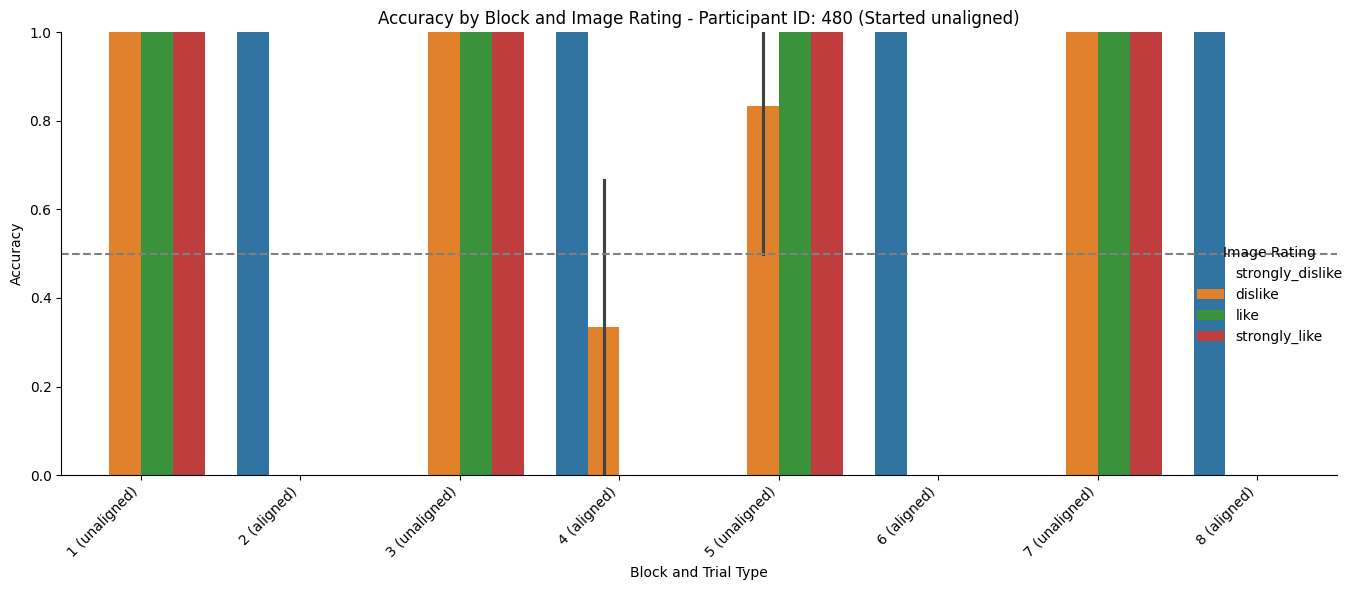

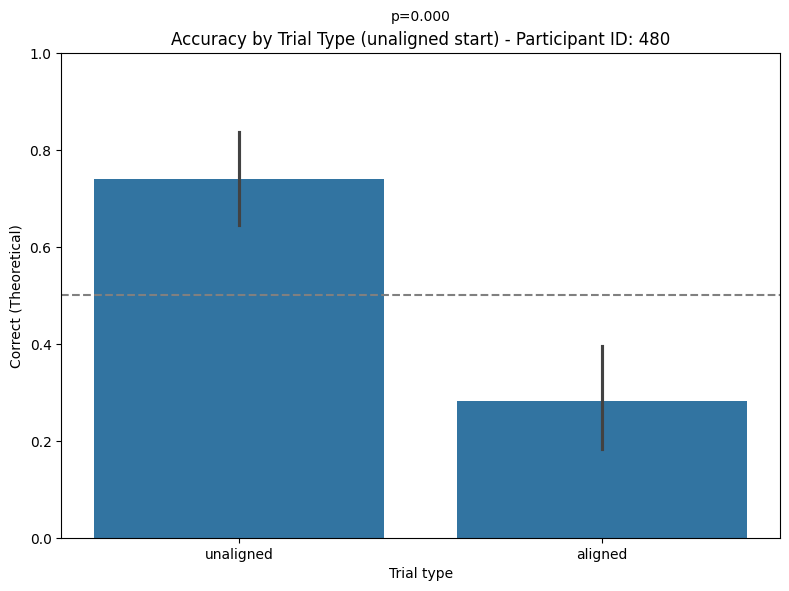

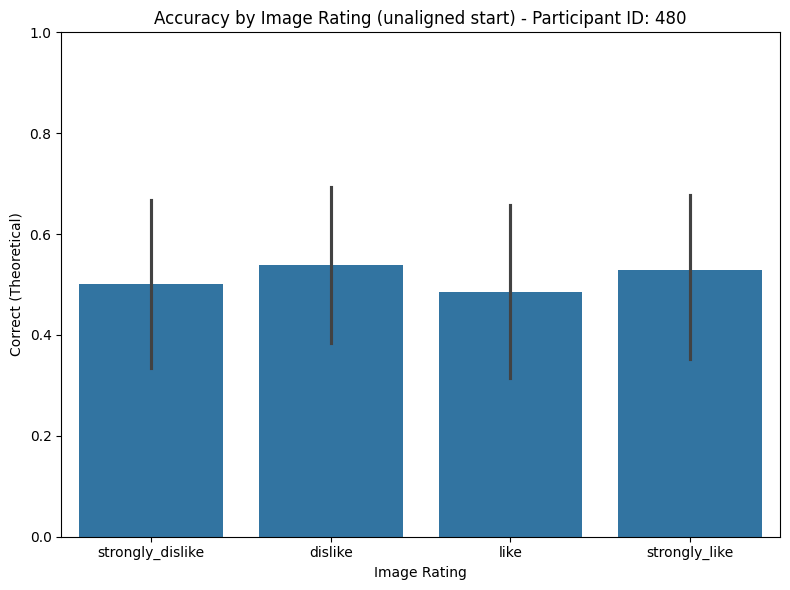

Participant ID: 480
Started with: unaligned
Number of trials in each 'Block':
Block
1    18
2    16
3    20
4    20
5    18
6    16
7    17
8    19
Name: count, dtype: int64

Accuracy in each 'Block':
Block
1    0.777778
2    0.250000
3    0.700000
4    0.300000
5    0.722222
6    0.250000
7    0.764706
8    0.315789
Name: Correct (Theoretical), dtype: float64

Accuracy per 'Trial type' (aligned and unaligned):
Trial type
aligned      0.281690
unaligned    0.739726
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type': 7.727084456910932e-09

Accuracy over the whole task:
All Trials  Block
All Trials  1        0.777778
            2        0.250000
            3        0.700000
            4        0.300000
            5        0.722222
            6        0.250000
            7        0.764706
            8        0.315789
Name: Correct (Theoretical), dtype: float64

Accuracy as a function of 'Image Rating':
Image Rating
strongly_dislike    0.500000
dislike      

<ipython-input-12-138bad539b13>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Image Rating')['Correct (Binary)'].mean())


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# Define the image rating order
rating_order = ['strongly_dislike', 'dislike', 'like', 'strongly_like']

# Iterate over each CSV file in the folder
for file_name in os.listdir(shared_folder_path):
    if file_name.endswith('.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(shared_folder_path, file_name)
        df = pd.read_csv(file_path)

        # Extract participant ID from file name (assuming the file name format is 'participant_id.csv')
        participant_id = file_name.split('.')[0].split('_')[0]

        # Determine the starting trial type (aligned or unaligned)
        starting_trial_type = df['Trial type'].iloc[0]

        # Define blocks based on switches in 'Trial type'
        df['Block'] = (df['Trial type'] != df['Trial type'].shift(1)).cumsum()
        df['Block_Type'] = df['Block'].astype(str) + ' (' + df['Trial type'] + ')'

        # Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
        df['Correct (Binary)'] = df['Correct (Theoretical)'].astype(int)

        # Ensure 'Image Rating' is in the specified order
        df['Image Rating'] = pd.Categorical(df['Image Rating'], categories=rating_order, ordered=True)

        # Number of trials in each 'Block'
        block_counts = df['Block'].value_counts().sort_index()

        # Accuracy in each 'Block'
        block_accuracy = df.groupby('Block')['Correct (Theoretical)'].mean()

        # Accuracy per 'Trial type' (aligned and unaligned)
        trial_type_accuracy = df.groupby('Trial type')['Correct (Theoretical)'].mean()
        ttest_p_value_tt = ttest_ind(df[df['Trial type'] == 'aligned']['Correct (Theoretical)'],
                                   df[df['Trial type'] == 'unaligned']['Correct (Theoretical)'], nan_policy='omit').pvalue

        # Accuracy over the whole task
        df['Block Change'] = df['Block'].ne(df['Block'].shift())
        df['All Trials'] = 'All Trials'
        overall_accuracy = df.groupby(['All Trials', 'Block'])['Correct (Theoretical)'].mean()

        # Create a contingency table for chi-squared test
        contingency_table = pd.crosstab(df['Image Rating'], df['Correct (Binary)'])
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Visualization

        # Plot Accuracy by Block and Number of Trials in each Block
        fig, axs = plt.subplots(1, 2, figsize=(20, 8))

        # Accuracy by Block
        sns.lineplot(x='Block', y='Correct (Theoretical)', data=df, ax=axs[0])
        axs[0].set_ylabel('Accuracy')
        axs[0].axhline(y=0.5, color='gray', linestyle='--')  # Add a dotted line at y=0.5
        axs[0].set_ylim(0, 1)  # Set y-axis limits to 0-1
        axs[0].set_title(f'Accuracy by Block ({starting_trial_type} start) - Participant ID: {participant_id}')

        # Number of Trials in Each Block
        axs[1].bar(block_counts.index, block_counts, color='r', alpha=0.5)
        axs[1].set_ylabel('Number of Trials')
        axs[1].set_xlabel('Block')
        axs[1].set_ylim(0, 50)  # Set y-axis limits to 0-50
        axs[1].set_title(f'Number of Trials in Each Block ({starting_trial_type} start)')

        plt.tight_layout()
        plt.show()

        # Accuracy by Trial with Probabilistic Event and Block Changes
        plt.figure(figsize=(15, 5))
        sns.lineplot(x=df.index, y='Correct (Theoretical)', data=df)
        for i, event in enumerate(df['Probabilistic event']):
            if event:
                plt.plot(i, df.loc[i, 'Correct (Theoretical)'], 'ro')
        for i, change in enumerate(df['Block Change']):
            if change:
                plt.axvline(x=i, linestyle='--', color='k')
        plt.title(f'Accuracy by Trial with Probabilistic Event and Block Changes ({starting_trial_type} start) - Participant ID: {participant_id}')
        plt.ylabel('Accuracy')
        plt.xlabel('Trial Number')
        plt.tight_layout()
        plt.show()

        # Accuracy by Block and Image Rating
        plt.figure(figsize=(12, 8))
        sns.catplot(
            data=df,
            x='Block_Type',
            y='Correct (Binary)',
            hue='Image Rating',
            hue_order=rating_order,
            kind='bar',
            height=6,
            aspect=2,
            legend_out=True
        )
        plt.title(f'Accuracy by Block and Image Rating - Participant ID: {participant_id} (Started {starting_trial_type})')
        plt.axhline(y=0.5, color='gray', linestyle='--', label='Chance Level')
        plt.ylim(0, 1)  # Set y-axis limits to 0-1
        plt.xlabel('Block and Trial Type')
        plt.ylabel('Accuracy')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.tight_layout()
        plt.show()

        # Accuracy by Trial Type
        plt.figure(figsize=(8, 6))
        sns.barplot(x='Trial type', y='Correct (Theoretical)', data=df)
        plt.title(f'Accuracy by Trial Type ({starting_trial_type} start) - Participant ID: {participant_id}')
        if ttest_p_value_tt < 0.05:
            height = max(df.groupby('Trial type')['Correct (Theoretical)'].max()) + 0.05
            plt.plot([0, 1], [height, height], linewidth=1, color='k')
            plt.text(0.5, height + 0.01, f'p={ttest_p_value_tt:.3f}', ha='center', va='bottom')
        plt.ylim(0, 1)
        plt.axhline(y=0.5, color='gray', linestyle='--')
        plt.tight_layout()
        plt.show()

        # Accuracy by Image Rating
        plt.figure(figsize=(8, 6))
        sns.barplot(x='Image Rating', y='Correct (Theoretical)', data=df)
        plt.title(f'Accuracy by Image Rating ({starting_trial_type} start) - Participant ID: {participant_id}')
        if p < 0.05:
            height = max(df.groupby('Image Rating')['Correct (Theoretical)'].max()) + 0.05
            plt.plot(range(len(rating_order)), [height] * len(rating_order), linewidth=1, color='k')
            plt.text(len(rating_order) // 2, height + 0.01, f'p={p:.3f}', ha='center', va='bottom')
        plt.ylim(0, 1)
        plt.tight_layout()
        plt.show()

        # Output results
        print(f"Participant ID: {participant_id}")
        print(f"Started with: {starting_trial_type}")
        print("Number of trials in each 'Block':")
        print(block_counts)
        print("\nAccuracy in each 'Block':")
        print(block_accuracy)
        print("\nAccuracy per 'Trial type' (aligned and unaligned):")
        print(trial_type_accuracy)
        print(f"t-test p-value for 'Trial type': {ttest_p_value_tt}")
        print("\nAccuracy over the whole task:")
        print(overall_accuracy)
        print("\nAccuracy as a function of 'Image Rating':")
        print(df.groupby('Image Rating')['Correct (Binary)'].mean())
        print(f"Chi-squared p-value for 'Image Rating': {p:.15f}")
        print("Data for Chi-squared test:")
        print(contingency_table)


# Across participants


## Average number of trials per block (separated by U & A starts) and average accuracy time course (separated by U & A start)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

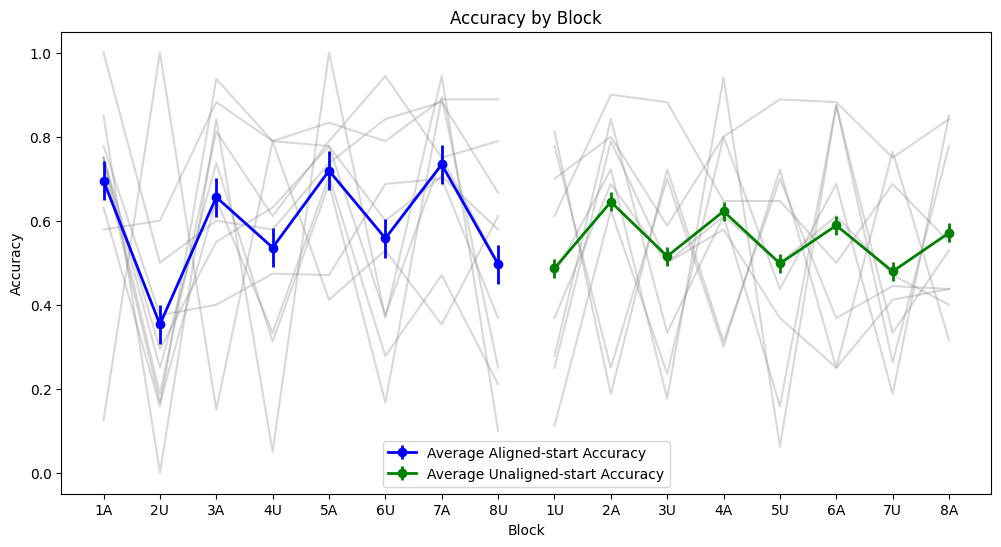

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# Initialize empty lists to store aggregated data
all_block_counts = []
all_block_accuracy = []
all_trial_type_accuracy = []
all_ttest_p_values_tt = []
all_overall_accuracy = []
all_image_rating_data = []
all_chi2_p_values = []

# Iterate over each CSV file in the folder
for file_name in os.listdir(shared_folder_path):
    if file_name.endswith('.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(shared_folder_path, file_name)
        df = pd.read_csv(file_path)

        # Define blocks based on switches in 'Trial type'
        df['Block Number'] = (df['Trial type'] != df['Trial type'].shift(1)).cumsum()
        df['Block'] = df['Block Number'].astype(str) + df['Trial type'].apply(lambda x: 'A' if x == 'aligned' else 'U')

        # Number of trials in each 'Block'
        block_counts = df['Block'].value_counts()

        # Accuracy in each 'Block'
        block_accuracy = df.groupby('Block')['Correct (Theoretical)'].mean()

        # Accuracy per 'Trial type' (aligned and unaligned)
        trial_type_accuracy = df.groupby('Trial type')['Correct (Theoretical)'].mean()
        ttest_p_value_tt = ttest_ind(df[df['Trial type'] == 'aligned']['Correct (Theoretical)'],
                                     df[df['Trial type'] == 'unaligned']['Correct (Theoretical)'], nan_policy='omit').pvalue

        # Accuracy over the whole task
        overall_accuracy = df.groupby('Block')['Correct (Theoretical)'].mean()

        # Accuracy as a function of 'Image Rating'
        # Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
        df['Correct (Binary)'] = df['Correct (Theoretical)'].astype(int)

        # Create a contingency table
        contingency_table = pd.crosstab(df['Image Rating'], df['Correct (Binary)'])

        # Perform chi-squared test
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Append data to lists
        all_block_counts.append(block_counts)
        all_block_accuracy.append(block_accuracy)
        all_trial_type_accuracy.append(trial_type_accuracy)
        all_ttest_p_values_tt.append(ttest_p_value_tt)
        all_overall_accuracy.append(overall_accuracy)
        all_image_rating_data.append(df.groupby('Image Rating')['Correct (Theoretical)'].mean())
        all_chi2_p_values.append(p)

# Plotting across participants

# Accuracy by Block with Error 'Cloud' for Average Accuracy for Aligned and Unaligned Starts
plt.figure(figsize=(12, 6))

# Separate data for 'Aligned' and 'Unaligned' starts
aligned_data = [block_accuracy for block_accuracy in all_block_accuracy if 'A' in block_accuracy.index[0]]
unaligned_data = [block_accuracy for block_accuracy in all_block_accuracy if 'U' in block_accuracy.index[0]]

# Plot individual accuracies (faint grey lines) and average lines with error 'cloud'
for block_accuracy in aligned_data:
    plt.plot(block_accuracy.index, block_accuracy, color='grey', alpha=0.3)  # Faint grey lines for individual accuracies
avg_aligned_accuracy = pd.concat(aligned_data, axis=1).mean(axis=1)
plt.errorbar(avg_aligned_accuracy.index, avg_aligned_accuracy, yerr=avg_aligned_accuracy.sem(), fmt='-o', color='blue', lw=2, label='Average Aligned-start Accuracy')

for block_accuracy in unaligned_data:
    plt.plot(block_accuracy.index, block_accuracy, color='grey', alpha=0.3)  # Faint grey lines for individual accuracies
avg_unaligned_accuracy = pd.concat(unaligned_data, axis=1).mean(axis=1)
plt.errorbar(avg_unaligned_accuracy.index, avg_unaligned_accuracy, yerr=avg_unaligned_accuracy.sem(), fmt='-o', color='green', lw=2, label='Average Unaligned-start Accuracy')

plt.xlabel('Block')
plt.ylabel('Accuracy')
plt.title('Accuracy by Block')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

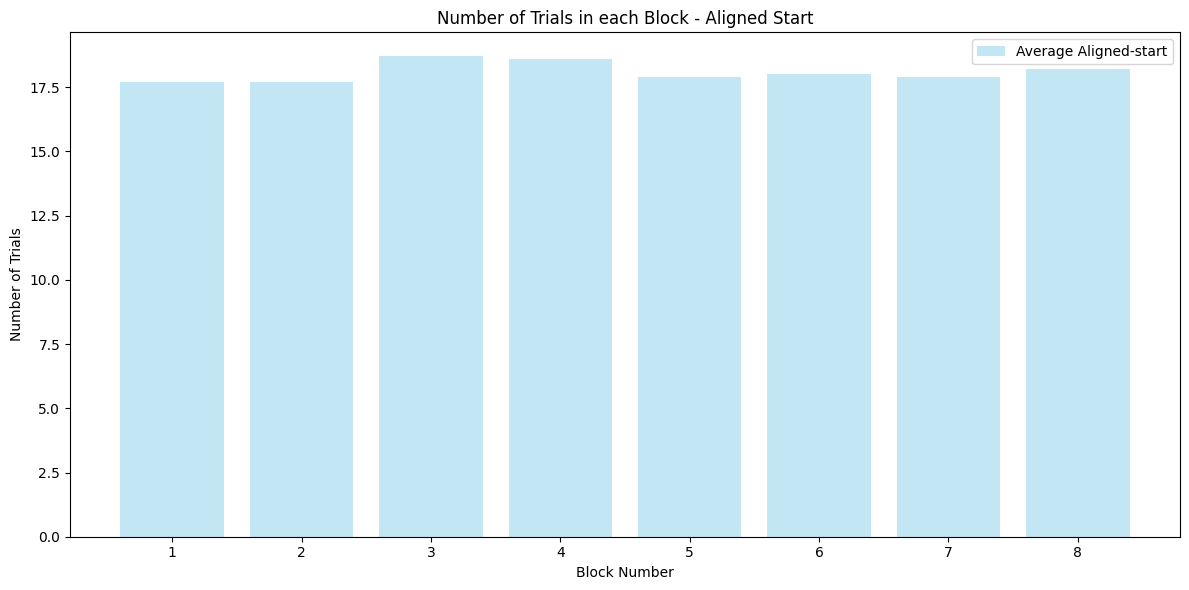

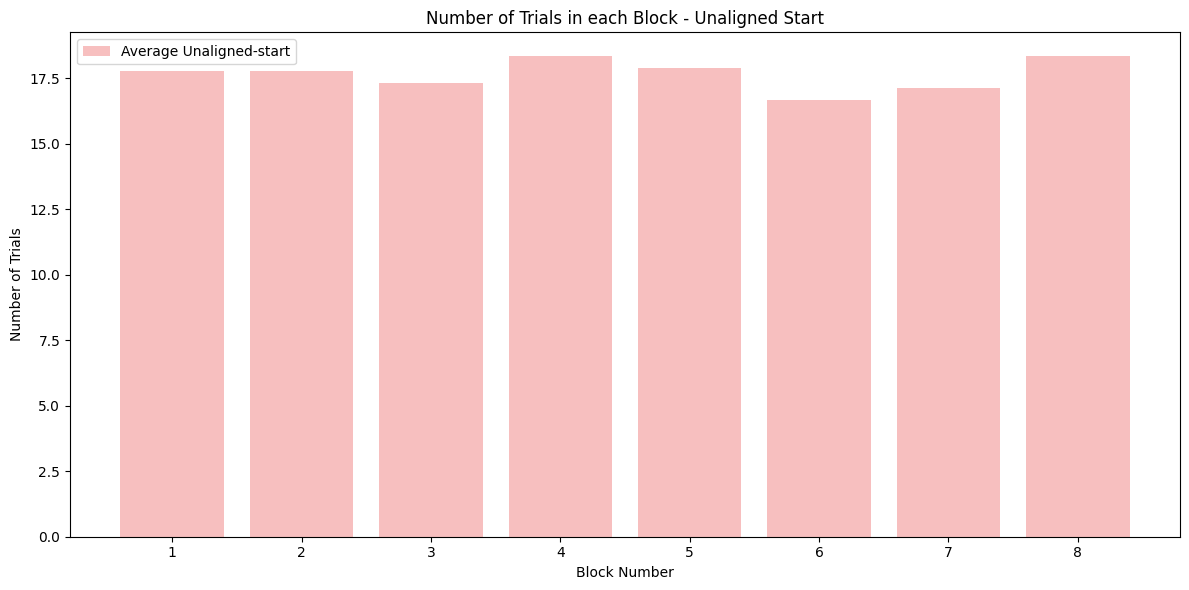

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Initialize empty lists to store aggregated data
aligned_block_counts = []
unaligned_block_counts = []

# Iterate over each CSV file in the folder
for file_name in os.listdir(shared_folder_path):
    if file_name.endswith('.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(shared_folder_path, file_name)
        df = pd.read_csv(file_path)

        # Define blocks based on switches in 'Trial type'
        df['Block Number'] = (df['Trial type'] != df['Trial type'].shift(1)).cumsum()

        # Number of trials in each Block
        block_counts = df['Block Number'].value_counts().sort_index()

        # Separate out aligned and unaligned starts
        if df['Trial type'].iloc[0] == 'aligned':
            aligned_block_counts.append(block_counts)
        else:
            unaligned_block_counts.append(block_counts)

# Calculate the average number of trials in each block across participants for aligned starts
aligned_block_counts_df = pd.concat(aligned_block_counts, axis=1)
avg_aligned_block_counts = aligned_block_counts_df.mean(axis=1)

# Calculate the average number of trials in each block across participants for unaligned starts
unaligned_block_counts_df = pd.concat(unaligned_block_counts, axis=1)
avg_unaligned_block_counts = unaligned_block_counts_df.mean(axis=1)

# Plotting the number of trials in each Block, separated by Unaligned and Aligned starts

# Plot for aligned starts
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(avg_aligned_block_counts) + 1), avg_aligned_block_counts, color='skyblue', alpha=0.5, label='Average Aligned-start')

plt.xlabel('Block Number')
plt.ylabel('Number of Trials')
plt.xticks(range(1, len(avg_aligned_block_counts) + 1), range(1, len(avg_aligned_block_counts) + 1))
plt.title('Number of Trials in each Block - Aligned Start')
plt.legend()
plt.tight_layout()
plt.show()

# Plot for unaligned starts
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(avg_unaligned_block_counts) + 1), avg_unaligned_block_counts, color='lightcoral', alpha=0.5, label='Average Unaligned-start')

plt.xlabel('Block Number')
plt.ylabel('Number of Trials')
plt.xticks(range(1, len(avg_unaligned_block_counts) + 1), range(1, len(avg_unaligned_block_counts) + 1))
plt.title('Number of Trials in each Block - Unaligned Start')
plt.legend()
plt.tight_layout()
plt.show()


## Average accuracy within a block (by block type)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Columns in the DataFrame: Index(['Unnamed: 0', 'Image', 'Image Rating', 'Expectation', 'Outcome',
       'Response Time', 'Jitter 1', 'Jitter 2', 'Correct',
       'Correct (Theoretical)', 'Probabilistic event', 'Trial type',
       'Participant ID', 'Block', 'Trial Number'],
      dtype='object')


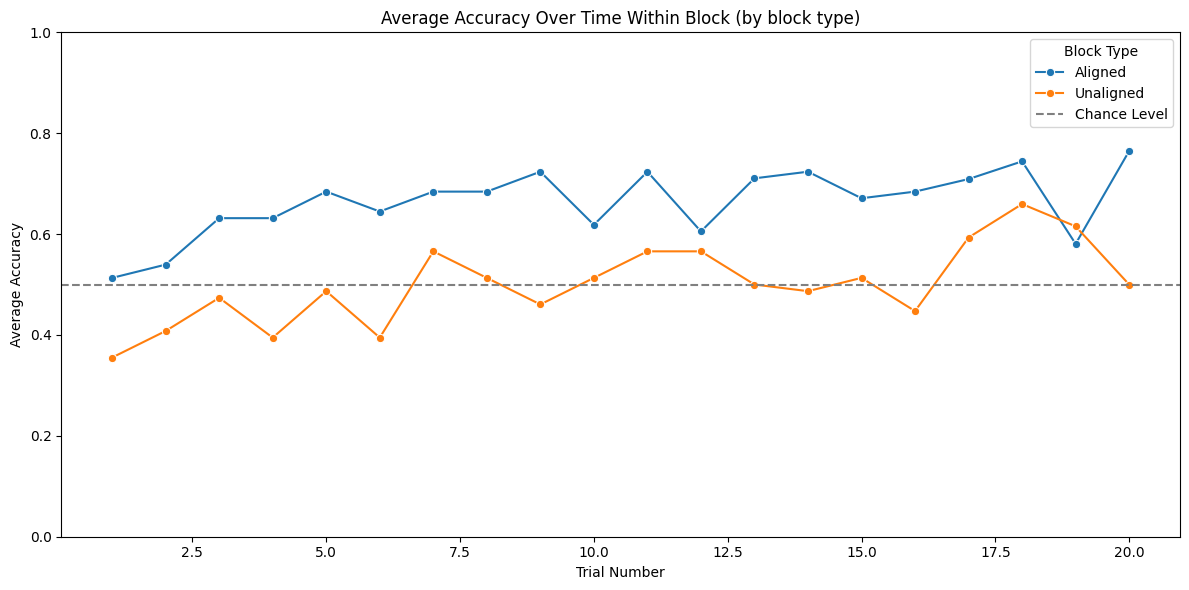

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize an empty list to store DataFrames
all_data = []

# Iterate over each CSV file in the folder
for file_name in os.listdir(shared_folder_path):
    if file_name.endswith('.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(shared_folder_path, file_name)
        df = pd.read_csv(file_path)

        # Extract participant ID from file name (assuming the file name format is 'participant_id.csv')
        participant_id = file_name.split('.')[0].split('_')[0]

        # Add participant ID to DataFrame
        df['Participant ID'] = participant_id

        # Define blocks based on switches in 'Trial type'
        df['Block'] = (df['Trial type'] != df['Trial type'].shift(1)).cumsum()

        # Add cumulative trial number within each block
        df['Trial Number'] = df.groupby('Block').cumcount() + 1

        # Append the DataFrame to the list
        all_data.append(df)

# Concatenate all DataFrames into a single DataFrame
all_data_df = pd.concat(all_data, ignore_index=True)

# Check columns for sanity
print("Columns in the DataFrame:", all_data_df.columns)

# Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
all_data_df['Correct (Binary)'] = all_data_df['Correct (Theoretical)'].astype(int)

# Convert 'Block' to string and create a column to represent the type of block (Aligned/Unaligned)
all_data_df['Block'] = all_data_df['Block'].astype(str)
all_data_df['Block Type'] = all_data_df['Trial type'].apply(lambda x: 'Aligned' if x == 'aligned' else 'Unaligned')

# Calculate overall average accuracy per trial across all participants
overall_avg = all_data_df.groupby(['Block Type', 'Trial Number'])['Correct (Theoretical)'].mean().reset_index()

# Plot overall average accuracy per trial
plt.figure(figsize=(12, 6))
sns.lineplot(x='Trial Number', y='Correct (Theoretical)', hue='Block Type', data=overall_avg, marker='o')
plt.title('Average Accuracy Over Time Within Block (by block type)')
plt.ylim(0, 1)
plt.axhline(0.5, linestyle='--', color='grey', label='Chance Level')
plt.xlabel('Trial Number')
plt.ylabel('Average Accuracy')
plt.legend(title='Block Type')
plt.tight_layout()
plt.show()


## Bar plots: Accuracy by trial type and by stimulus valence
First overall
Second by Unaligned and Aligned start

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Accuracy per 'Trial type' (aligned and unaligned) (average across participants):
Trial type
aligned      0.659325
unaligned    0.491888
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type' (average across participants): 6.02858644085035e-19

Accuracy as a function of 'Image Rating' (average across participants):
Image Rating
dislike             0.572901
like                0.552395
strongly_dislike    0.584058
strongly_like       0.593245
Name: Correct (Binary), dtype: float64
Chi-squared p-value for 'Image Rating' (average across participants): 0.464082693070065
Data for Chi-squared test (average across participants):
Correct (Binary)    0    1
Image Rating              
dislike           290  389
like              299  369
strongly_dislike  287  403
strongly_like     277  404


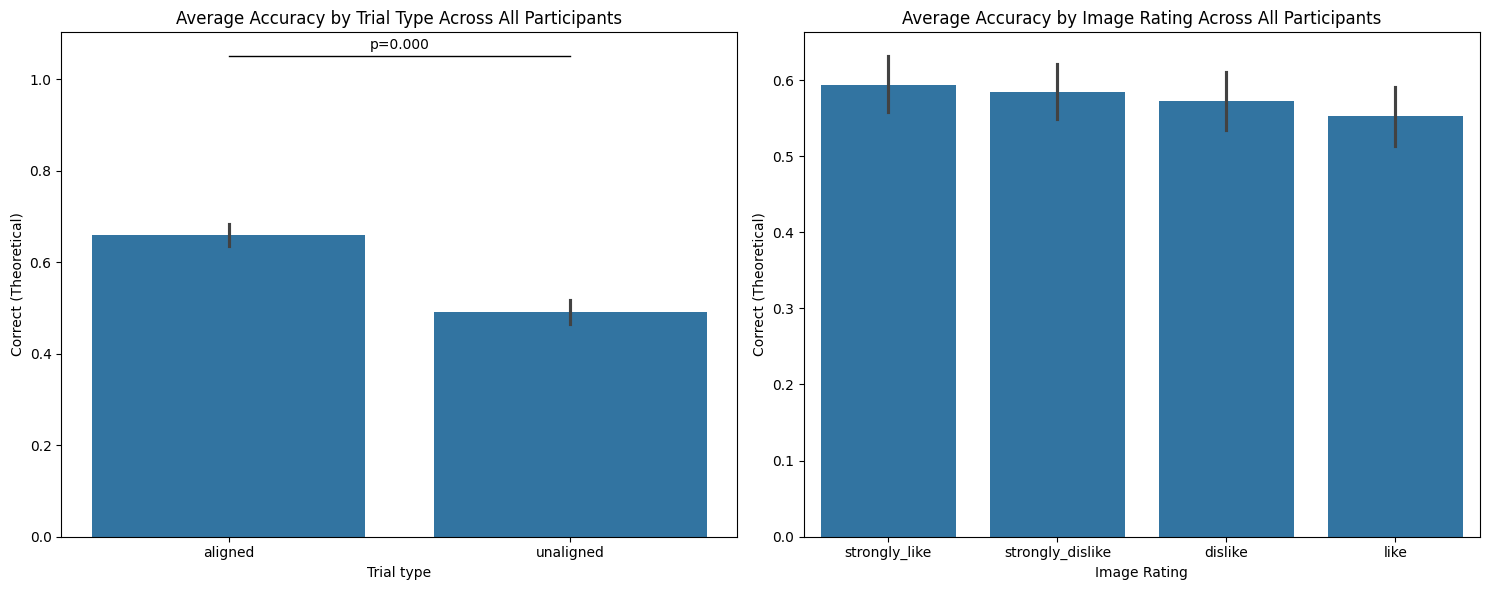

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency


# Initialize lists to store data from each participant
all_data = []

# Iterate over each CSV file in the folder
for file_name in os.listdir(shared_folder_path):
    if file_name.endswith('.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(shared_folder_path, file_name)
        df = pd.read_csv(file_path)

        # Extract participant ID from file name (assuming the file name format is 'participant_id.csv')
        participant_id = file_name.split('.')[0].split('_')[0]

        # Add participant ID to DataFrame
        df['Participant ID'] = participant_id

        # Append the DataFrame to the list
        all_data.append(df)

# Concatenate all DataFrames into a single DataFrame
all_data_df = pd.concat(all_data, ignore_index=True)

# Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
all_data_df['Correct (Binary)'] = all_data_df['Correct (Theoretical)'].astype(int)


# Accuracy per 'Trial type' (aligned and unaligned)
trial_type_accuracy_all = all_data_df.groupby('Trial type')['Correct (Theoretical)'].mean()
ttest_p_value_tt_all = ttest_ind(
    all_data_df[all_data_df['Trial type'] == 'aligned']['Correct (Theoretical)'],
    all_data_df[all_data_df['Trial type'] == 'unaligned']['Correct (Theoretical)'],
    nan_policy='omit'
).pvalue


# Accuracy as a function of 'Image Rating'
# Create a contingency table
contingency_table_all = pd.crosstab(all_data_df['Image Rating'], all_data_df['Correct (Binary)'])

# Perform chi-squared test
chi2_all, p_all, _, _ = chi2_contingency(contingency_table_all)

# Output results

print("\nAccuracy per 'Trial type' (aligned and unaligned) (average across participants):")
print(trial_type_accuracy_all)
print(f"t-test p-value for 'Trial type' (average across participants): {ttest_p_value_tt_all}")

print("\nAccuracy as a function of 'Image Rating' (average across participants):")
print(all_data_df.groupby('Image Rating')['Correct (Binary)'].mean())
print(f"Chi-squared p-value for 'Image Rating' (average across participants): {p_all:.15f}")
print("Data for Chi-squared test (average across participants):")
print(contingency_table_all)

# Visualization

# Accuracy by Trial Type and Image Rating
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy by Trial Type
sns.barplot(x='Trial type', y='Correct (Theoretical)', data=all_data_df, ax=axs[0])
axs[0].set_title('Average Accuracy by Trial Type Across All Participants')
if ttest_p_value_tt_all < 0.05:
    height = max(all_data_df.groupby('Trial type')['Correct (Theoretical)'].max()) + 0.05
    axs[0].plot([0, 1], [height, height], linewidth=1, color='k')
    axs[0].text(0.5, height + 0.01, f'p={ttest_p_value_tt_all:.3f}', ha='center', va='bottom')

# Accuracy by Image Rating
sns.barplot(x='Image Rating', y='Correct (Theoretical)', data=all_data_df, ax=axs[1])
axs[1].set_title('Average Accuracy by Image Rating Across All Participants')
if p_all < 0.05:
    height = max(all_data_df.groupby('Image Rating')['Correct (Theoretical)'].max()) + 0.05
    axs[1].plot([0, 1, 2, 3], [height, height, height, height], linewidth=1, color='k')
    axs[1].text(1.5, height + 0.01, f'p={p_all:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Accuracy per 'Trial type' (aligned and unaligned) (average across participants) - Aligned Start:
Trial type
aligned      0.700831
unaligned    0.488276
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type' (average across participants) - Aligned Start: 8.42694320382857e-17

Accuracy as a function of 'Image Rating' (average across participants) - Aligned Start:
Image Rating
dislike             0.581717
like                0.565714
strongly_dislike    0.631436
strongly_like       0.596730
Name: Correct (Binary), dtype: float64
Chi-squared p-value for 'Image Rating' (average across participants) - Aligned Start: 0.315234193299537
Data for Chi-squared test (average across participants) - Aligned Start:
Correct (Binary)    0    1
Image Rating              
dislike           151  210
like              152  198
strongly_dislike  136  233
strongly_like     148  219


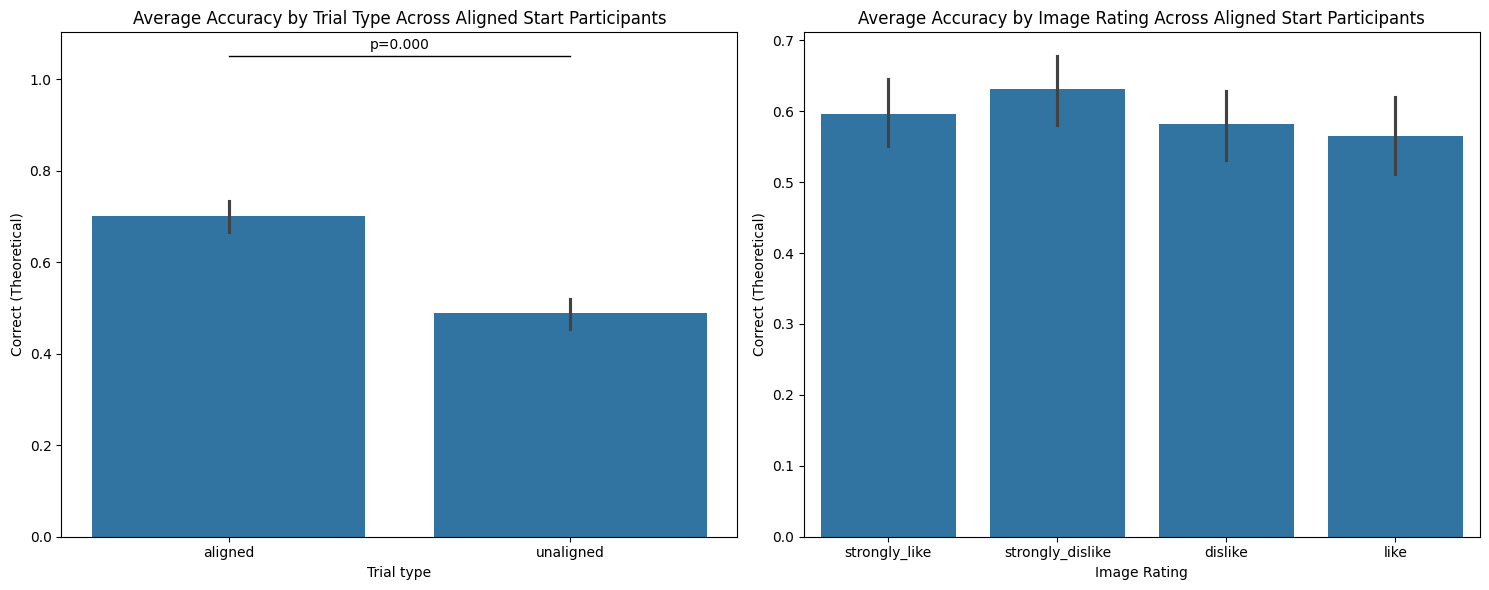


Accuracy per 'Trial type' (aligned and unaligned) (average across participants) - Unaligned Start:
Trial type
aligned      0.612500
unaligned    0.496038
Name: Correct (Theoretical), dtype: float64
t-test p-value for 'Trial type' (average across participants) - Unaligned Start: 2.8233750366113648e-05

Accuracy as a function of 'Image Rating' (average across participants) - Unaligned Start:
Image Rating
dislike             0.562893
like                0.537736
strongly_dislike    0.529595
strongly_like       0.589172
Name: Correct (Binary), dtype: float64
Chi-squared p-value for 'Image Rating' (average across participants) - Unaligned Start: 0.425718727176354
Data for Chi-squared test (average across participants) - Unaligned Start:
Correct (Binary)    0    1
Image Rating              
dislike           139  179
like              147  171
strongly_dislike  151  170
strongly_like     129  185


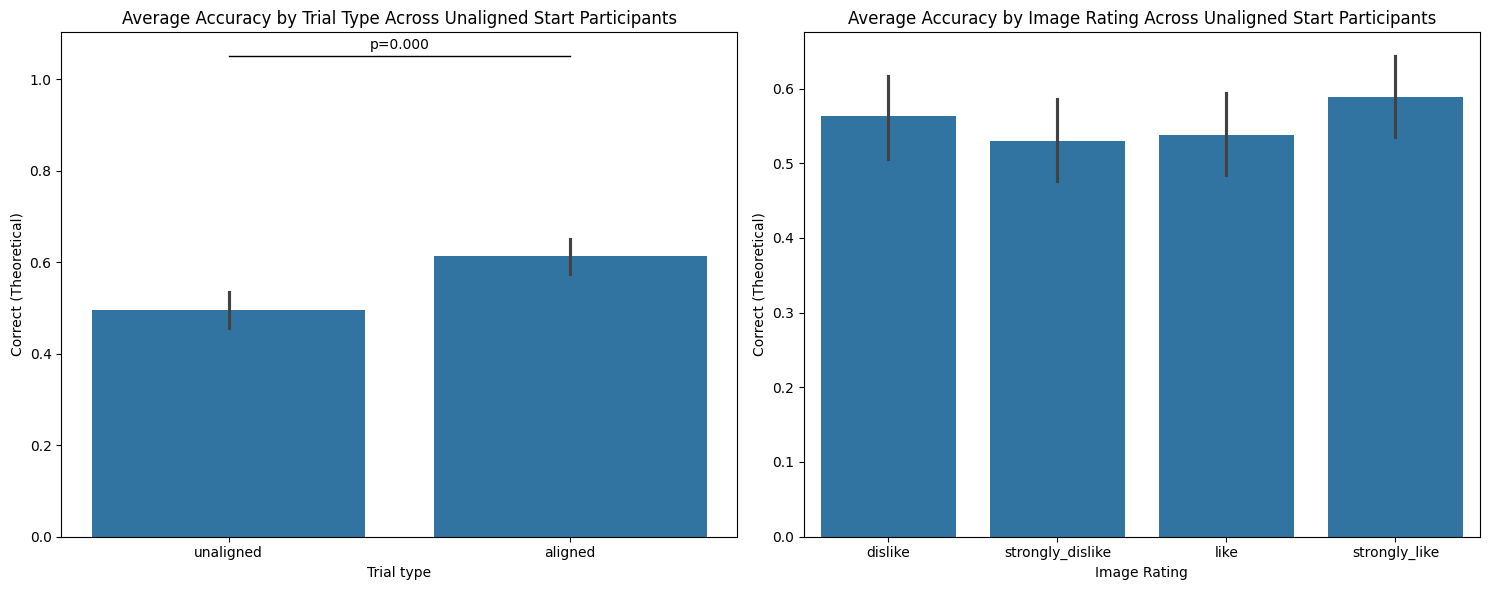

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency


# Initialize lists to store data from each participant
all_data = []

# Iterate over each CSV file in the folder
for file_name in os.listdir(shared_folder_path):
    if file_name.endswith('.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(shared_folder_path, file_name)
        df = pd.read_csv(file_path)

        # Extract participant ID from file name (assuming the file name format is 'participant_id.csv')
        participant_id = file_name.split('.')[0].split('_')[0]

        # Add participant ID to DataFrame
        df['Participant ID'] = participant_id

        # Append the DataFrame to the list
        all_data.append(df)

# Concatenate all DataFrames into a single DataFrame
all_data_df = pd.concat(all_data, ignore_index=True)

# Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
all_data_df['Correct (Binary)'] = all_data_df['Correct (Theoretical)'].astype(int)

# Separate data based on the starting block type
aligned_start_df = all_data_df.groupby('Participant ID').filter(lambda x: x['Trial type'].iloc[0] == 'aligned')
unaligned_start_df = all_data_df.groupby('Participant ID').filter(lambda x: x['Trial type'].iloc[0] == 'unaligned')

# Function to perform analysis and plotting
def analyze_and_plot(data_df, title_suffix):
    # Accuracy per 'Trial type'
    trial_type_accuracy = data_df.groupby('Trial type')['Correct (Theoretical)'].mean()
    ttest_p_value_tt = ttest_ind(
        data_df[data_df['Trial type'] == 'aligned']['Correct (Theoretical)'],
        data_df[data_df['Trial type'] == 'unaligned']['Correct (Theoretical)'],
        nan_policy='omit'
    ).pvalue

    # Accuracy as a function of 'Image Rating'
    contingency_table = pd.crosstab(data_df['Image Rating'], data_df['Correct (Binary)'])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Output results
    print(f"\nAccuracy per 'Trial type' (aligned and unaligned) (average across participants) - {title_suffix}:")
    print(trial_type_accuracy)
    print(f"t-test p-value for 'Trial type' (average across participants) - {title_suffix}: {ttest_p_value_tt}")

    print(f"\nAccuracy as a function of 'Image Rating' (average across participants) - {title_suffix}:")
    print(data_df.groupby('Image Rating')['Correct (Binary)'].mean())
    print(f"Chi-squared p-value for 'Image Rating' (average across participants) - {title_suffix}: {p:.15f}")
    print(f"Data for Chi-squared test (average across participants) - {title_suffix}:")
    print(contingency_table)

    # Visualization
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    # Accuracy by Trial Type
    sns.barplot(x='Trial type', y='Correct (Theoretical)', data=data_df, ax=axs[0])
    axs[0].set_title(f'Average Accuracy by Trial Type Across {title_suffix} Participants')
    if ttest_p_value_tt < 0.05:
        height = max(data_df.groupby('Trial type')['Correct (Theoretical)'].max()) + 0.05
        axs[0].plot([0, 1], [height, height], linewidth=1, color='k')
        axs[0].text(0.5, height + 0.01, f'p={ttest_p_value_tt:.3f}', ha='center', va='bottom')

    # Accuracy by Image Rating
    sns.barplot(x='Image Rating', y='Correct (Theoretical)', data=data_df, ax=axs[1])
    axs[1].set_title(f'Average Accuracy by Image Rating Across {title_suffix} Participants')
    if p < 0.05:
        height = max(data_df.groupby('Image Rating')['Correct (Theoretical)'].max()) + 0.05
        axs[1].plot([0, 1, 2, 3], [height, height, height, height], linewidth=1, color='k')
        axs[1].text(1.5, height + 0.01, f'p={p:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Analyze and plot for aligned-start participants
analyze_and_plot(aligned_start_df, 'Aligned Start')

# Analyze and plot for unaligned-start participants
analyze_and_plot(unaligned_start_df, 'Unaligned Start')


##Bar plots: Accuracy by block and image rating


<IPython.core.display.Javascript object>

<Figure size 1200x800 with 0 Axes>

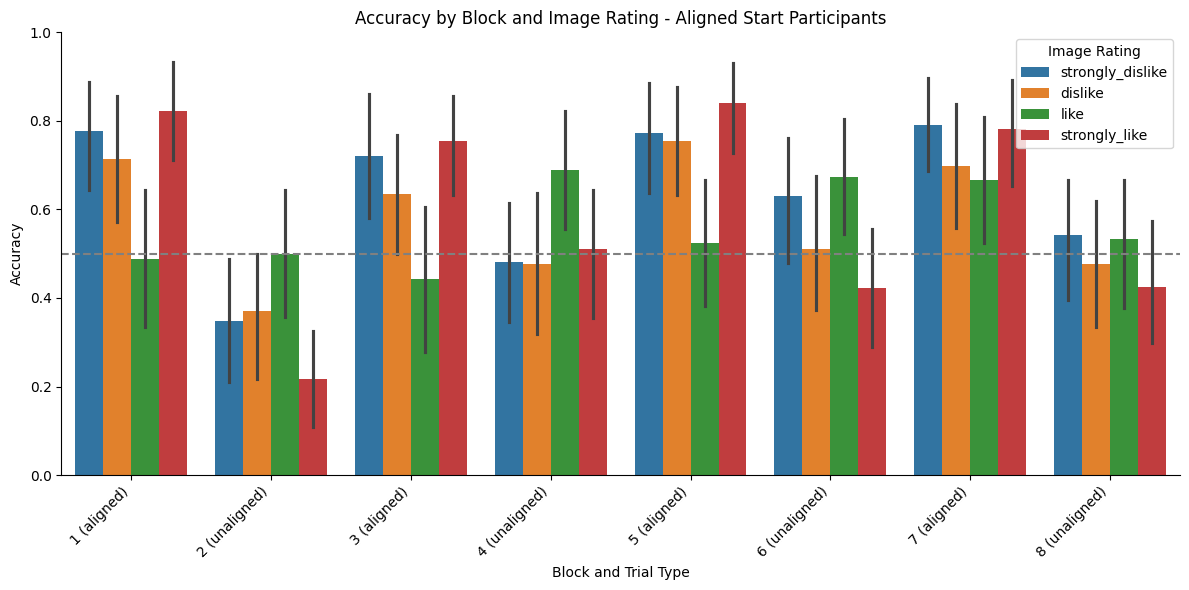

<Figure size 1200x800 with 0 Axes>

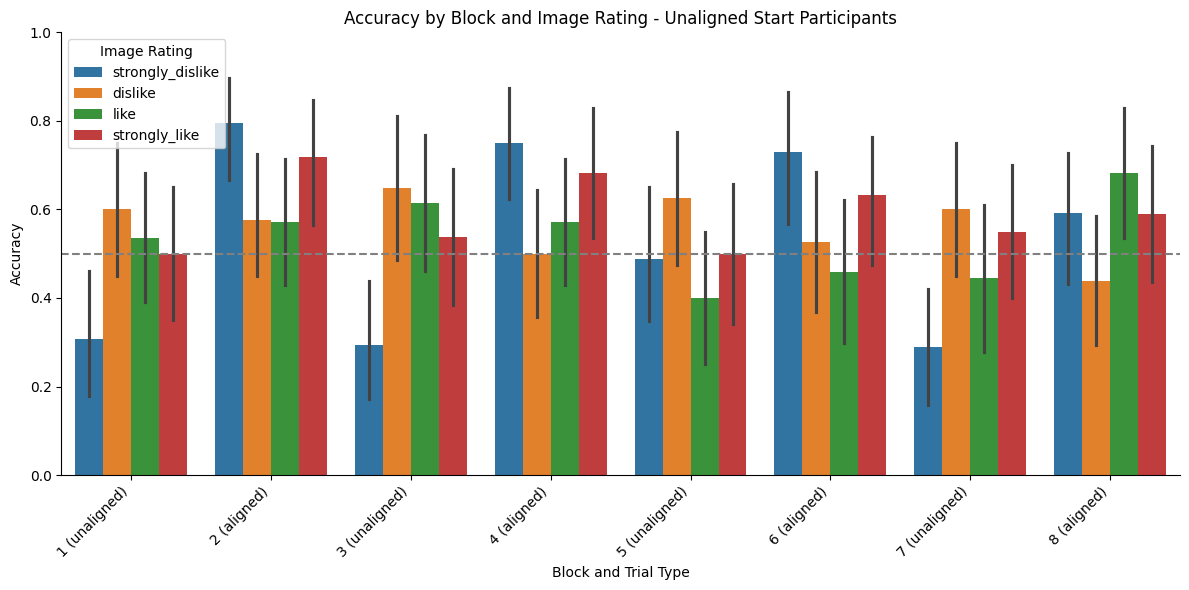

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store data from each participant
all_data = []

# Iterate over each CSV file in the folder
for file_name in os.listdir(shared_folder_path):
    if file_name.endswith('.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(shared_folder_path, file_name)
        df = pd.read_csv(file_path)

        # Extract participant ID from file name (assuming the file name format is 'participant_id.csv')
        participant_id = file_name.split('.')[0].split('_')[0]

        # Add participant ID to DataFrame
        df['Participant ID'] = participant_id

        # Define blocks based on switches in 'Trial type'
        df['Block'] = (df['Trial type'] != df['Trial type'].shift(1)).cumsum()

        # Create a column that combines Block and Trial type
        df['Block_Type'] = df['Block'].astype(str) + ' (' + df['Trial type'] + ')'

        # Convert 'Correct (Theoretical)' to binary (1 for True, 0 for False)
        df['Correct (Binary)'] = df['Correct (Theoretical)'].astype(int)

        # Append the DataFrame to the list
        all_data.append(df)

# Concatenate all DataFrames into a single DataFrame
all_data_df = pd.concat(all_data, ignore_index=True)

# Separate data based on the starting block type
aligned_start_df = all_data_df.groupby('Participant ID').filter(lambda x: x['Trial type'].iloc[0] == 'aligned')
unaligned_start_df = all_data_df.groupby('Participant ID').filter(lambda x: x['Trial type'].iloc[0] == 'unaligned')

# Define a function to plot accuracy by block and image rating for each group
def plot_accuracy_by_block_image_rating(data_df, title_suffix):
    # Ensure 'Image Rating' is in the specified order
    rating_order = ['strongly_dislike', 'dislike', 'like', 'strongly_like']
    data_df['Image Rating'] = pd.Categorical(data_df['Image Rating'], categories=rating_order, ordered=True)

    # Plot Accuracy by Block and Image Rating
    plt.figure(figsize=(12, 8))
    sns.catplot(
        data=data_df,
        x='Block_Type',
        y='Correct (Binary)',
        hue='Image Rating',
        hue_order=rating_order,  # Specify the order of the hue categories
        kind='bar',
        height=6,
        aspect=2,
        legend_out=False
    )

    plt.title(f'Accuracy by Block and Image Rating - {title_suffix} Participants')
    plt.axhline(y=0.5, color='gray', linestyle='--', label='Chance Level')  # Add a dotted line at y=0.5
    plt.ylim(0, 1)  # Set y-axis limits to 0-1
    plt.xlabel('Block and Trial Type')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

# Plot for aligned-start participants
plot_accuracy_by_block_image_rating(aligned_start_df, 'Aligned Start')

# Plot for unaligned-start participants
plot_accuracy_by_block_image_rating(unaligned_start_df, 'Unaligned Start')
